# Домашнее задание №1 по вычислительной математике
*Выполнил: Белиловский Иван, Б06-202*


## Задача №1

- Функция: $f(x) = \cos(x)$
- Разложить в ряд Маклорена
- Рассмотреть в точках $x = \{0,5; 1,5; 15; 30\}$

Ряд Маклорена для $\cos(x) $ имеет вид:

\begin{equation}
\cos(x) = \sum_{n=0}^{\infty} \frac{(-1)^n x^{2n}}{(2n)!}
\end{equation}

Согласно теории, рассмотренной в курсе Математического Анализа данный ряд имеет бесконечный радиус сходимости, это означает что всюду в $\mathbb{R}$ его сумма равна $\cos(x)$. При реальных вычислениях, однако, мы не можем произвести бесконечное число арифметических операций, а значит у нас возникнет погрешность, равная остатку ряда. 

Рассмотрим первые $N$ членов ряда на отрезке $[a; b]$. Макисмальная погрешность метода вычисления будет равна:
\begin{equation}
\varepsilon = \max_{\xi \in [a; b]}\left|\frac{1}{(2N+2)!}\xi^{2N+2}\right|
\end{equation}

При этом в практической реализации данного метода у нас также присутствует машинная погрешность вычислений. По определению это величина является максимальным числом, при котором в рамках нашей модели вычислений верно равенство:
$$
1+\varepsilon_M=1
$$
В нашем случае (в данном задании используется библиотека `numpy` языка `python`) это число равно:

In [1]:
import numpy as np
epsm = np.finfo(np.float64).eps
epsm

2.220446049250313e-16

Данное число является точной нижней границей относительной погрешности, которой в принципе можно достигнуть, вычисляя на компьютере сумму ряда Маклорена

Перейдём к реализации. Импортируем все необходимы для дальнейшей работы библиотеки в `python`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

Напишем программу, которая будет суммировать ряд Маклорена до тех пор, пока N-й член будет отличен от нуля: $|\frac{x^{2N}}{(2N)!}|>0$.
Данная функция на вход принимает точку $x$ и минимальное значение члена ряда, на выходе мы получаем 2 числа: Частичную сумму ряда в точке $x$ и число использованных членов ряда

In [3]:
def maclaurin_cos(x: np.float64, tolerance=0):
    term = np.float64(1)  # Первый член ряда
    sum_cos = term
    n = 1

    while abs(term) > tolerance:
        term *= -x**2 / ((2*n - 1) * (2*n))  # Переход к следующему члену ряда
        sum_cos += term
        n += 1

    return sum_cos, n - 1  # Возвращаем сумму и количество членов


Построим график суммы для данной функции на отрезке $x\in [0; 30]$ и сравним нашу реализацию со встроеннной в библиотеку `numpy`:

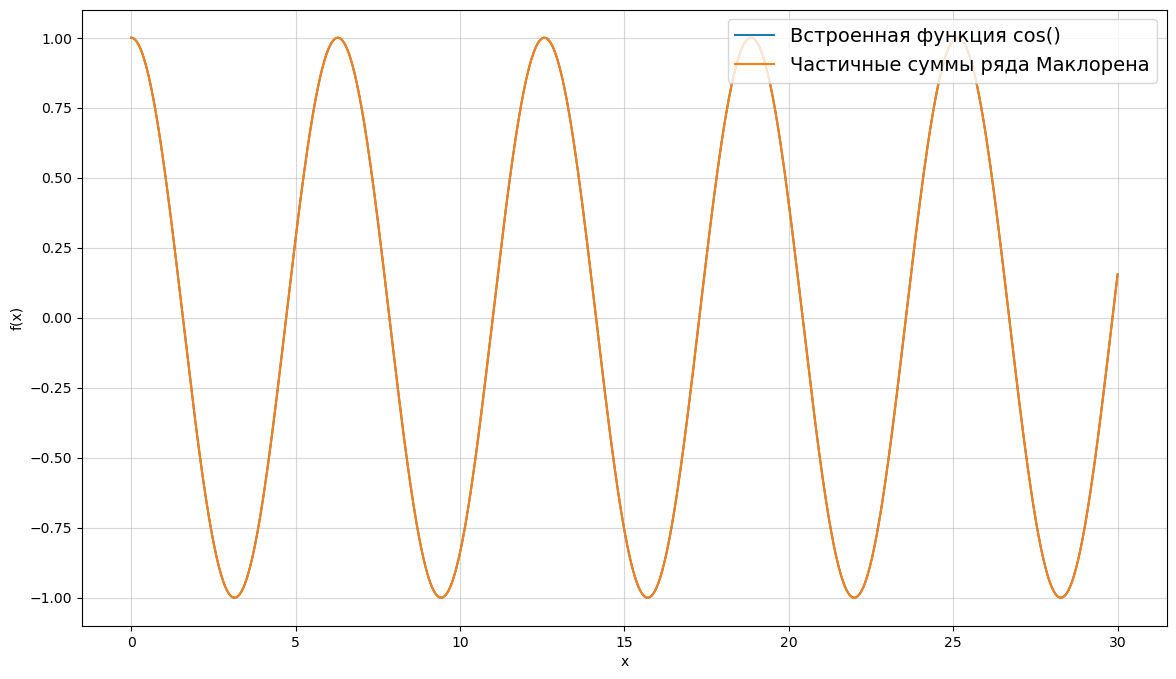

In [4]:
maclaurin_cos_vect=np.vectorize(maclaurin_cos)

plt.figure(figsize=(14,8))
grid=np.linspace(0, 30, 800)
plt.plot(grid, np.cos(grid), label='Встроенная функция cos()')
plt.plot(grid, maclaurin_cos_vect(grid)[0], label='Частичные суммы ряда Маклорена')
plt.grid(alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper right', fontsize=14)
plt.show()

На приведённом выше графики разница между суммами ряда Маклорена и встроенной функцией косинуса визуально не определяется, что говорит о хорошей точности приближения. Для того что бы рассмотреть этот вопрос детальнее рассмотрим абсолютные погрешности вычисления и построим зависимость погрешности от точки $x$: $$ \delta(x) = \left|\cos(x)-\sum_{n=0}^{N} \frac{(-1)^n x^{2n}}{(2n)!}\right| $$

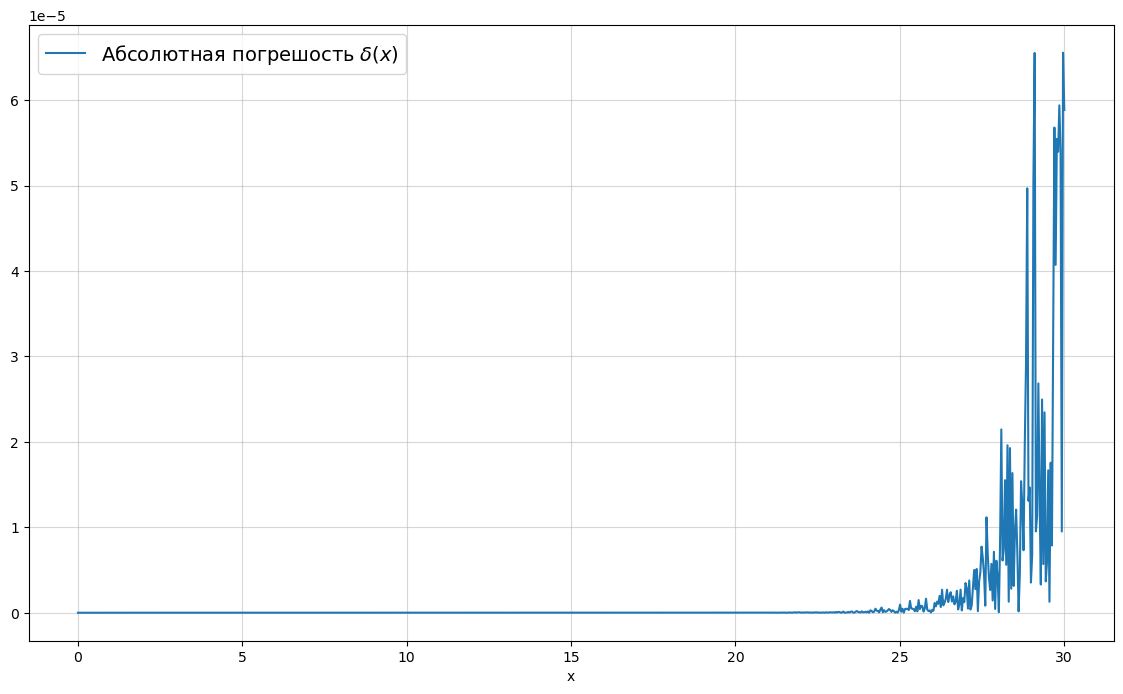

In [5]:
plt.figure(figsize=(14,8))
plt.plot(grid, np.abs(np.cos(grid)- maclaurin_cos_vect(grid)[0]), label=r'Абсолютная погрешость $\delta(x)$')
plt.grid(alpha=0.5)
plt.xlabel('x')
#plt.ylabel('f(x)')
plt.legend(fontsize=14)
plt.show()

Полученная пилоообразная функция быстро осциллирует и амплитуда осцилляций растёт с ростом $x$. 

Посмотрим на зависимость числа <<Ненулевых>> членов ряда от $x$:

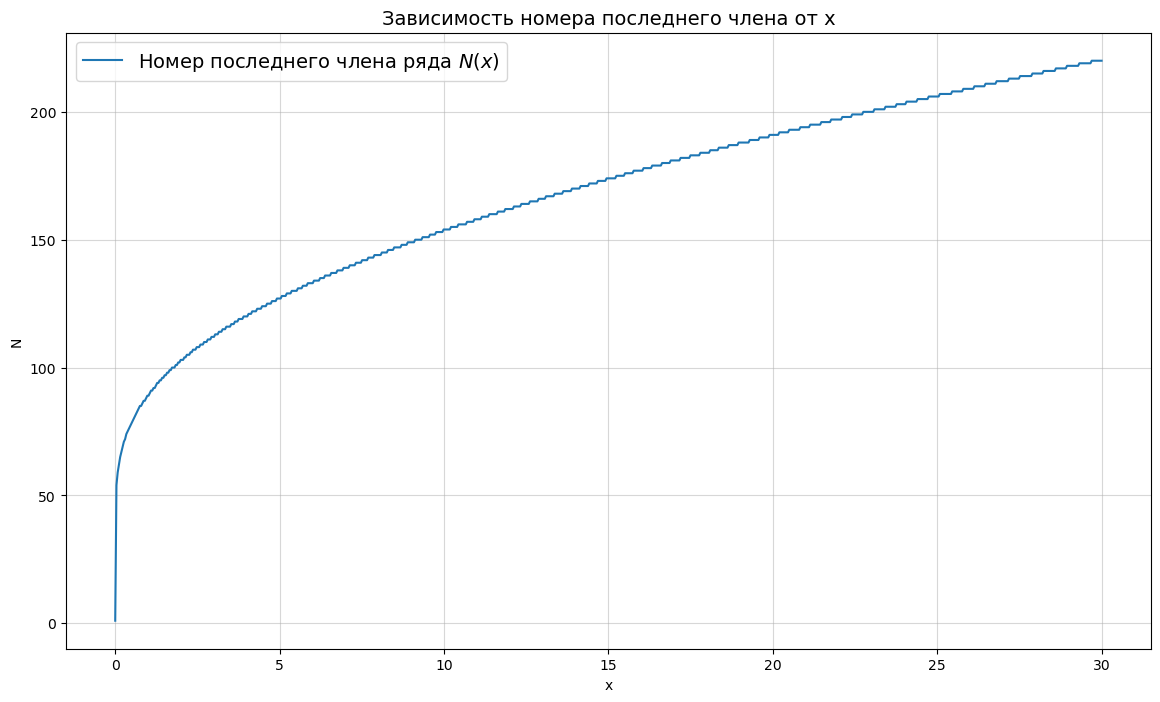

In [6]:
plt.figure(figsize=(14,8))
plt.plot(grid, maclaurin_cos_vect(grid)[1], label=r'Номер последнего члена ряда $N(x)$')
plt.grid(alpha=0.5)
plt.xlabel('x')
plt.ylabel('N')
plt.title('Зависимость номера последнего члена от x', fontsize=14)
plt.legend(fontsize=14)
plt.show()

Построим тот же график но в логарифмическом масштабе по оси Y:

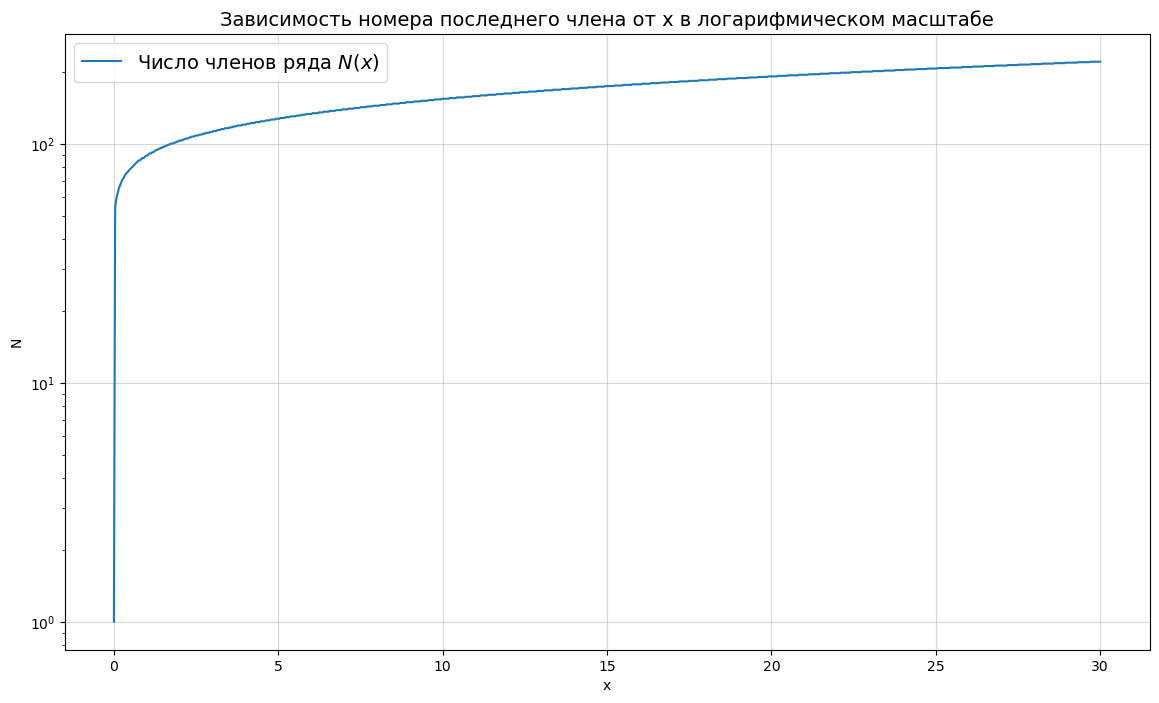

In [7]:
plt.figure(figsize=(14,8))
plt.plot(grid, maclaurin_cos_vect(grid)[1], label=r'Число членов ряда $N(x)$')
plt.grid(alpha=0.5)
plt.xlabel('x')
plt.ylabel('N')
plt.yscale('log')
plt.title('Зависимость номера последнего члена от x в логарифмическом масштабе', fontsize=14)
plt.legend(fontsize=14)
plt.show()

Для наших точек: $x = \{0,5; 1,5; 15; 30\}$ Опредлелим номер последнего члена ряда и определим значение $\delta(x)$ в этих точках:

In [8]:
#Значения x для анализа
x_values = [0.5, 1.5, 15, 30]

for x in x_values:
    approx_cos, terms_used = maclaurin_cos(x)
    exact_cos = math.cos(x)
    error = abs(exact_cos - approx_cos)
    
    print(f"x: {x:.1f}"
          f"   Err: {error:.4e}, N: {terms_used}")

x: 0.5   Err: 0.0000e+00, N: 79
x: 1.5   Err: 0.0000e+00, N: 97
x: 15.0   Err: 9.4558e-12, N: 174
x: 30.0   Err: 5.8843e-05, N: 220


Таким образом для достижения минимальной погрешности необходимо использовать от 80 до 221 членов ряда Маклорена при вычислениях в указанных в условии точках.

Видно, что при малых значениях $x$ ошибка в вычислении косинуса будет определяться ошибкой округления. Оценим ошибку, связанную с округлением в точках $\{0,5; 1,5; 15; 30\}$
Ошибка округления возрастает с ростом $x$, что связано с различным характером поведения членов ряда при $x<1$ и при $x>1$. При $x<1$ значения модулей членов ряда последовательно убывают с ростом $n$. А при $x>1$ Значения сначала растут, и только начиная с некотрого номера $N_{max}$ -- убывают. Найдём номер максимального по модулю члена ряда:

In [11]:
def Find_max_term(x: np.float64, tolerance=0):
    term = np.float64(1) 
    sum_cos = term
    n = 1
    max_term = term
    n_max = 1

    while abs(term) > tolerance:
        term *= -x**2 / ((2*n - 1) * (2*n))  
        sum_cos += term
        n += 1
        if term > max_term:
            max_term = term
            n_max = n

    return max_term, n_max - 1  

for x in x_values:
    max, Nmax = Find_max_term(x)
    print(f"x: {x:.1f}, Номер максимального члена: {Nmax}, Значение максимального члена: {max:.5e}")


x: 0.5, Номер максимального члена: 0, Значение максимального члена: 1.00000e+00
x: 1.5, Номер максимального члена: 0, Значение максимального члена: 1.00000e+00
x: 15.0, Номер максимального члена: 8, Значение максимального члена: 3.13936e+05
x: 30.0, Номер максимального члена: 14, Значение максимального члена: 7.50333e+11


При увеличении $x$ номер максимального члена и его значение растёт, что было ожидаемо. Таким образом для обеспеения максимальной погрешноти не превосходящей $\varepsilon$ необходима вычислить данный член $a_{N_{max}}$ c относительной точность не более $\frac{\varepsilon}{a_{N_{max}}}$. Требуемая относительная точность, как видно растёт с ростом максимального члена, то есть с ростом $x$, что оганичивается значением $\varepsilon_{M}$, то есть длиной мантиссы и необходимо её увеличивать.


## Вывод:

Ряды Маклорена можно использовать только при $|x| \lesssim 1$, в этом случае члены ряда монотонно убывают по модулю с ростом их номера, в противном случае из-за погрешности связанной с округлением при суммировании теряются цифры, т.к. сумма становится очень большой по модулю, что приводит к накоплению ошибки 

Стоит также отметить, что ни в одной библитоеке не используется реализация косинуса с помощью вычисления частичной суммы ряда Маклорена

### Дополнения:

В кажой из точек построим дополнительно зависимость ошибки от номера последнего члена в частичной сумме:

In [3]:
def maclaurin_cos_n(x: np.float64, N):
    term = np.float64(1)  # Первый член ряда
    sum_cos = term
    n = 1

    while N >= n:
        term *= -x**2 / ((2*n - 1) * (2*n))  # Переход к следующему члену ряда
        sum_cos += term
        n += 1

    return np.float64(sum_cos) # Cумма первых N членов

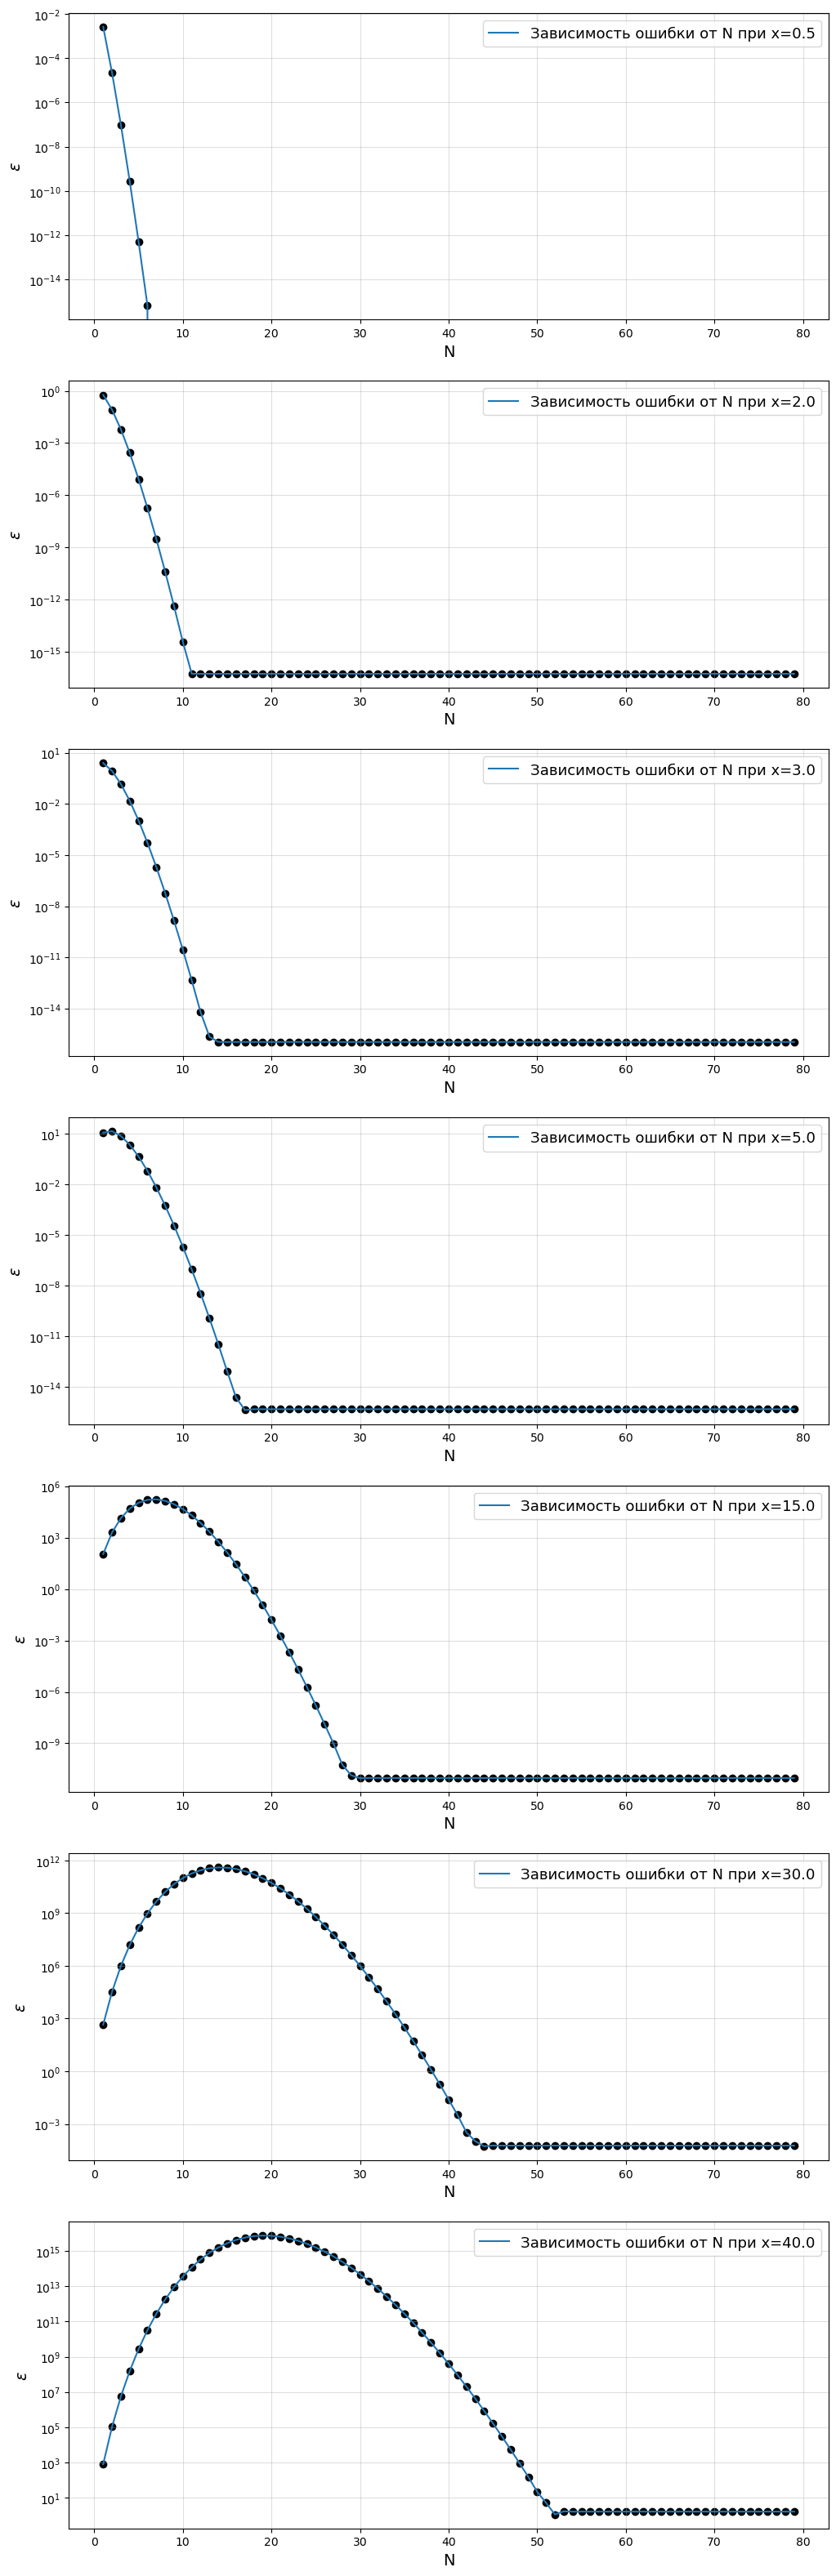

In [4]:
xvals = np.array([0.5, 2,3, 5, 15, 30, 40])
maclaurin_cos_n_vect = np.vectorize(maclaurin_cos_n)
Ngrid = np.arange(1,80)

fig, axs = plt.subplots(7, 1)
fig.set_figheight(40)
fig.set_figwidth(12)

for i, x in enumerate(xvals):
    error = np.abs(maclaurin_cos_n_vect(x, Ngrid) - np.cos(x), dtype=np.float64)
    axs[i].scatter(Ngrid, error, color='black')
    axs[i].plot(Ngrid, error, label=r'Зависимость ошибки от N при x='+str(x))
    axs[i].grid(alpha=0.4)
    axs[i].legend(fontsize=13)
    axs[i].set_xlabel('N', fontsize=14)
    axs[i].set_yscale('log')
    axs[i].set_ylabel(r'$\varepsilon$', fontsize=14)


**Дополнительный вывод**: 

Таким образом из-за ошибок округления при $x\geq 2$ ошибка вызодит на контсанту меньшую чем машинная точность и данная ошибка не улучшается с ростом числа членов. Начиная с $x=5$ ошибка ведёт себя немонотонно и сначала возрастает, а затем убывает и выходит на константу. Во всех случаях ошибка становится постоянной и неулучшается начиная с неоторого $N_{er}$, при этом в точке $x=40$ минимально возможная ошибка становится порядка вычисляемой функции, т.к $\forall x \in \mathbb R \Rightarrow \cos(x) \in [-1; 1]$ что делает данный метод вычисления недостоверным

Попробуем оценить значение для этого "Плато" ошибки. Заметим, что уровень плато зависит от точки $x$ а также машинного эпсилон $\varepsilon_M$ и никак не зависит от номера последнего члена частичной суммы ряда Маклорена, использованного при приближённом вычислениии. Построим график заисимости уровня константной погрешности (назовём её $err$) от $x$:

Text(0, 0.5, '$err/\\varepsilon_M$')

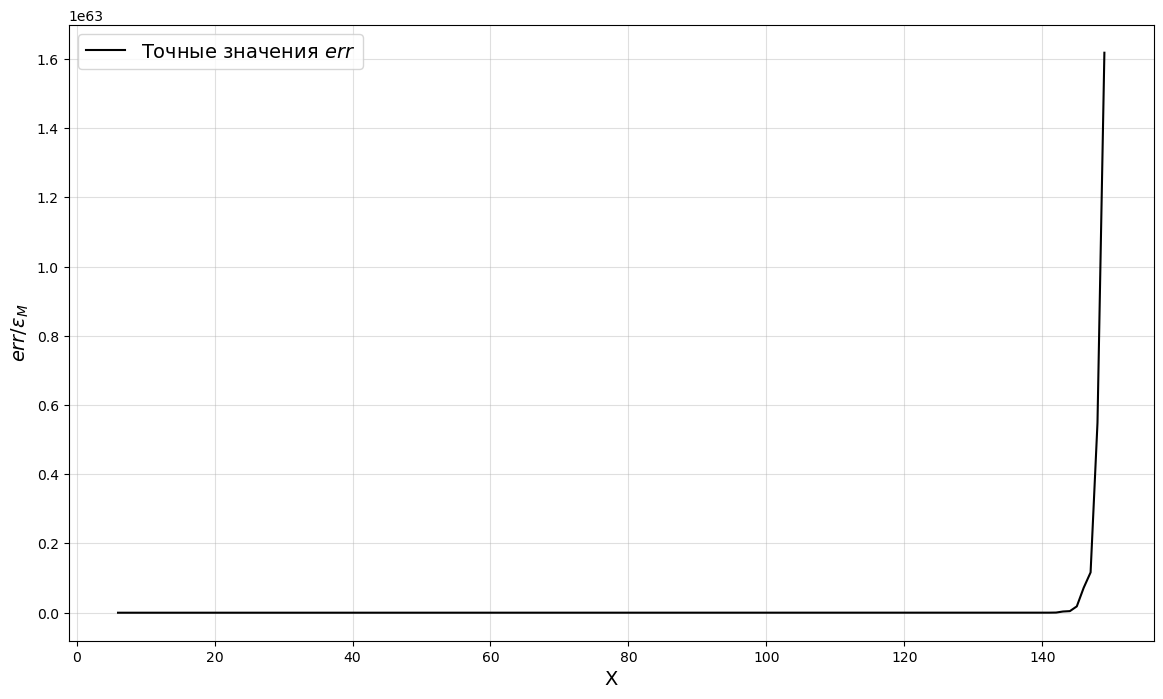

In [7]:
Xs = np.arange(6, 150)
errors = []
for x in Xs:
    errors.append(np.abs(maclaurin_cos_n(x=x, N=180) - np.cos(x)))

plt.figure(figsize=(14,8))
plt.plot(Xs, np.array((errors)/(epsm), dtype=np.float64), color='black', label=r'Точные значения $err$')
plt.grid(alpha=0.4)
plt.legend(fontsize=14)
plt.xlabel('X', fontsize=14)
plt.ylabel(r'$err/\varepsilon_M$', fontsize=14)

В таком виде график не является информативным. Перестроим его в логорифмическом масштабе по оси $err$:

Text(0, 0.5, '$err/\\varepsilon_M$')

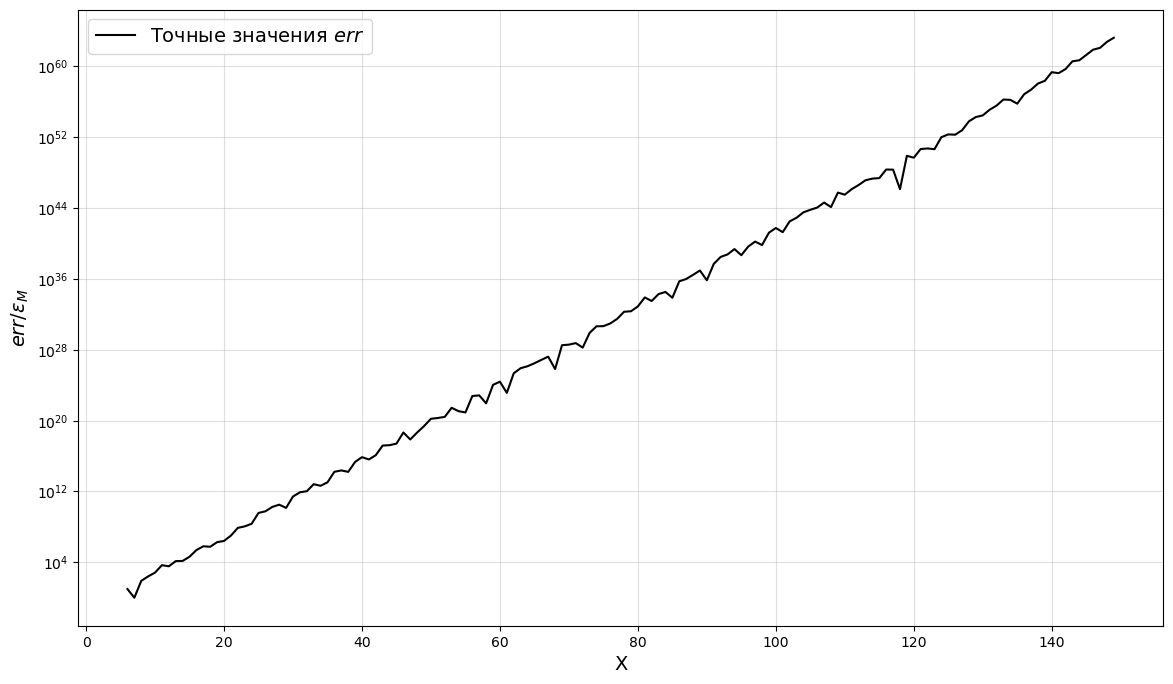

In [8]:
plt.figure(figsize=(14,8))
plt.plot(Xs, np.array((errors)/(epsm), dtype=np.float64), color='black', label=r'Точные значения $err$')
plt.grid(alpha=0.4)
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('X', fontsize=14)
plt.ylabel(r'$err/\varepsilon_M$', fontsize=14)

Таким образом характер зависимости значения $err$ от $X$ является экпоненциальным, с помощью МНК оценим параметры данной прямой для получения приближённой формулы. Для этого импортирум библиотеку.

In [10]:
from scipy.optimize import curve_fit

array([ 0.43238951, -1.82833118])

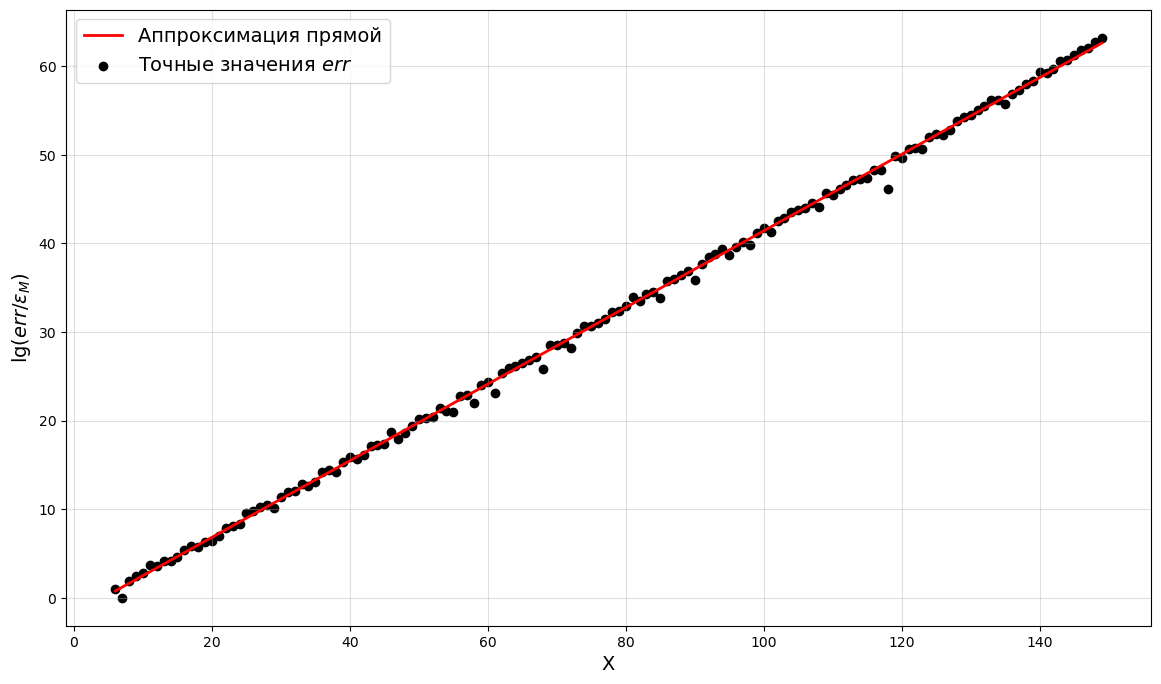

In [11]:
def linear(x,a,b):
    return a*x + b
popt, pcov = curve_fit(linear, Xs, np.log10(np.array((errors)/(epsm), dtype=np.float64)))

plt.figure(figsize=(14,8))
plt.plot(Xs, linear(Xs, *popt), label='Аппроксимация прямой', color='red', lw=2)
plt.scatter(Xs, np.log10(np.array((errors)/(epsm), dtype=np.float64)), color='black', label=r'Точные значения $err$')
plt.grid(alpha=0.4)
#plt.yscale('log')
#plt.plot(Xs, 0.432*Xs)
plt.legend(fontsize=14)
plt.xlabel('X', fontsize=14)
plt.ylabel(r'$\lg(err/\varepsilon_M)$', fontsize=14)
popt

**Итого:** Я получил формулу для описания асимпотоического поведения погрешности:
$$
err = \varepsilon_M \cdot 10^{0.4324 x - 1.8283}
$$

Однако если присмотреться внимательнее к данному графику, то можно заметить квазипериодические отклонения реальной ошибки от данной формулы. Мною было экспериментально выяснено, что полученная формула для точного описания ошибки должна быть ещё умножена на некоторую поправочную функцию $M(x)$, завсящую от расположения единиц при двоичной записи числа в мантиссе. В пользу этого говорит тот факт, что при малых значениях $x$ -- ошибки относятся к машинному эпсилон $\varepsilon_M$ как целые или полуцелые числа:

In [20]:
for x in np.arange(1, 8, 0.5):
    err = np.abs(maclaurin_cos_n(x=x, N=180) - np.cos(x))
    print('Число:', x, 'Отношение err к машинному эпсилон:', err/epsm)
    print('-'*60)

Число: 1.0 Отношение err к машинному эпсилон: 0.5
------------------------------------------------------------
Число: 1.5 Отношение err к машинному эпсилон: 0.0
------------------------------------------------------------
Число: 2.0 Отношение err к машинному эпсилон: 0.25
------------------------------------------------------------
Число: 2.5 Отношение err к машинному эпсилон: 1.0
------------------------------------------------------------
Число: 3.0 Отношение err к машинному эпсилон: 0.5
------------------------------------------------------------
Число: 3.5 Отношение err к машинному эпсилон: 2.5
------------------------------------------------------------
Число: 4.0 Отношение err к машинному эпсилон: 0.0
------------------------------------------------------------
Число: 4.5 Отношение err к машинному эпсилон: 4.0
------------------------------------------------------------
Число: 5.0 Отношение err к машинному эпсилон: 2.25
------------------------------------------------------------

Точный вид данной функции мне вывести не удалось, однако полученная мною выше формула неплохо описывает огибающую для ошибки $err$ так что приближённую формулу можно считать релевантной. В качестве подтверждения посчитаем коэффициент детерминации $r^2$ для приближённой формулы на отрезке $x \in [5; 150]$:

In [22]:
from sklearn.metrics import r2_score
r2_score(np.log10(np.array((errors)/(epsm), dtype=np.float64)), linear(Xs, *popt))

0.9991671580065349

Данное число очень близко к $1$, что говорит о высоком качестве полученой формулы

# Задача 2

- Функции: $f_1(x) = \ch(x), ~~ x\in [-2; 2]$
 ;  $f_2(x) = \text{sign}(x), ~~ x\in [-1; 1]$
- Построить алгебраическую интерполяцию на равномерной сетке с числом узлов: 9, 15, 25, 79
- Построить интерполяцию на нулях полинома Чебышёва
- Рассмотреть интерполяцию B-сплайнами 2 порядка с дефектом 1 

## Теория

Для построения интерполяции на отрезке нужно выбрать систему базисных функций. Рассмотрим сетку $\omega_h = \{ x|: a \leq x_0<x_1<....x_N \leq b \}$, всего $N+1$ точек. При интерполяции полиномами Лагранжа, эти базисные функции имеют вид:
$\varphi_k(t) = t^k,\ k \in \overline{0, N}$. Используя это получим СЛАУ:
\begin{equation}
\begin{cases}
u_0 + u_1t_0 + \dots + u_{N}t_0^{N} = f_0 \\
\dots \\
u_0 + u_1t_{N} + \dots + u_{N}t_{N}^{N} = f_{N}
\end{cases}
\end{equation}
Данное уравнение решается однозначно, поскольку определитель матрицы данной линейной системы является определителем Вандермонда. Так как все точки равны по условию задания нашей сетки, то определитель отличен от нуля. Решение конкртено этой системы даже можно найти аналитически:
$$
\mathcal{P}_n(t) = \sum\limits_{k=0}^{N}f_k\ell_k^{N}(t),\ \text{где}\ \ell_k^{N}(t) = \prod\limits_{i=0,\ i\neq k}^{N}\frac{t-t_i}{t_j-t_i}
$$

Теперь оценим априорную погрешность. По теореме об остаточном члене интерпояции, погрешность имеет значение: $\Delta = \max_{\xi \in [a; b]} {\left(\frac{f^{(N+1)}(\xi)}{(N+1)!}\prod\limits_{i=0}^{N}(t-t_i)\right)}$

Для оценки погрешности на равномерной сетке $\exists$ теорема об оценке максимальной погрешности: $\Delta_{\text{max}} = \frac{|b-a|^{n+1}}{n^{n+1}(n+1)}\max\limits_{[a;b]}{f^{(n)}(\xi)}$

Для $\text{sign}(x)$ по данной формуле получается $\infty$, поскольку данная функция не является непрерывной. Оценим погрешность для $\ch(x)$:

In [32]:

def sigma_ch(n: int):
    return (4/n)**(n+1)/(n+1)*np.cosh(2)

for d in [9, 15, 25, 79]:
    print('Кол-во узлов:', d)
    print('Погрешность:', sigma_ch(d))
    print('-'*20)

Кол-во узлов: 9
Погрешность: 0.00011314000681666201
--------------------
Кол-во узлов: 15
Погрешность: 1.5375212094097354e-10
--------------------
Кол-во узлов: 25
Погрешность: 2.934861308294293e-22
--------------------
Кол-во узлов: 79
Погрешность: 1.0641023387057685e-105
--------------------


Таким образом с ростом узлов погрешность падает с $~10^{-4}$ до $~10^{-105}$

Теперь посмотрим на обусловленность задачи интерполяции. Допустим мы получиили интерполяционный многочлен:
$$
\mathcal P_n(x, f) = \sum\limits_{k=0}^N c_k\varphi_k(x) = \sum\limits_{k=0}^N f_k \ell_k(x)
$$

$l_k$ - фундаментальные многочлены. Их C-норма равна единице. Придадим функции $f$ возмущение $\delta f$.

В силу линейности многочлена по возмущению, получим:
$$
\mathcal P_n(x, f+\delta f) = \mathcal P_n(x, f) + \mathcal P_n(x,\delta f) 
$$

Рассмотрим функцию: $L_n(x) = \sum\limits_{k=0}^n |l_k(x)|$. Ее называют функцией Лебега. Макисмум функции Лебега на отрезке интерполяции называется константой Лебега, и является нормой оператора интерполяции в соответсвующем пространстве линейных операторов

Для интерполяции многочленами Лагранжа с использованием равномерной сетки, получаем:
$$
\frac{2^{n-3}}{(n-1.5)\sqrt{n-1}} < L_n < 2^{n-1},~~~n\ge 4
$$

Если узлами интерполяции являются корни полинома Чебышёва, то:
$$
L_n =\frac{2}{\pi}\ln n +1 - \theta_n, ~~0\le \theta_n \le \frac{1}{4}
$$

Таким образом чувствительность интерполяции растет с увеличением количества узлов в сетке как в случае равномерной, так и для нулей полиномов Чебышёва. То есть погрешность может и расти.

Попробуем оценить погрешность интерполяции $\text{sign(x)}$: для этого можно приблизить её какой-нибудь непрерывной функцией с параметром $\alpha$, например:
$$
f_{\alpha}(x) = \th(\alpha x) = \frac{e^{\alpha x} - e^{-\alpha x}}{e^{\alpha x}+e^{-\alpha x}}
$$
Легко заметить, что при $\lim\limits_{\alpha\to +\infty} f_{\alpha} (x) = \text{sign}(x)$, при этом наша функция является бесконечно дифференцируемой на отрезке $[-1; 1]$.
Рассмотрим $\Delta_{\alpha} = \max\limits_{x\in [-1, 1]}|\text{sign}(x) - f_a(x)|$. При это видно, что $\Delta_{\alpha} =1$, т.к. максимальное значение достигается в окрестности нуля, например при $\varepsilon \to +0 ~~~ \exists x_0: f_{\alpha}(x_0) = \varepsilon; ~~~ \text{sign}(x_0)=1$

При этом данную функцию мы можем интерполировать с погрешностью $\Delta_{\text{max}} = \frac{|b-a|^{n+1}}{n^{n+1}(n+1)}\max\limits_{[-1;1]}{f^{(n)}(\xi)}$, которая будет мала по сравнению с $\Delta_{\alpha}$ для $\th(x)$. Таким образом, итоговая погрешность интерполяции для sign(x) будет примерно: $\Delta_{sum}\approx 1$

## Практическая реализация

### Равномерная сетка

**ch(x):**

Интерполяция на отрезке [-2; 2], для начала создадим равномерную сетку и напишем функцию для создания интерполяционного полинома в форме Лагранжа:


In [3]:
def basis(x, grid, k): #Cоздание базисных полиномов
    ans = 1
    for i, h in enumerate(grid):
        if i != k:
            ans *= (x - h) / (grid[k] - h)
    return ans

def poly_lagrange(x, func, grid): # Создание интерполяционного полинома
    ans = 0 
    for i, g in enumerate(grid):
        ans += (func(g)) * basis(x, grid, i) 
    return ans

nums = [9, 15, 25, 79]
xgrid = np.linspace(-2, 2, 4000)

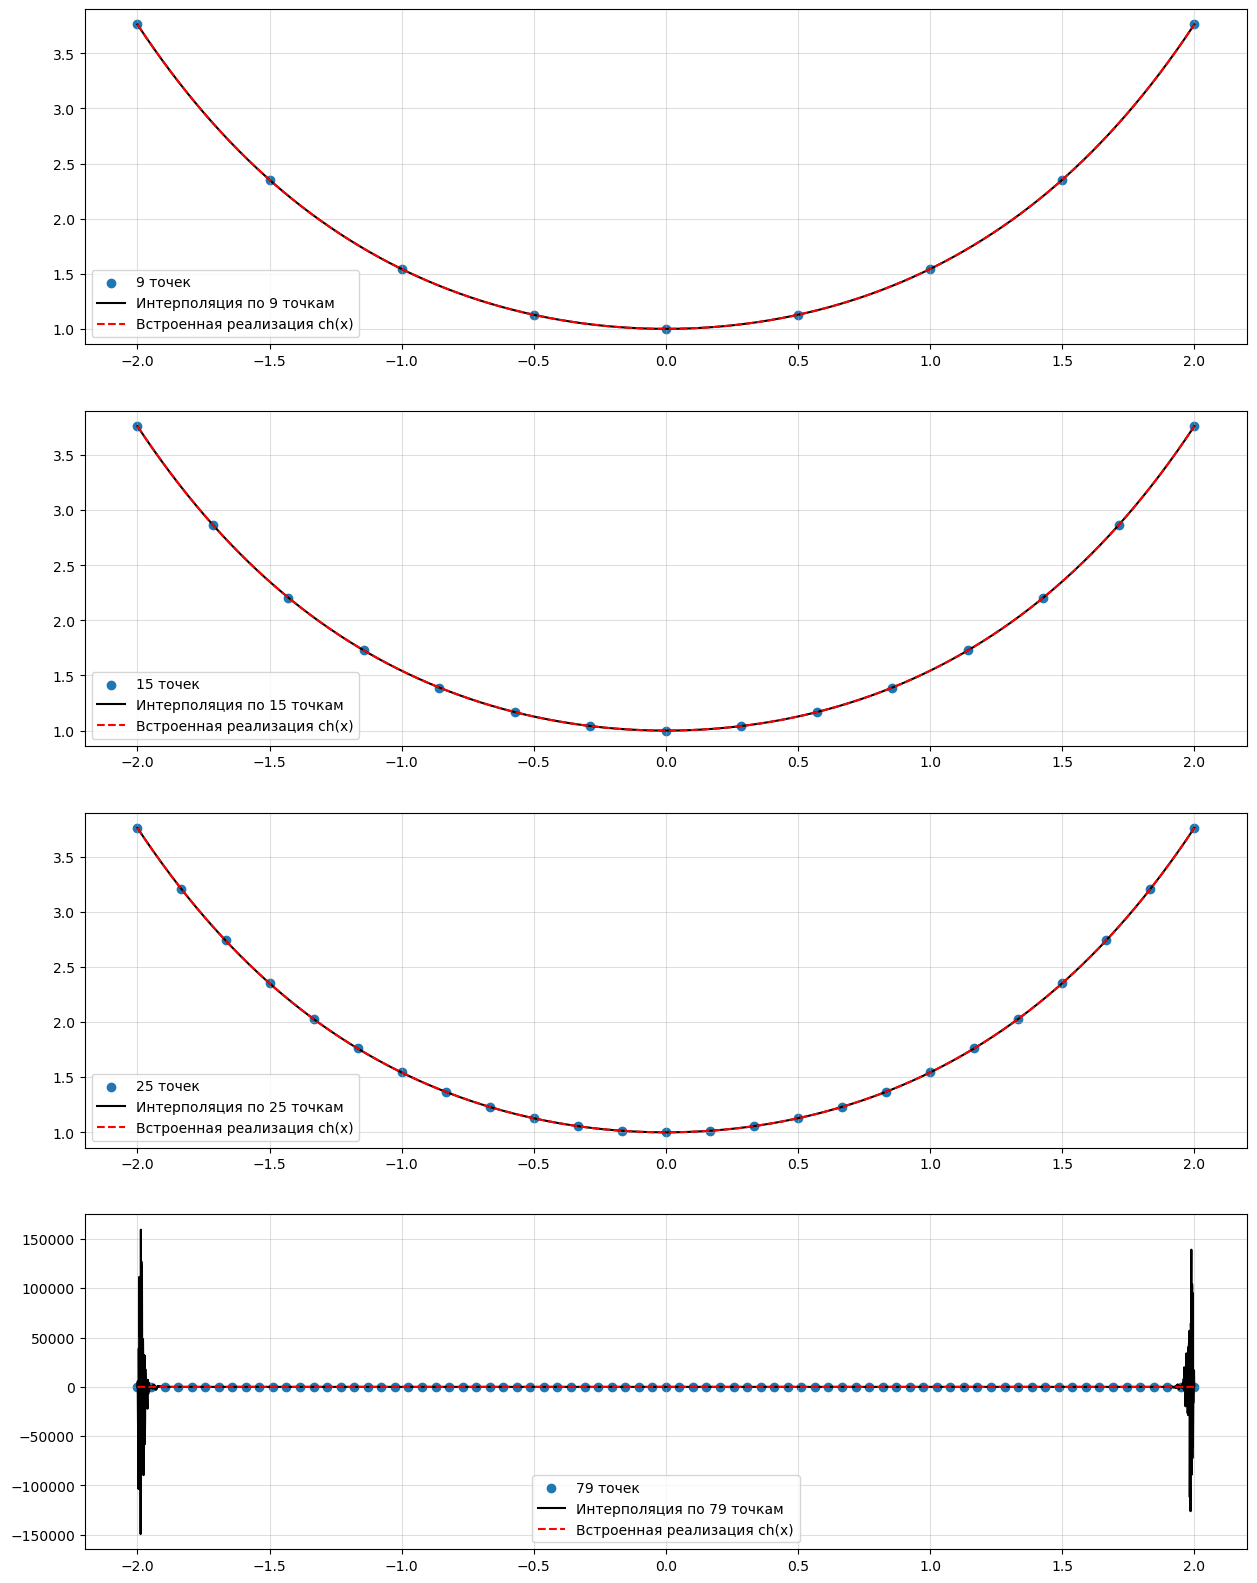

In [4]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.linspace(-2, 2, num, dtype=np.float64)
    interpol = poly_lagrange(xgrid, np.cosh, gr)
    axs[i].scatter(gr, np.cosh(gr), label=str(num)+' точек')
    axs[i].plot(xgrid, interpol, label = f'Интерполяция по {num} точкам', color='black')
    axs[i].plot(xgrid, np.cosh(xgrid), label=r"Встроенная реализация ch(x)", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

**Погрешности:** 

Теперь посмотрим на погрешности интерполяции на равномерной стеке

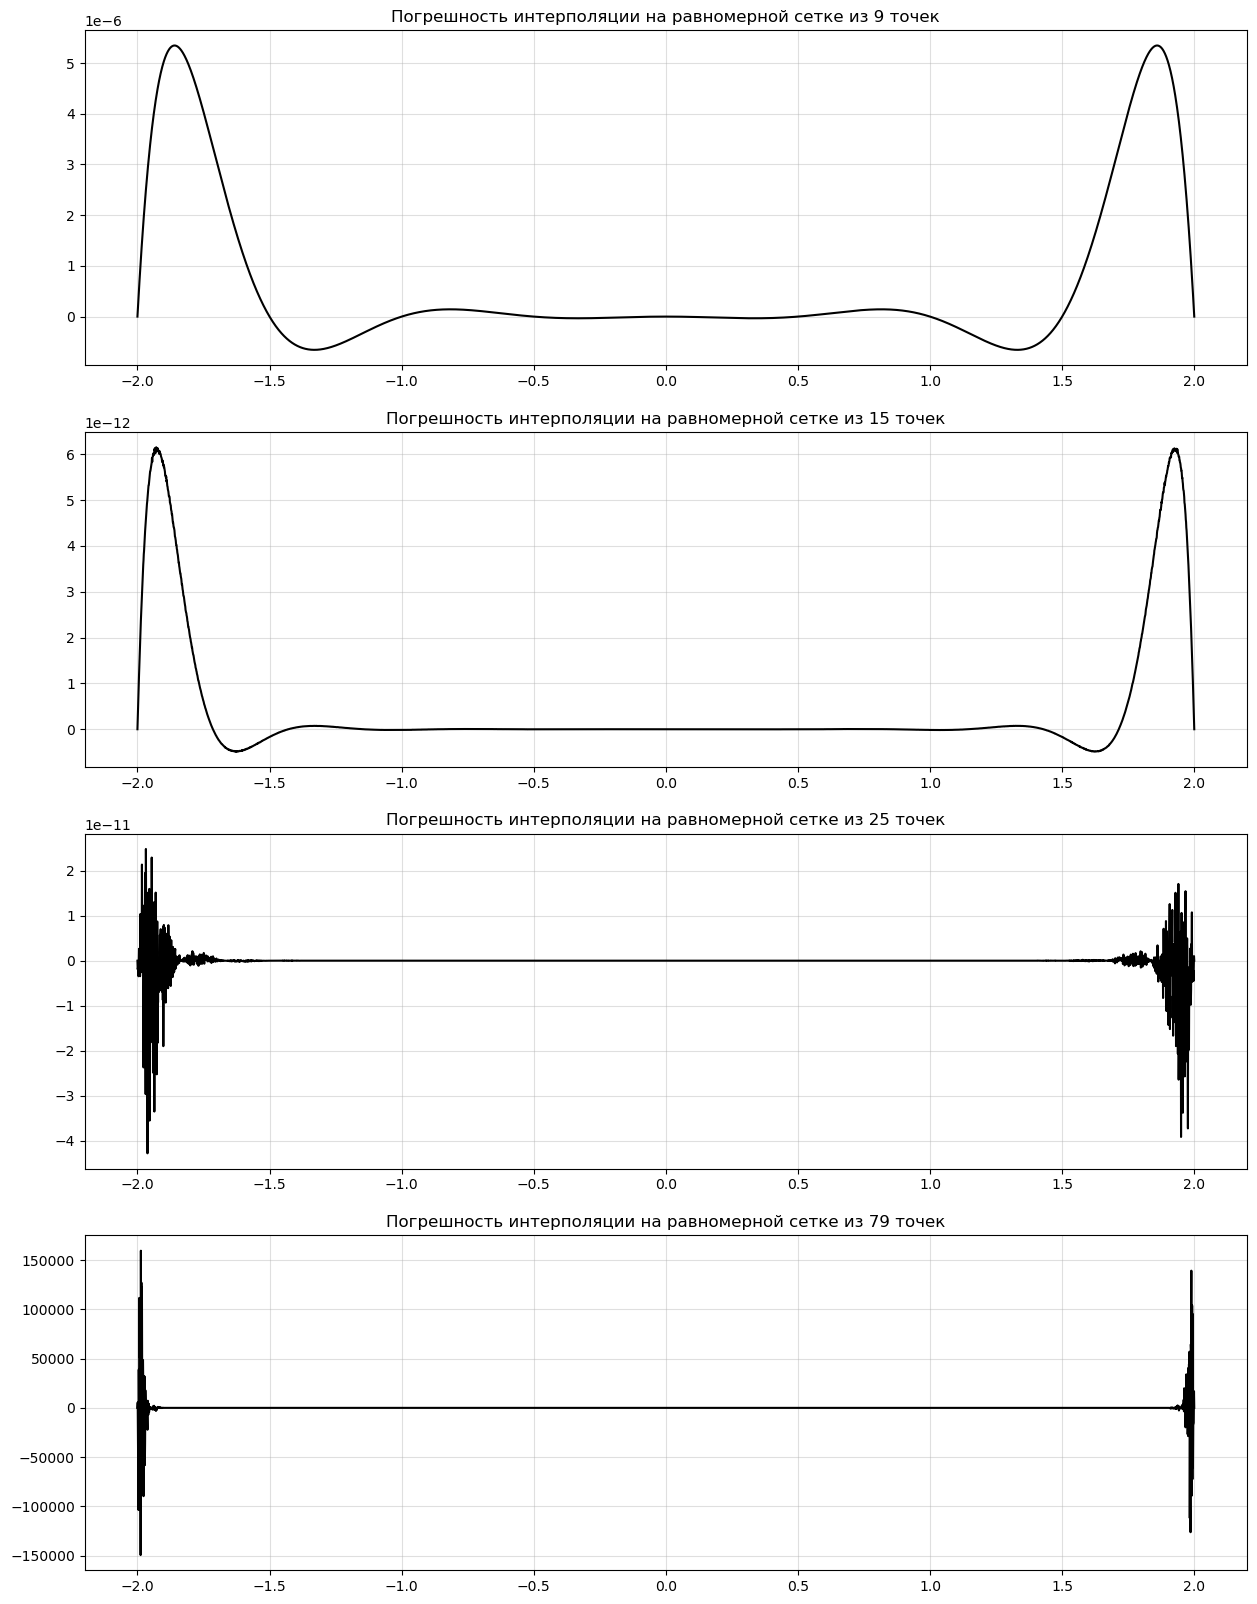

In [7]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.linspace(-2, 2, num, dtype=np.float64)
    interpol = poly_lagrange(xgrid, np.cosh, gr)
    axs[i].plot(xgrid, interpol - np.cosh(xgrid), color='black')
    axs[i].grid(alpha=0.4)
    axs[i].set_title(label=f'Погрешность интерполяции на равномерной сетке из {num} точек')

Посмотрим на результаты аналогичной интерполяции и её погрешности для функции **sign(x):**

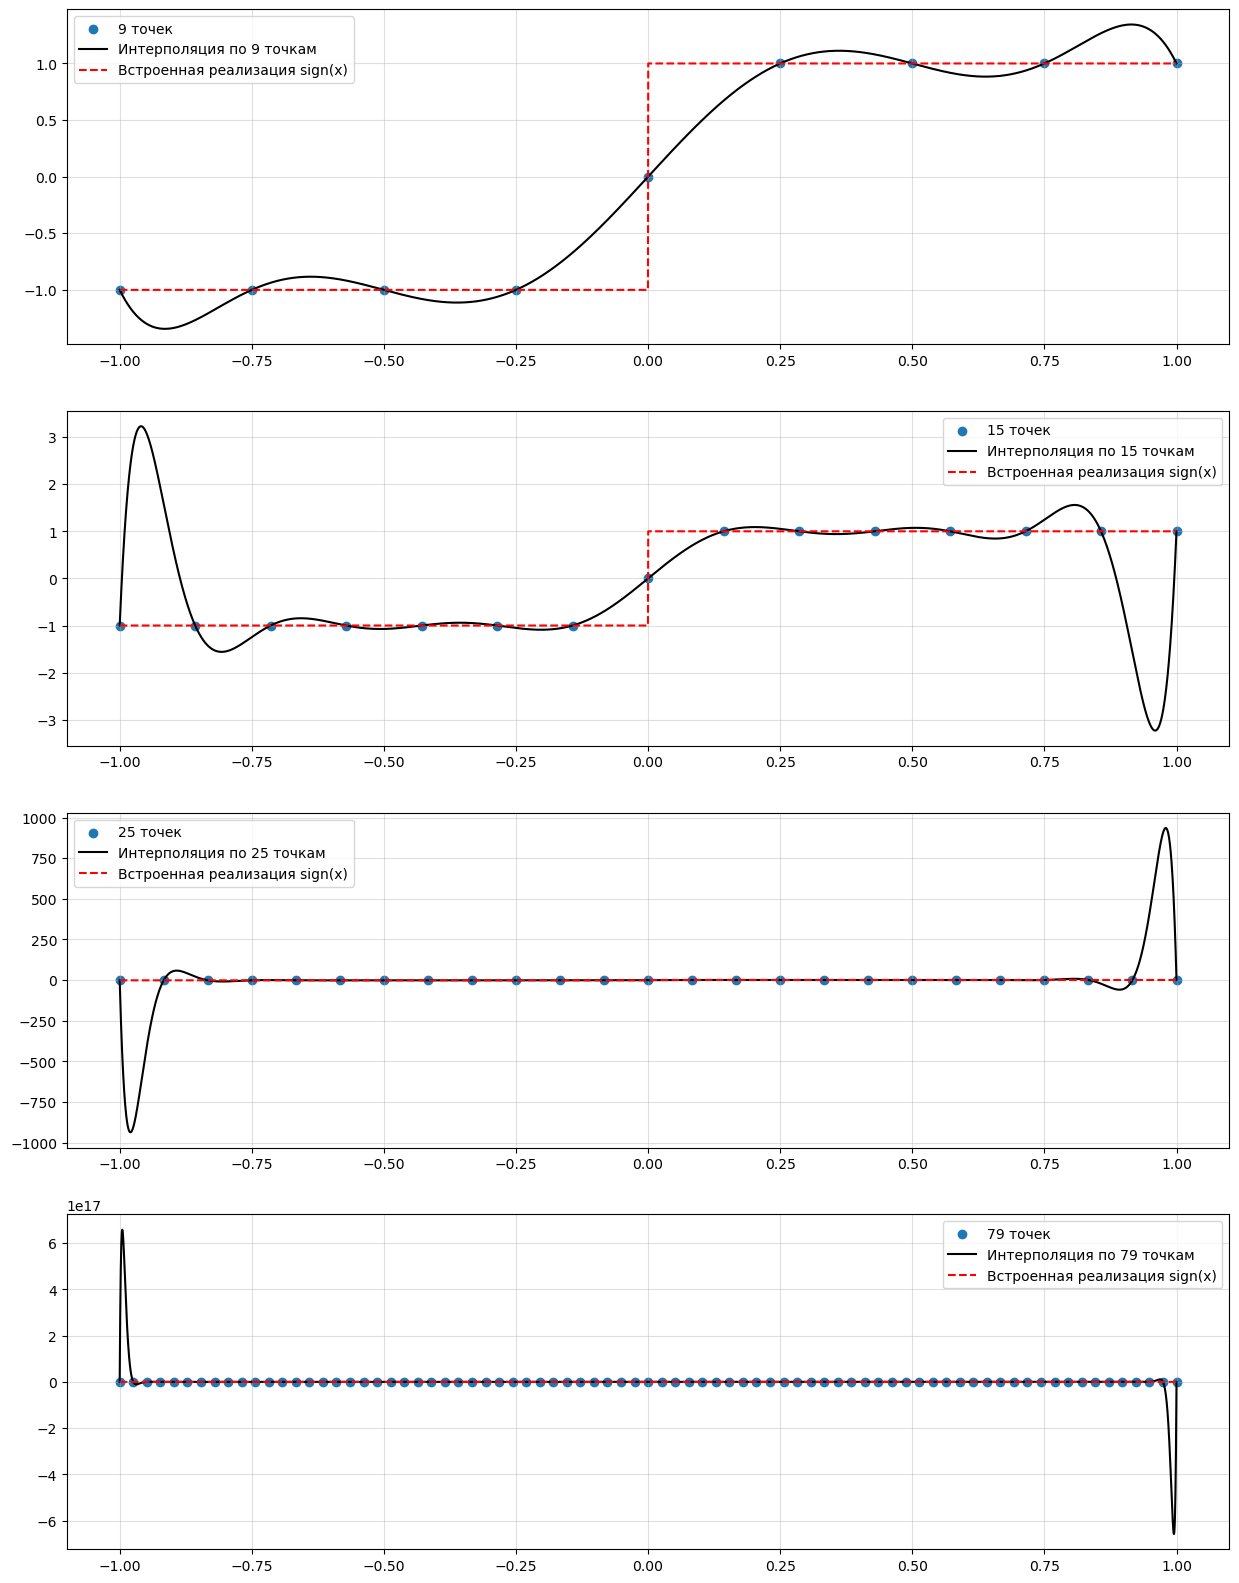

In [9]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    xgrid = np.linspace(-1, 1, 4000)
    gr = np.linspace(-1, 1, num, dtype=np.float64)
    interpol = poly_lagrange(xgrid, np.sign, gr)
    axs[i].scatter(gr, np.sign(gr), label=str(num)+' точек')
    axs[i].plot(xgrid, interpol, label = f'Интерполяция по {num} точкам', color='black')
    axs[i].plot(xgrid, np.sign(xgrid), label=r"Встроенная реализация sign(x)", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

**Погрешность**  интерполяции **sign(x)** на равномерной сетке:

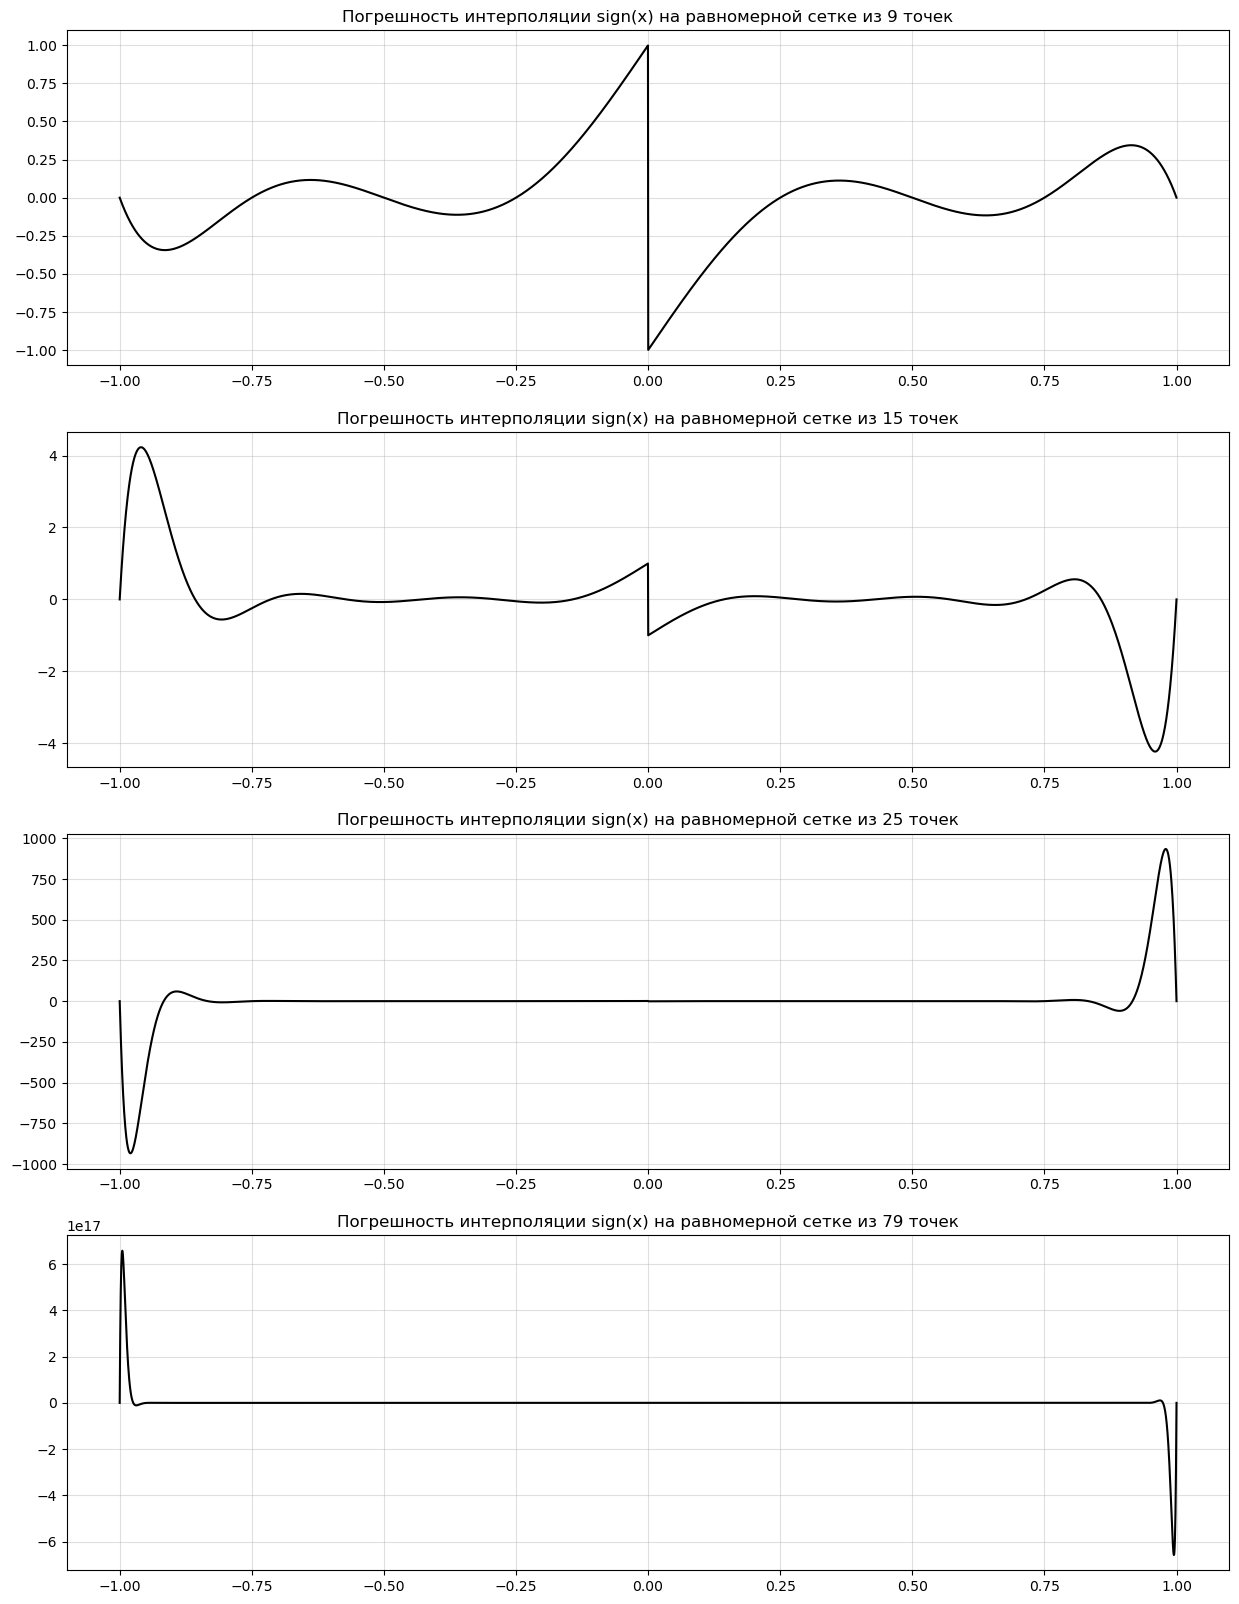

In [10]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.linspace(-1, 1, num, dtype=np.float64)
    interpol = poly_lagrange(xgrid, np.sign, gr)
    axs[i].plot(xgrid, interpol - np.sign(xgrid), color='black')
    axs[i].grid(alpha=0.4)
    axs[i].set_title(label=f'Погрешность интерполяции sign(x) на равномерной сетке из {num} точек')

### Сетка из нулей полиномов Чебышёва

Теперь рассмотрим неэквидистантную сетку, состоящую из нулей полиномов Чебышёва. **Теоретическая справка**: *Полиномами Чебышёва 1 рода* называются функции вида:
$$
T_n(x)=\cos(n\cdot\arccos(x))
$$
Нетрудно показать, что данное выражение действительно является полиномом степени $n$, при $n=0 \to T_0(x) = 1$; при $n=1 \to T_1(x)=x$, а полином приозвольной степени $n$ определяется выражением: 
$$T_{n+1}(x)=2xT_{n}(x) - T_{n-1}(x)
$$
Неопсредственно из опредления полиномов Чебышёва нетрудно получить множество их экстремумов, т.е. точки $x_m$, в которых $|T_n(x)|=1$, а также множество их нулей:
$$
n\cdot \arccos(x) = \frac{\pi}{2} + 2\pi m \longrightarrow x_m = \cos \left( \frac{\pi(2m+1)}{2n} \right)
$$

Построим сетку на данных в условии отрезках с соответствующими числами узлов:

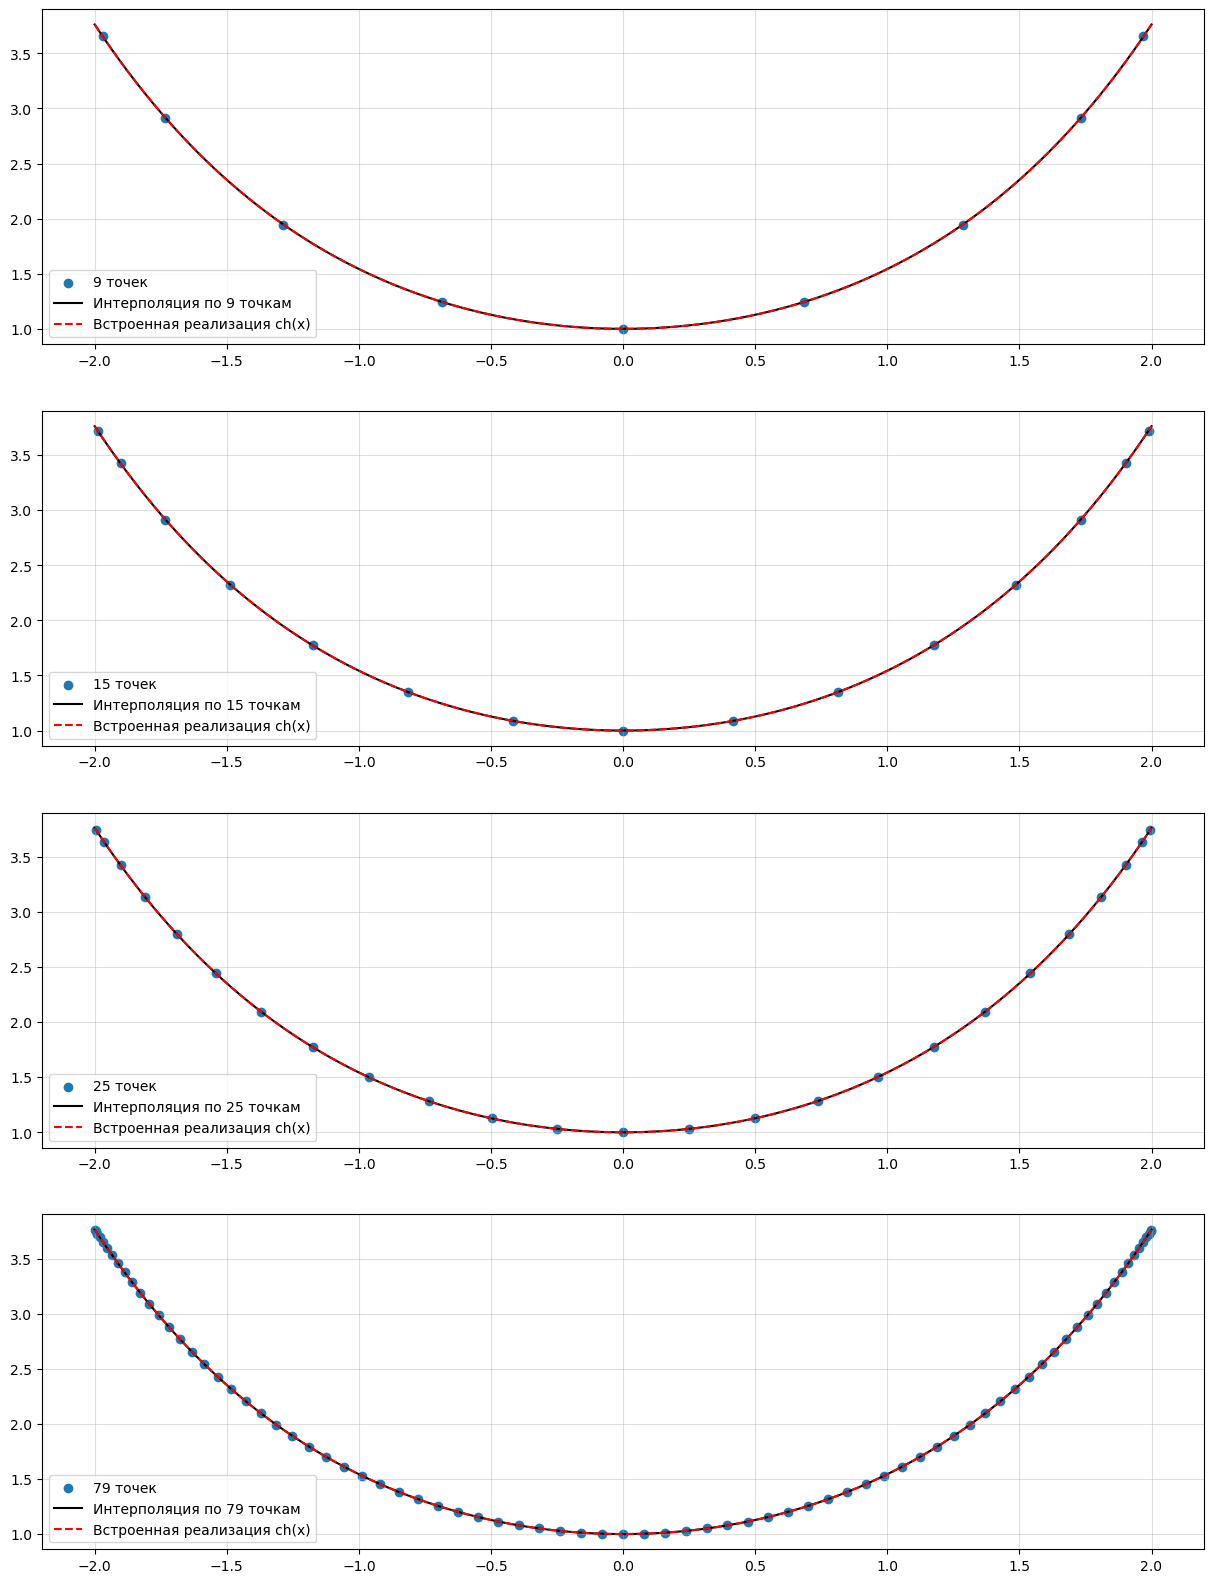

In [12]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)
xgrid = np.linspace(-2, 2, 4000)

for i, num in enumerate(nums):
    gr = np.polynomial.chebyshev.chebpts1(num)*2
    interpol = poly_lagrange(xgrid, np.cosh, gr)
    axs[i].scatter(gr, np.cosh(gr), label=str(num)+' точек')
    axs[i].plot(xgrid, interpol, label = f'Интерполяция по {num} точкам', color='black')
    axs[i].plot(xgrid, np.cosh(xgrid), label=r"Встроенная реализация ch(x)", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

**Погрешности:** 

Теперь посмотрим на погрешности интерполяции на сетке из нулей полиномов Чебышёва для функции **ch(x)**

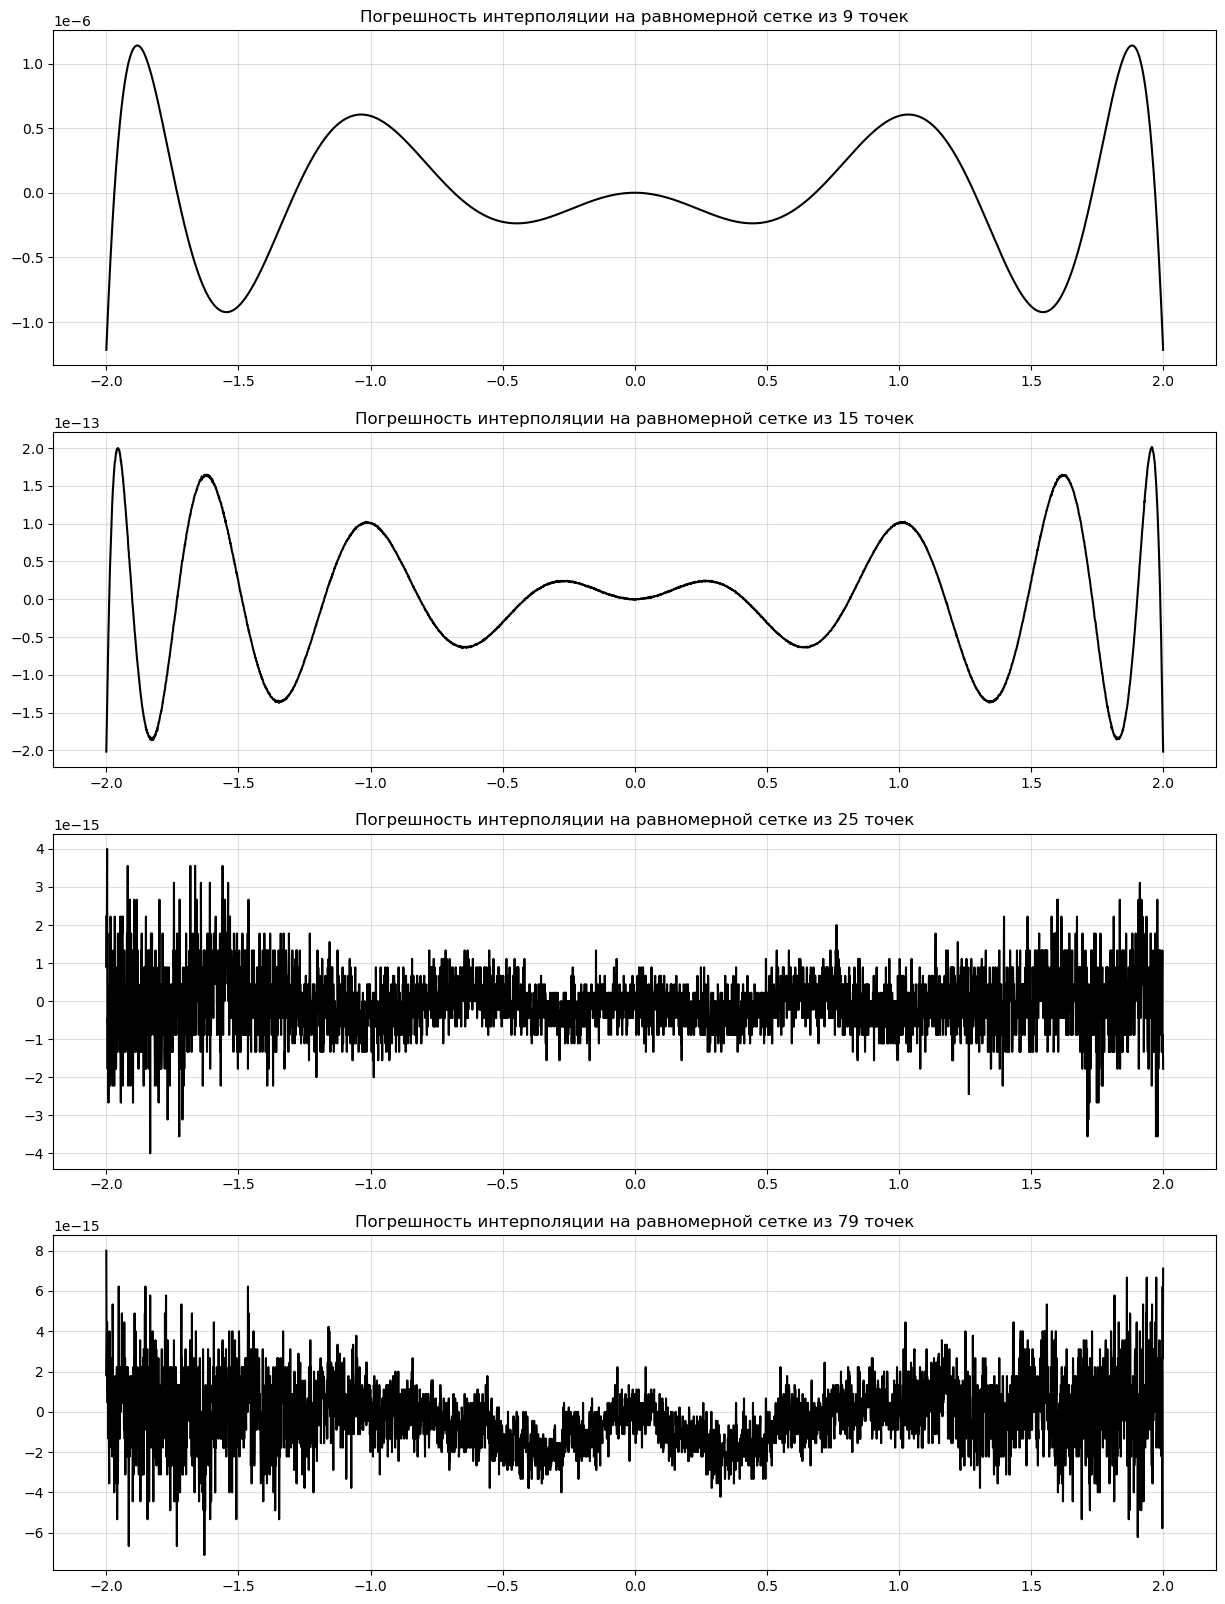

In [13]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.polynomial.chebyshev.chebpts1(num)*2
    interpol = poly_lagrange(xgrid, np.cosh, gr)
    axs[i].plot(xgrid, interpol - np.cosh(xgrid), color='black')
    axs[i].grid(alpha=0.4)
    axs[i].set_title(label=f'Погрешность интерполяции на равномерной сетке из {num} точек')

Посмотрим на результаты аналогичной интерполяции и её погрешности для функции **sign(x):**

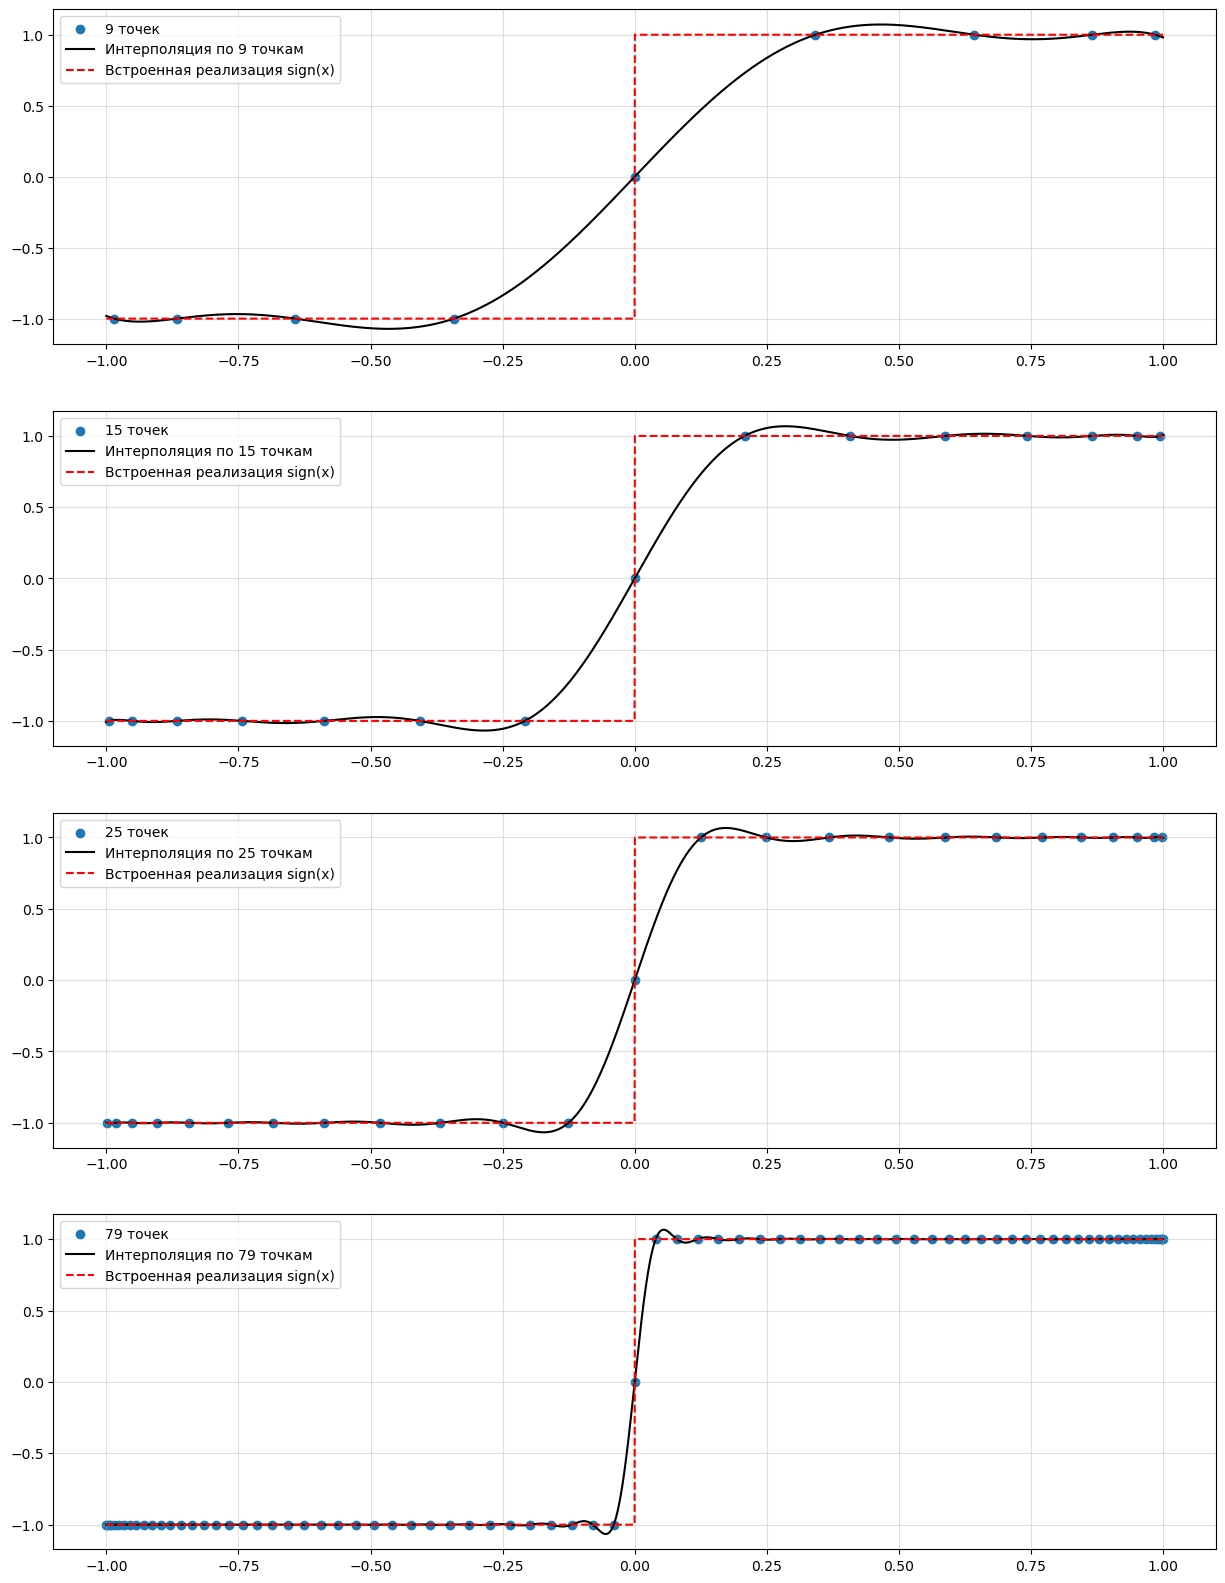

In [14]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    xgrid = np.linspace(-1, 1, 4000)
    gr = np.polynomial.chebyshev.chebpts1(num)
    interpol = poly_lagrange(xgrid, np.sign, gr)
    axs[i].scatter(gr, np.sign(gr), label=str(num)+' точек')
    axs[i].plot(xgrid, interpol, label = f'Интерполяция по {num} точкам', color='black')
    axs[i].plot(xgrid, np.sign(xgrid), label=r"Встроенная реализация sign(x)", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

**Погрешность**  интерполяции **sign(x)** на сетке из нулей полиномов Чебышёва:

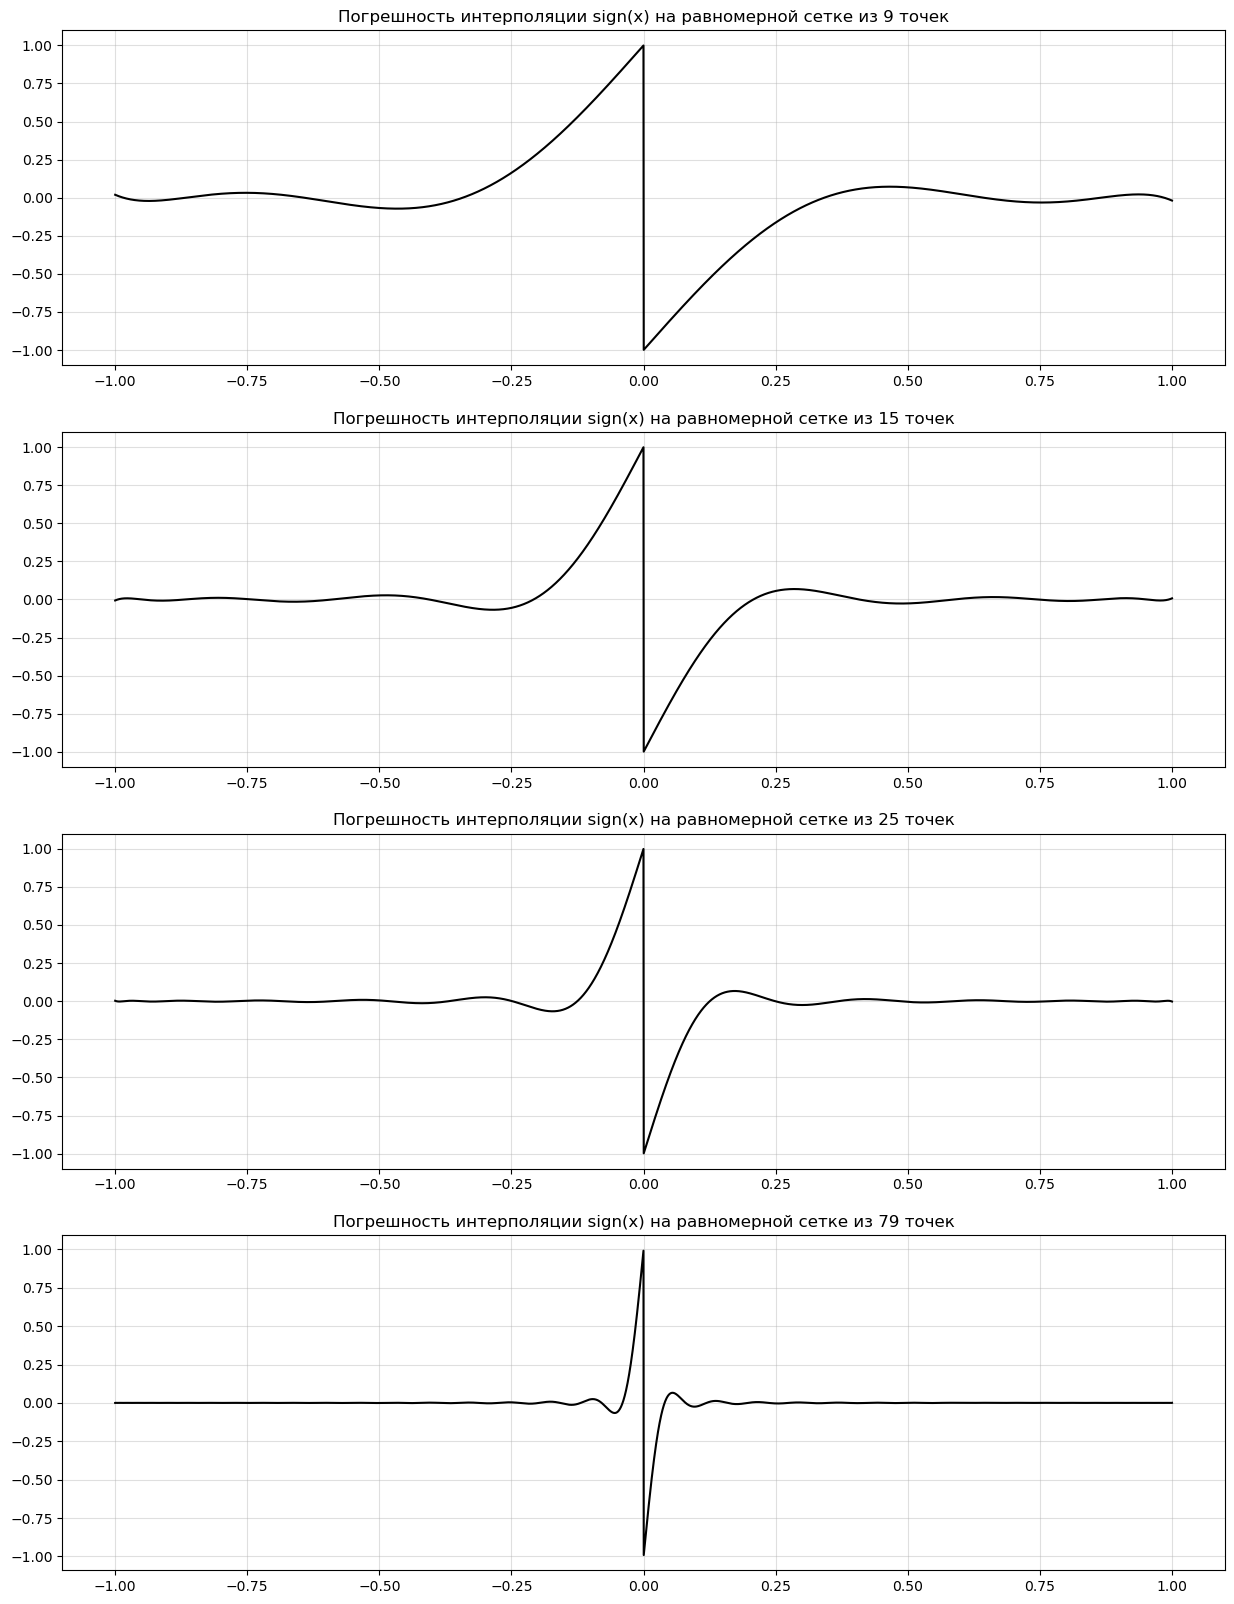

In [15]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.polynomial.chebyshev.chebpts1(num)
    interpol = poly_lagrange(xgrid, np.sign, gr)
    axs[i].plot(xgrid, interpol - np.sign(xgrid), color='black')
    axs[i].grid(alpha=0.4)
    axs[i].set_title(label=f'Погрешность интерполяции sign(x) на равномерной сетке из {num} точек')

### Вывод по данной части:

По полученным графикам нетрудно заметить, что погрешность интерполяции на сетке из нулей полиномов Чебышёва значительно ниже, чем на равномерной сетке. 

-На равномерной сетке при попытке построить интерполяцию по 79 точкам для обеих функций виден экстремум интерполяционного полинома на краях отрезка, значительно превышаюший значения функции, что делает интерполяцию при приближении к концам неинформативной. В этом случае погрешность для **ch(x)** достигает минимума при 15 узлах равномерной сетки, а **sign(x)** -- при 9.

-На сетке из нулей полиномов Чебышёва интерполяционный полином Лагранжа приближает обе функции значительно лучше, заметный рост ошибок при приближении к концам отрезков отсутствует. Также на данной сетке достигается значительно меньшая абсолютная погрешность, для **sign(x)** $\delta_{max} \approx 1$ для всех количеств нулей, что является неулучшаемой погрешностью, т.к. функция разрывна. Для **ch(x)** минимум достигается при 25 узлах и составляет порядка $10^{-15}$.

**Таким образом, сетка из нулей полиномов Чебышёва является очень хорошим инструментом для построения интерполяциии**

## Часть 2: Интерполяция B - сплайном порядка 2 с дефектом 1 

### Теория

В данной части работы мы будем производить кусочно-полиномиальную интерполяцию сплайнами. Пусть на отрезке [a; b] задана сетка $\{x_n\}_{n=0}^{N-1}$ Сплайном $S_m(x)$ называется определенная на этом отрезке функция, имеющая $l$ непрерывных производных и являющаяся на каждом интервале между узлами многочленом степени $m$. Имеется сплайн второго порядка с дефектом $d=m-l=1$, то есть мы имеем полином 2-й степени с одной непрерывной производной.
В данной задаче будут использоваться сплайны с локальным (финитным) носителем (В - сплайны). Они используются как для интерполяции функции, так и в качестве базисных функций при построении методов типа конечных элементов. Функция В - сплайна в общем виде задается следующей формулой:
$$
B_{N-1, n}(x)=B_{N-1} (x_n, x_{n+1},...,x_{n+N}, x) = N \sum_{i=n}^{n+N} \frac{(x_i-x)_{max}^{N-1}}{\prod \limits_{j=n, j\neq i}^{n+N}(x_i-x_j)}
$$
, где 
$$
(x_i - x)_{max}^{N-1} = \begin{cases} (x_i - x)^{N-1}, x \leq x_i \\ 0, x > x_i\end{cases}
$$
Рассомртим для простоты случай эквидистантной сетки: $x_{n+i} = x_n + ih$. В нашем случае $N=3$ и построение данного сплайна было изложено в лекционном курсе, здесь приведём лишь результат:
\begin{equation}
B_i^2(t(x))=\begin{cases} t^2, ~~ t=\frac{x-x_{n-2}}{x_{n-1}-x_{n-2}}, ~~x\in [x_{n-2}, x_{n-1}) \\ 1+2t-t^2, ~t=\frac{x-x_{n-1}}{x_{n} - x_{n-1}}, ~~x\in [x_{n-1}, x_n] 
\\2-t^2, ~~ t=\frac{x-x_n}{x_{n+1} - x_n},  ~~ x\in [x_n, x_{n+1}) \\ (1-t)^2, ~~ t=\frac{x-x_{n+1}}{x_{n+1}-x_{n+1}}, ~~ x\in [x_{n+1}, x_{n+2}] \end{cases}
\end{equation}

При $x<x_{n-2}$ или $x>x_{n+2}$ $B_{2,n}=0$ . Построенный сплайн обладает следующими свойствами: 
* $B_2^{'}(x_{n-2}) = B_2^{'}(x_{n+2})=0$
* $B_2(x_{n-2}) = B_2(x_{n+2})=0$
* $B_2(x_{n-1}) = B_2(x_{n+1})=1$

Интерполируемая функция в пространстве сплайнов порядка 2 будет представляться как линейная комбинация некоторых базисных сплайнов:
$$
f(x) = \sum\limits_{n=0}^N g_nB_{2, n}(x)
$$
Для интерполяции необходимо потребовать выполнения следующего условия: 
$$
g_{i-1}B_{2, i-1}+g_iB_{2,i}+g_{i+1}B_{2, i+1}  =f_i
$$
Где коэффициенты находятся из условий того, что это должна быть интерполирующая функция (то есть в узлах значения должны совпадать с исходной функцией). Индекс указывает на точку носителя, в которой сплайн достигает своего максимума. Система таких соотношений, дополняется граничными условиями (в нашем случае это условия на первые производные сплайна, они совпадают с производной интерполируемой функции на концах отрезков: $B_2^{'}(a) = f^{'}(a); ~~ B_2^{'}(b) = f^{'}(b)$). Получившаяся система для определения коэффициентов разложения будет иметь трехдиагональную матрицу с диагональным преобладанием. Такая интерполяция существует и единственна

Для решение СЛАУ такого вида существует модификация метода Гаусса, которая называется методом прогонки или алгоритмом Томаса. Перепишем нашу систему следующим образом:
$$
A_ix_{i-1} + B_ix_i + C_ix_{i+1} = F_i, i=\overline{1,N}
$$
Пусть $x_i$ связан с $x-{i+1}$ с помощью реккурентного соотношения: $x_i = \alpha_{i+1}x_{i+1} + \beta_{i+1}$ Подставляем в предыдущее выражение, таким образом мы получаем соотношение:
$$
(A_i\alpha_i\alpha_{i+1}+B_i\alpha_{i+1}+C_i)x_{i+1} + A_i\alpha_i\beta_{i+1}+A_i\beta_{i} + B_i\beta_{i+1} - F_i = 0
$$
, которое будет выполняться при условии:
$$
\begin{cases}
\alpha_{i+1} = \frac{-C_i}{A_i\alpha_i+B_i} \\
\beta_{i+1} = \frac{F_i-A_i\beta_i}{A_i\alpha_i+B_i}
\end{cases}
$$
После нахождения всех коэффициентов из реккурентного соотношения получается решение СЛАУ и построение сплайнов. Перейдём к практической реализации.

### Практическая реализация

**Равномерная сетка** 

Рассмотрим интерполяцию сплайнами порядка $m=2$ с дефектом $d=1$ на равномерной сетке для функции **ch(x)** на отрезке $[-2;2]$

In [2]:
from scipy.interpolate import BSpline, make_interp_spline, splrep # импортируем необходимые функции

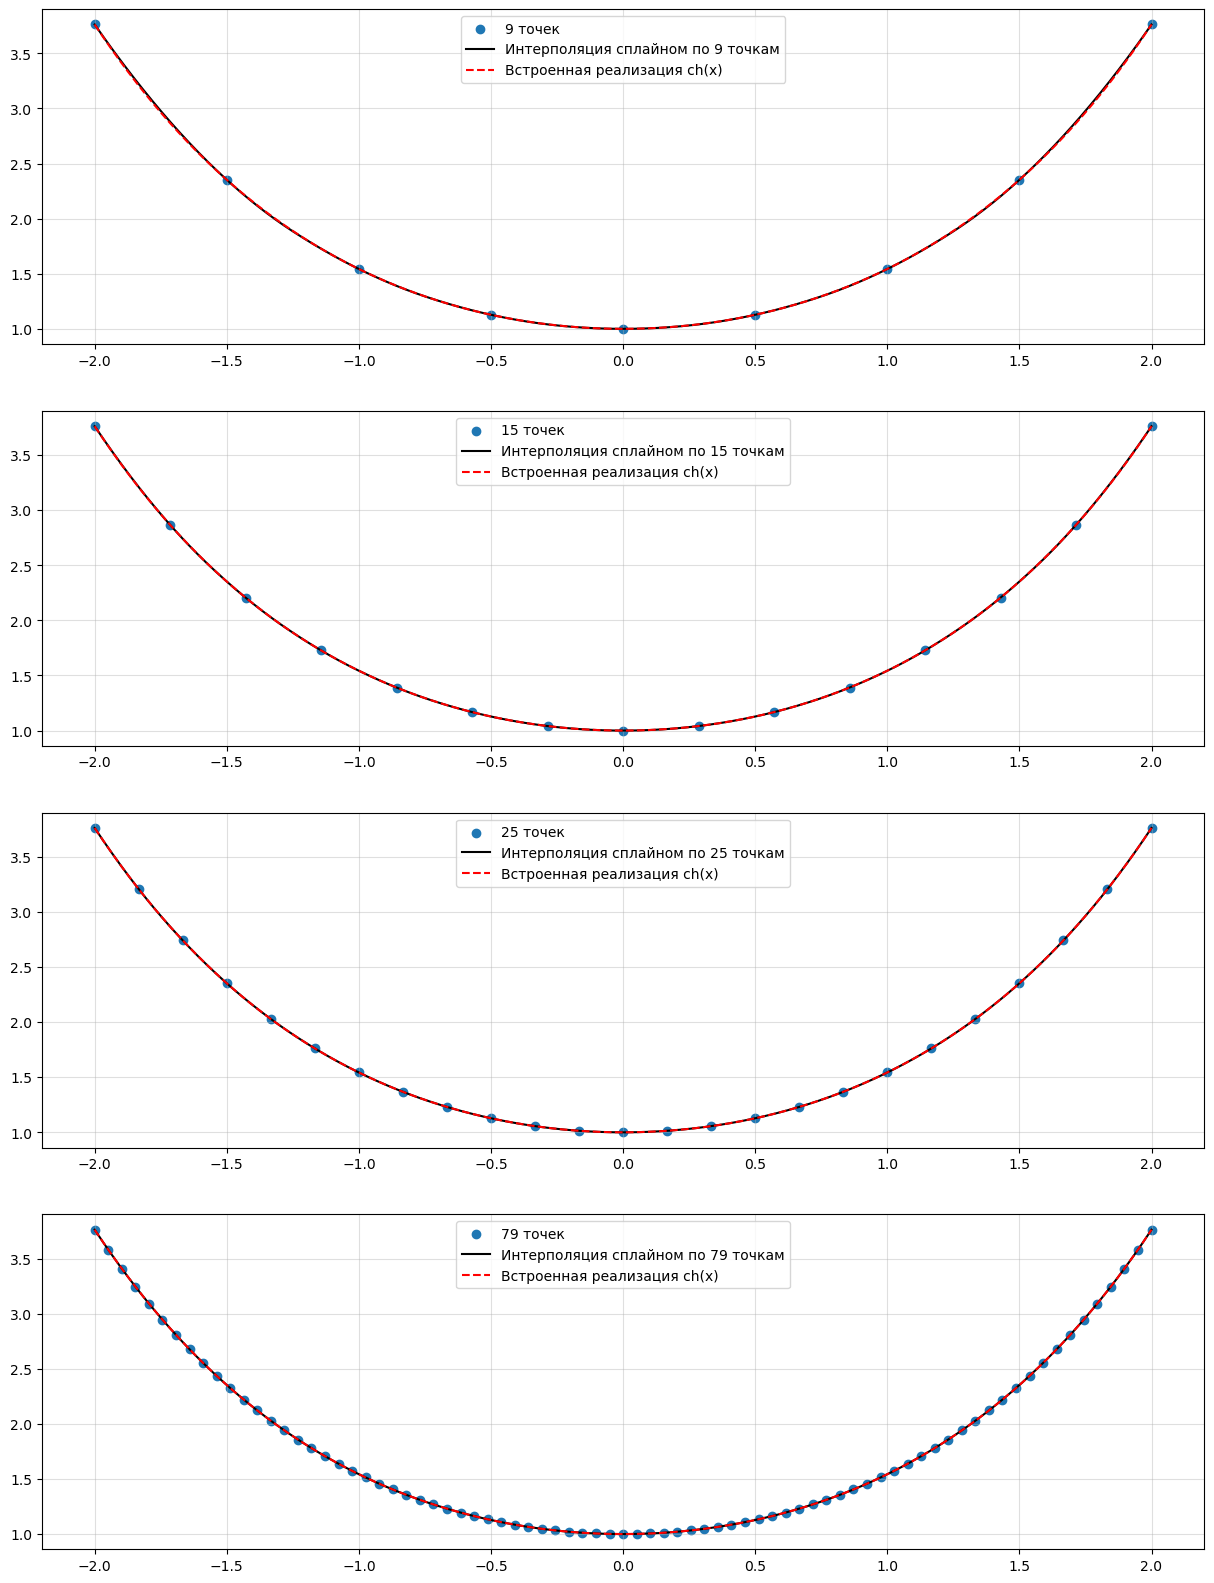

In [3]:
nums = [9, 15, 25, 79]
xgrid = np.linspace(-2, 2, 4000)

fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.linspace(-2, 2, num, dtype=np.float64)
    #interpol = poly_lagrange(xgrid, np.cosh, gr)
    axs[i].scatter(gr, np.cosh(gr), label=str(num)+' точек')
    spline = splrep(gr, np. cosh(gr), k=2)
    axs[i].plot(xgrid, BSpline(*spline)(xgrid), label = f'Интерполяция сплайном по {num} точкам', color='black')
    #axs[i].plot(xgrid, make_interp_spline(gr, np.cosh(gr), k=2, bc_type=((1, np.sinh(-2))))(xgrid), label = f'Интерполяция сплайном по {num} точкам', color='black')
    axs[i].plot(xgrid, np.cosh(xgrid), label=r"Встроенная реализация ch(x)", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

**Погрешность:**

Теперь посмотрим на погрешность полученной интерполяции:

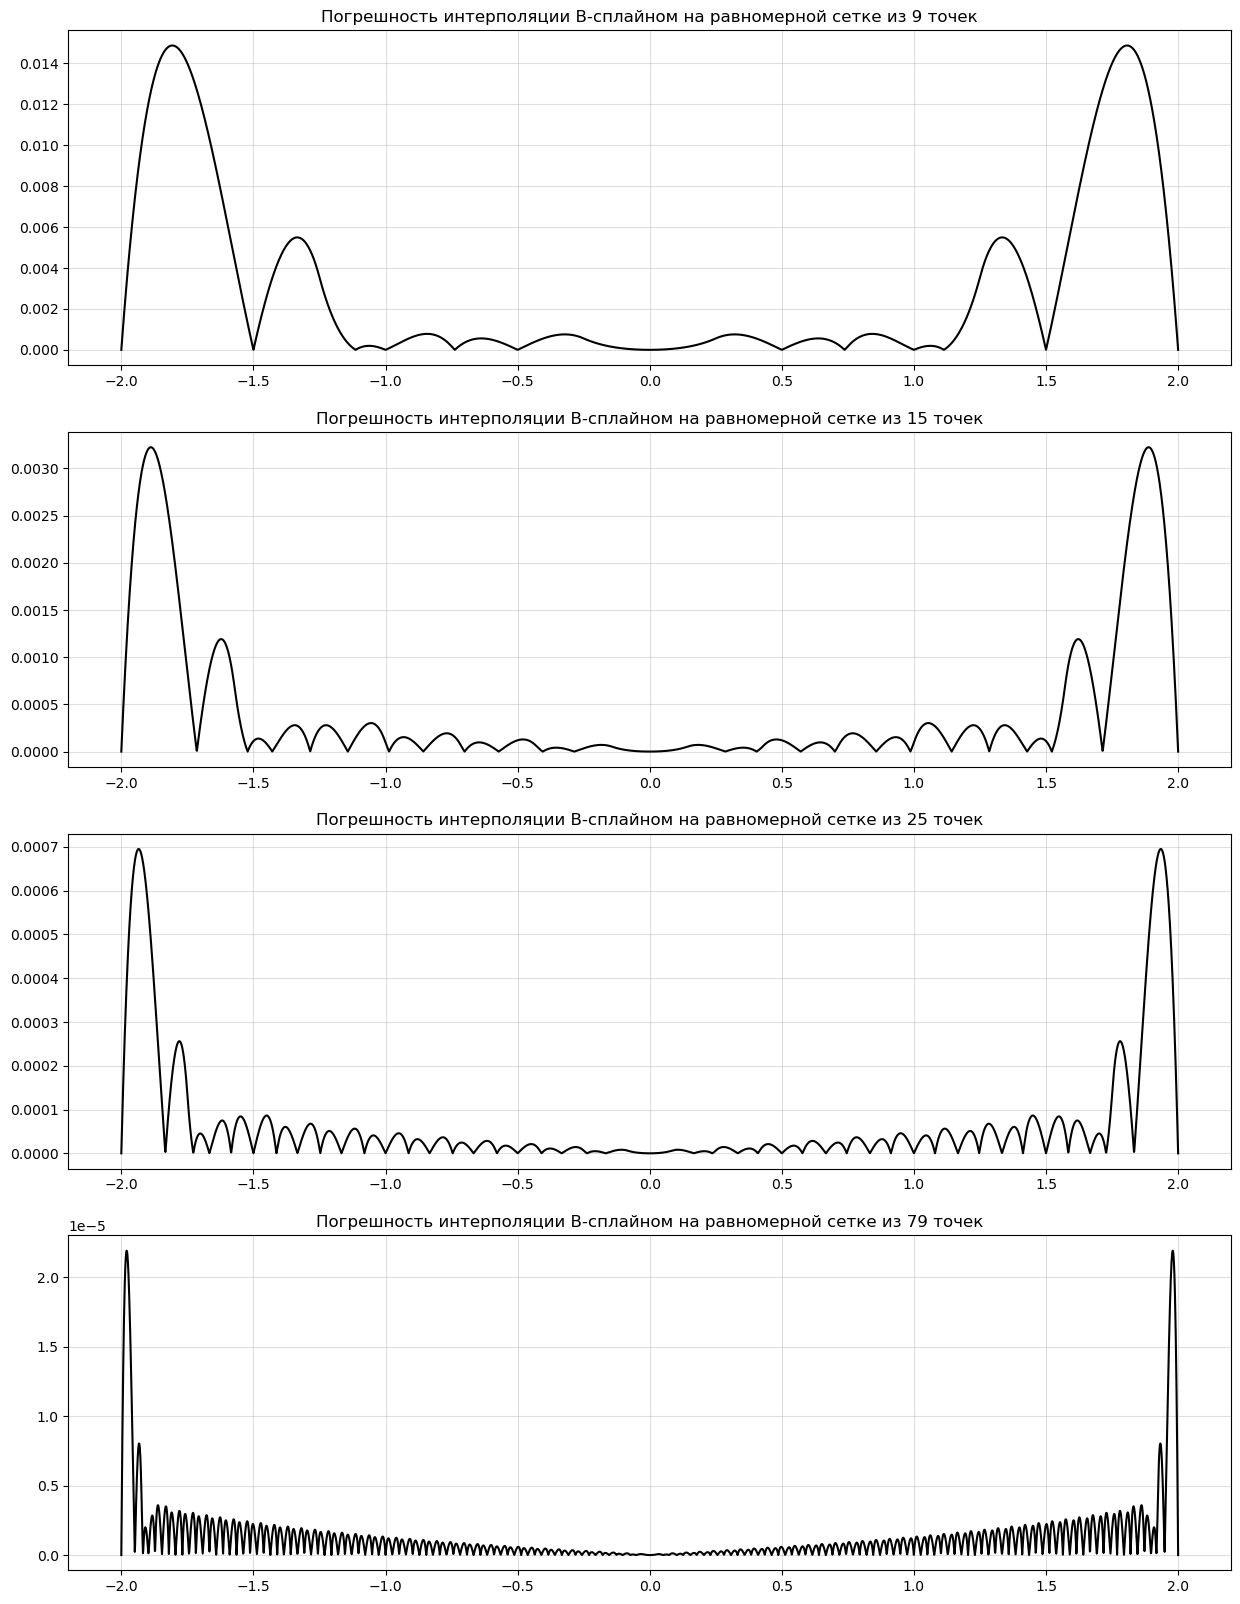

In [44]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.linspace(-2, 2, num, dtype=np.float64)
    spline = splrep(gr, np. cosh(gr), k=2)
    axs[i].plot(xgrid, np.abs(BSpline(*spline)(xgrid) - np.cosh(xgrid)), color='black')
    axs[i].grid(alpha=0.4)
    axs[i].set_title(label=f'Погрешность интерполяции B-сплайном на равномерной сетке из {num} точек')

Аналогично, для функции **sign(x)** на отрезке $[-1; 1]$

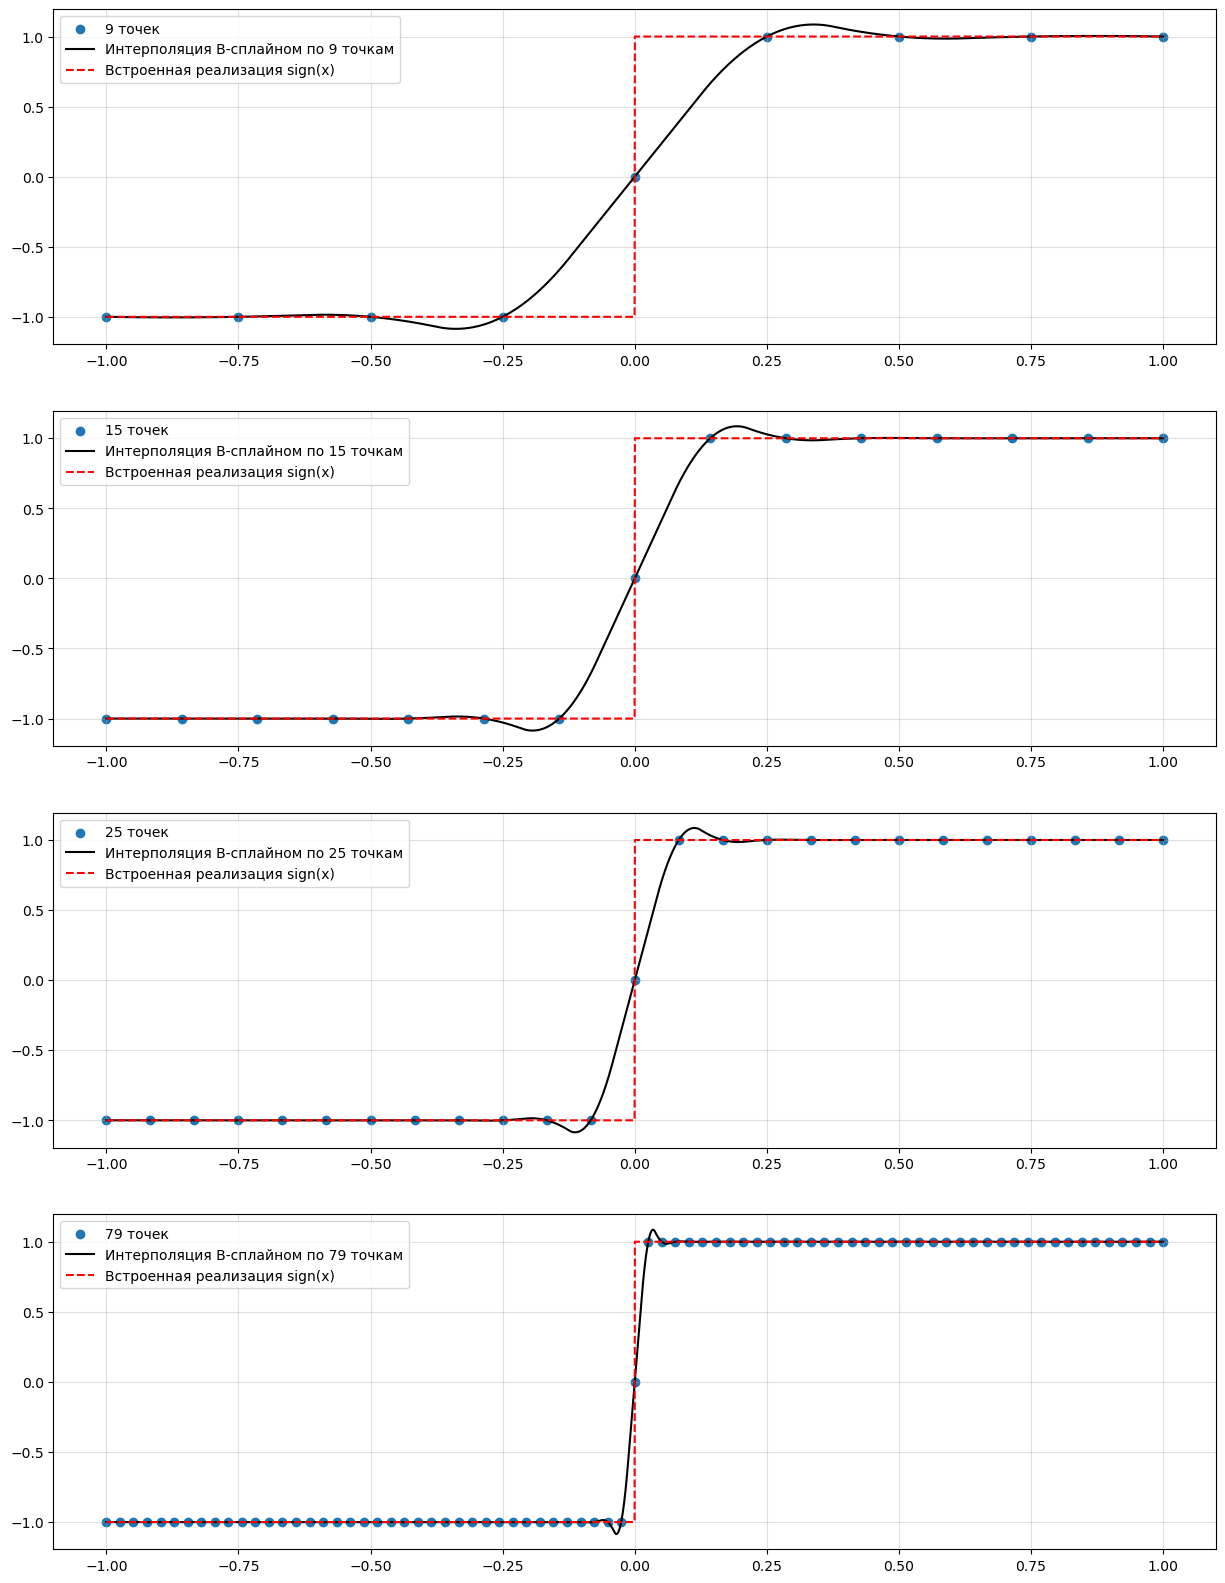

In [37]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    xgrid = np.linspace(-1, 1, 4000)
    gr = np.linspace(-1, 1, num, dtype=np.float64)
    spline = splrep(gr, np.sign(gr), k=2)
    axs[i].scatter(gr, np.sign(gr), label=str(num)+' точек')
    axs[i].plot(xgrid, BSpline(*spline)(xgrid), label = f'Интерполяция B-сплайном по {num} точкам', color='black')
    axs[i].plot(xgrid, np.sign(xgrid), label=r"Встроенная реализация sign(x)", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

**Погрешность** интерполяции B-сплайном для функции **sign(x)**:

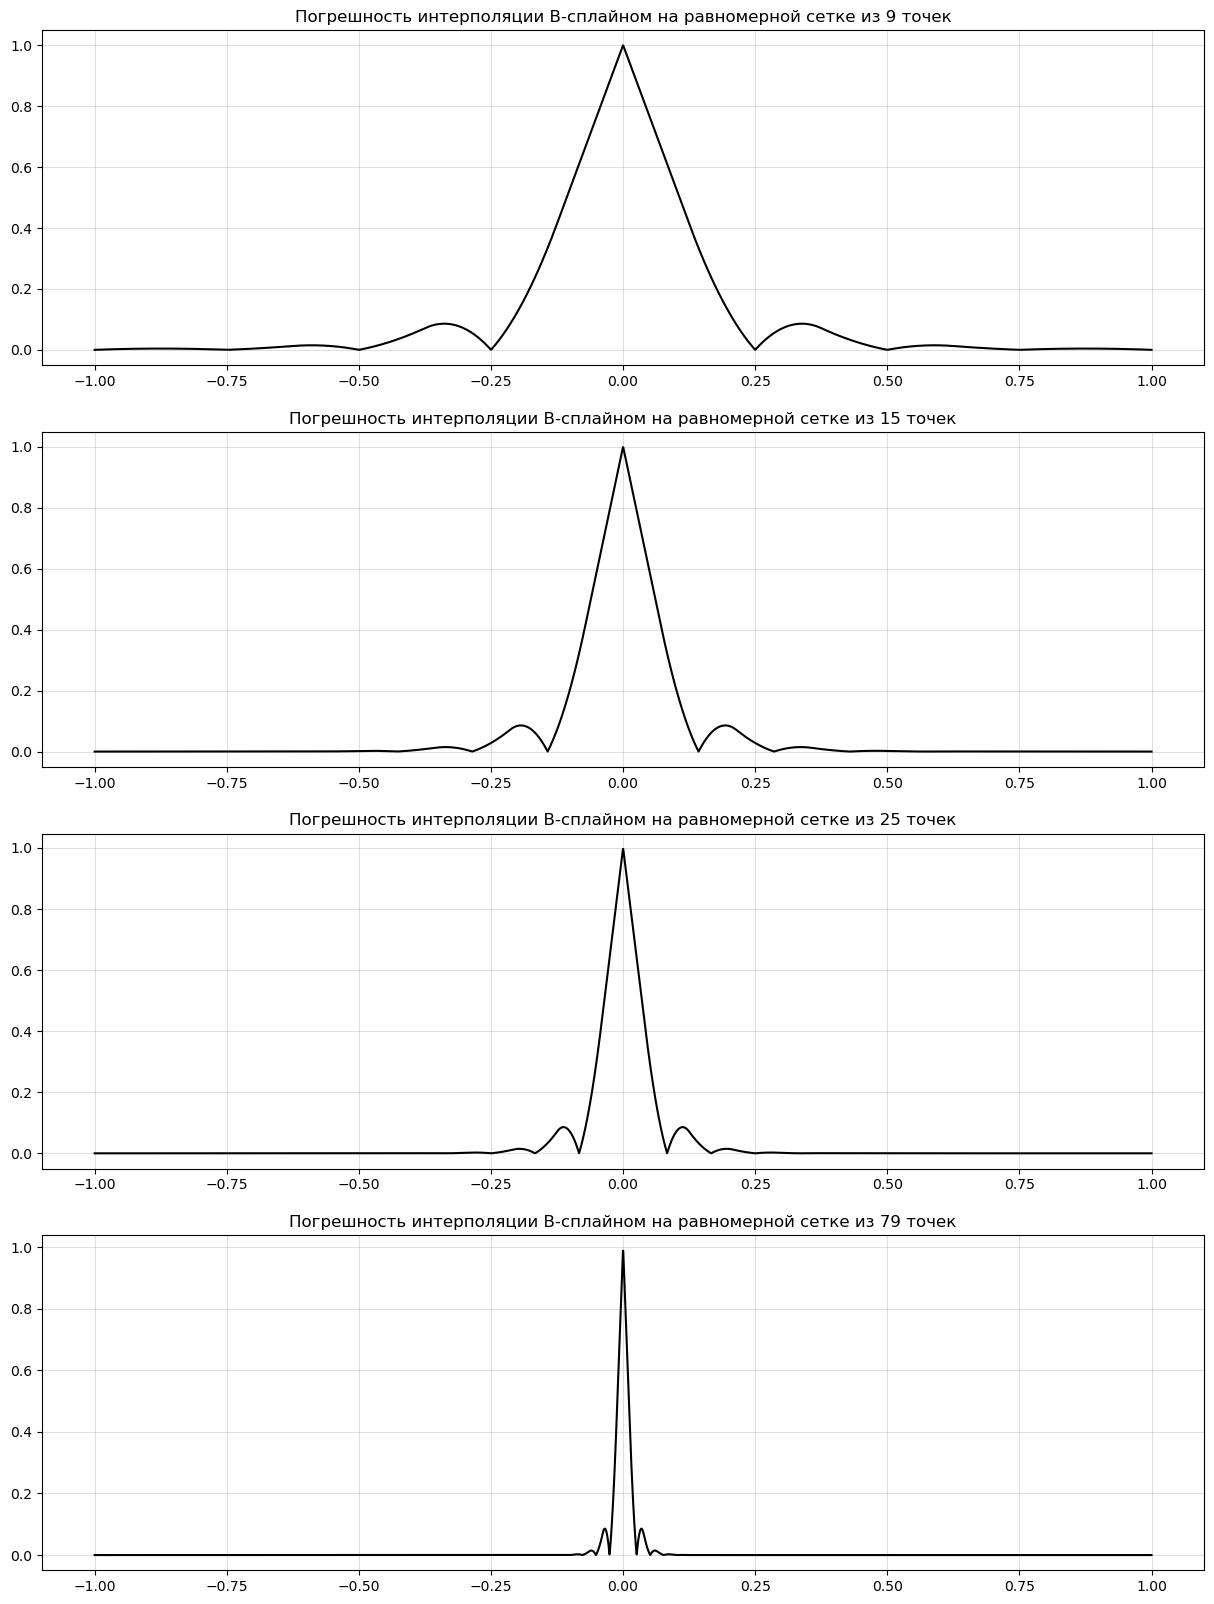

In [41]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.linspace(-1, 1, num, dtype=np.float64)
    spline = splrep(gr, np.sign(gr), k=2)
    axs[i].plot(xgrid, np.abs(BSpline(*spline)(xgrid) - np.sign(xgrid)), color='black')
    axs[i].grid(alpha=0.4)
    axs[i].set_title(label=f'Погрешность интерполяции B-сплайном на равномерной сетке из {num} точек')

**Cетка из нулей полиномов Чебышёва**

Аналогично, произведём интерполяцию на неэквидистантной сетке из нулей полиномов Чебышёва 1 рода для данный функций. **ch(x)**:

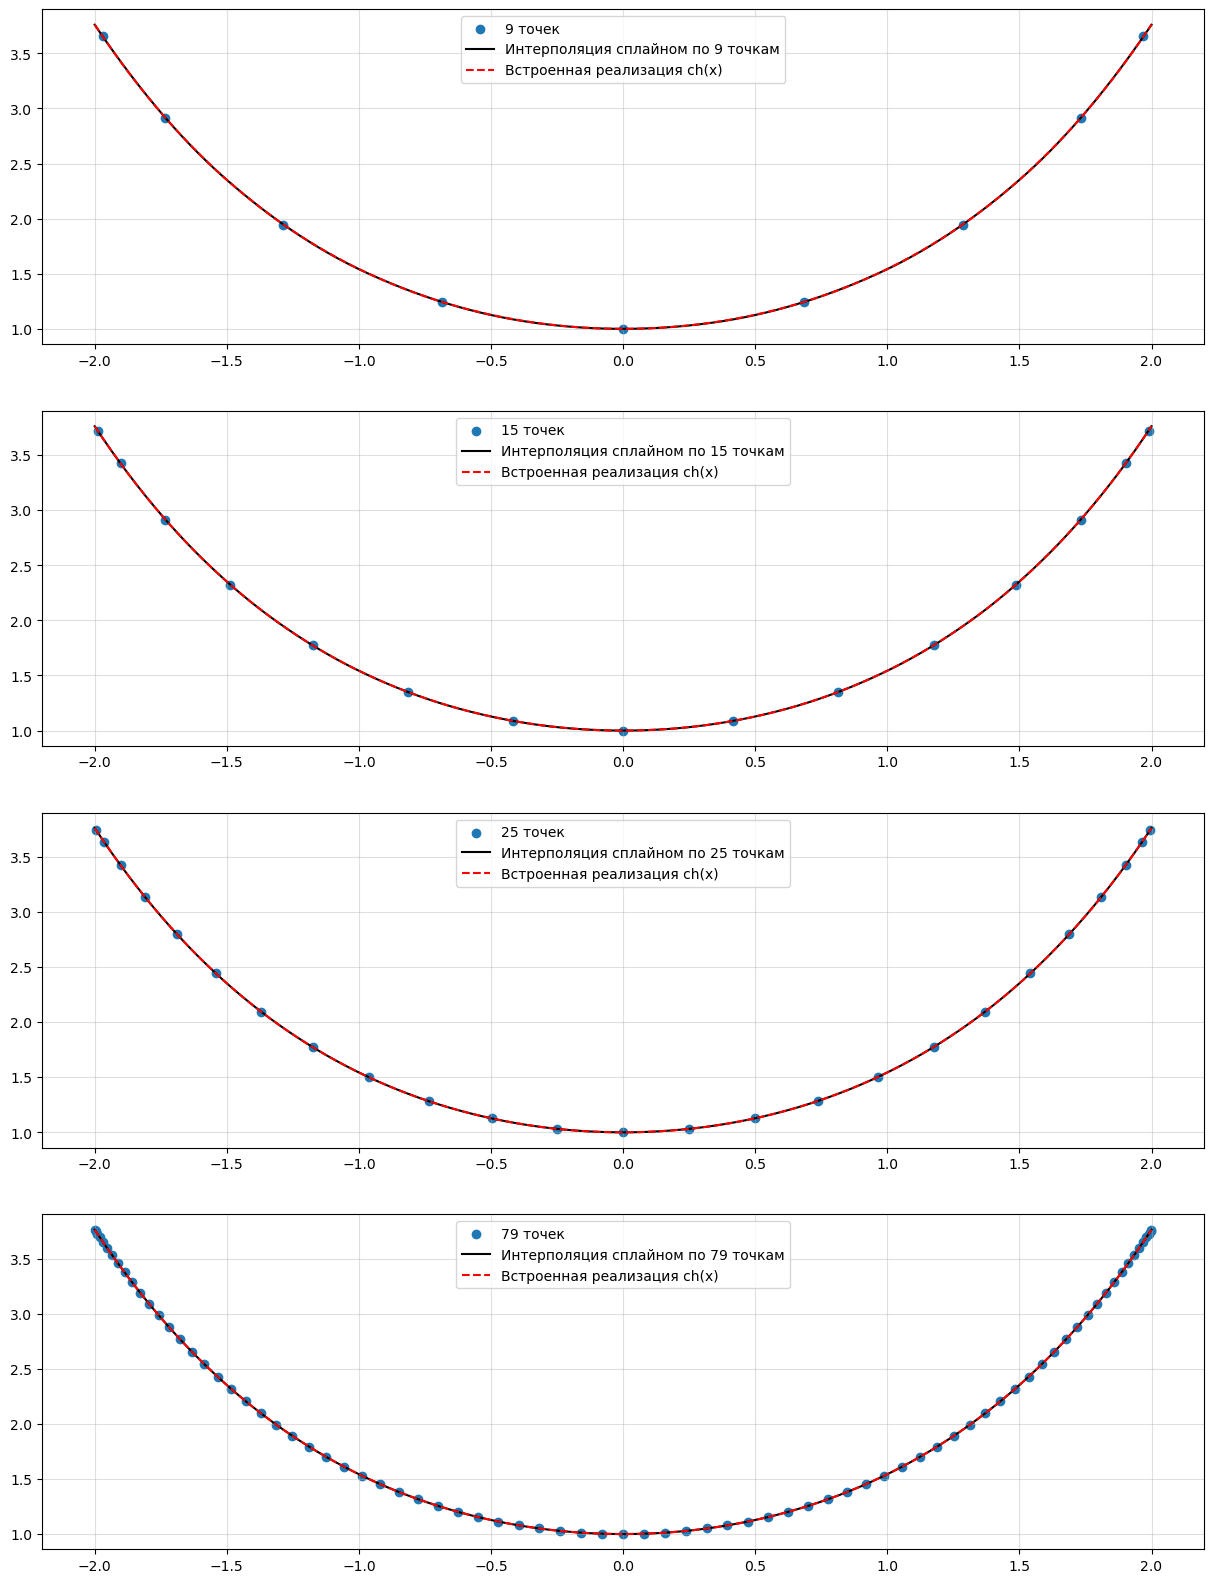

In [60]:
xgrid = np.linspace(-2, 2, 4000)

fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.polynomial.chebyshev.chebpts1(num)*2
    axs[i].scatter(gr, np.cosh(gr), label=str(num)+' точек')
    spline = splrep(gr, np. cosh(gr), k=2)
    axs[i].plot(xgrid, BSpline(*spline)(xgrid), label = f'Интерполяция сплайном по {num} точкам', color='black')
    #axs[i].plot(xgrid, make_interp_spline(gr, np.cosh(gr), k=2, bc_type=((1, np.sinh(-2))))(xgrid), label = f'Интерполяция сплайном по {num} точкам', color='black')
    axs[i].plot(xgrid, np.cosh(xgrid), label=r"Встроенная реализация ch(x)", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

Посмотрим на погрешности интерполяции для сетки из нулей полиномов Чебышёва 1 рода:

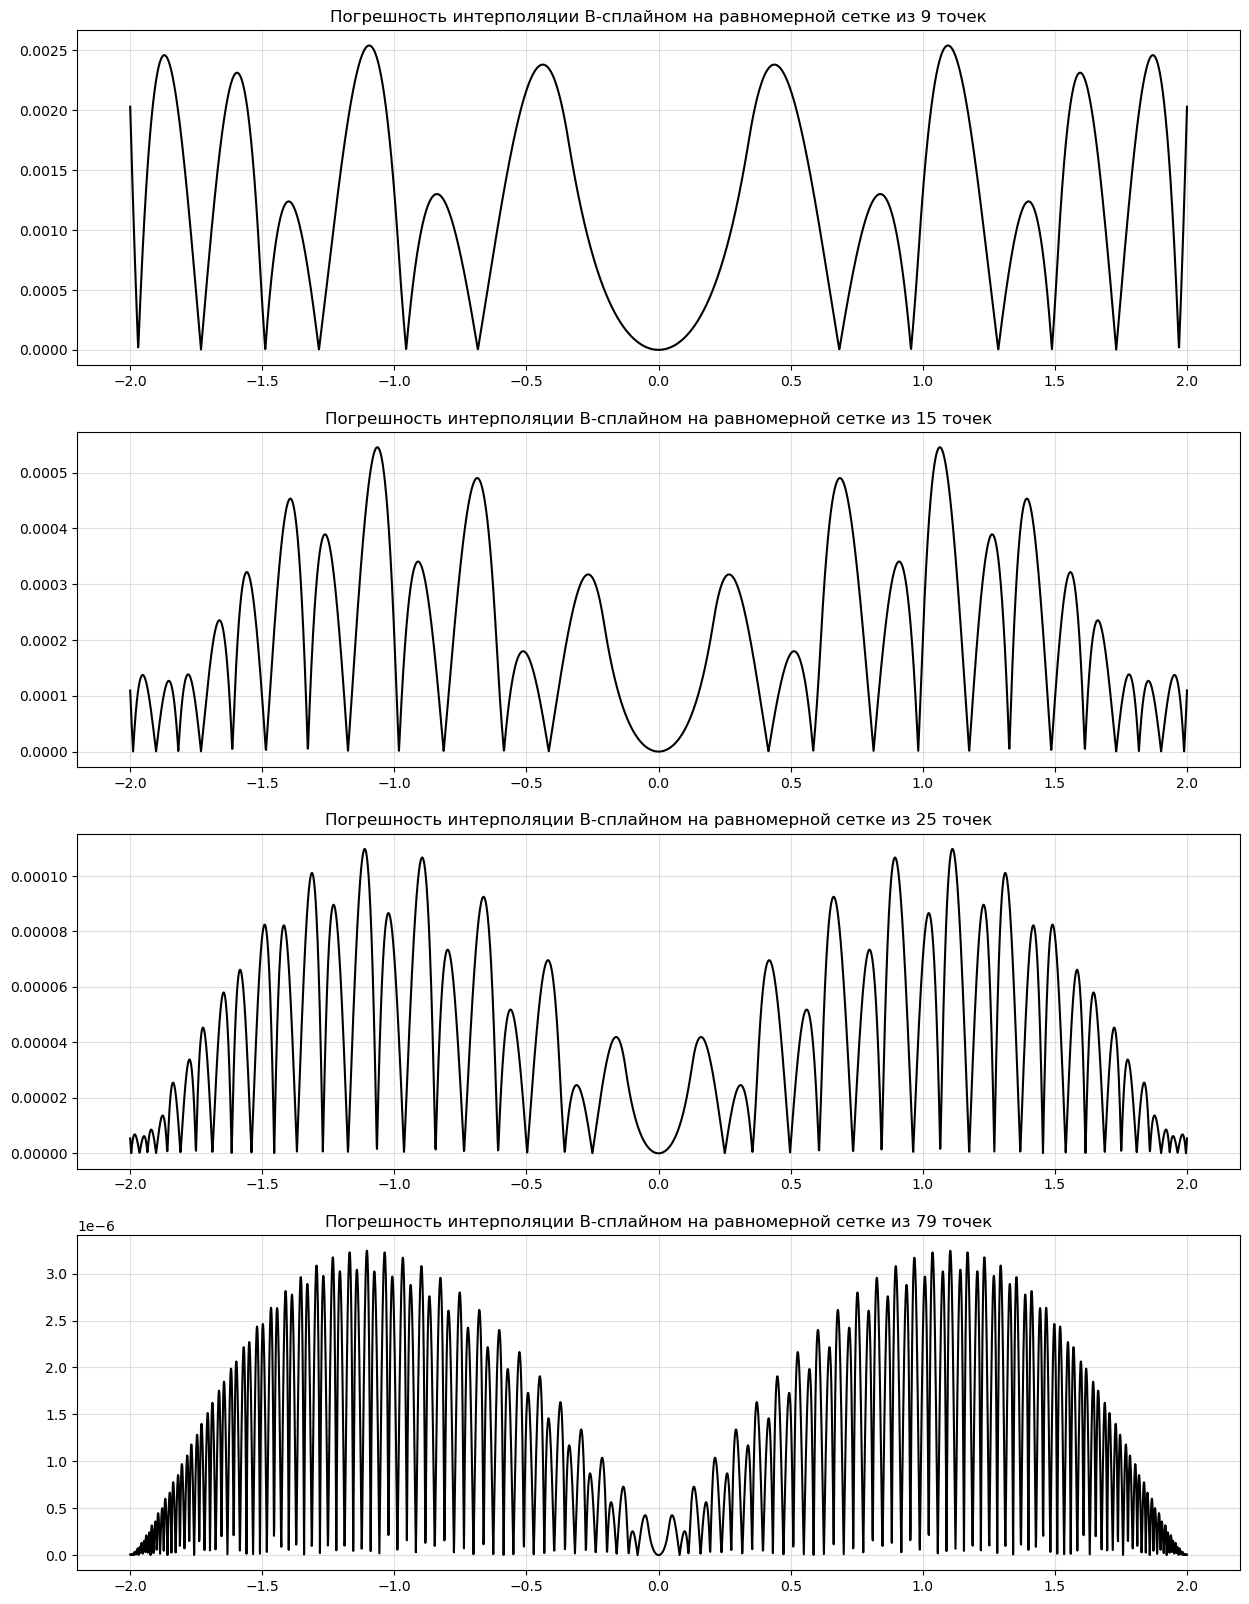

In [63]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr=np.polynomial.chebyshev.chebpts1(num)*2
    spline = splrep(gr, np. cosh(gr), k=2)
    axs[i].plot(xgrid, np.abs(BSpline(*spline)(xgrid) - np.cosh(xgrid)), color='black')
    axs[i].grid(alpha=0.4)
    axs[i].set_title(label=f'Погрешность интерполяции B-сплайном на равномерной сетке из {num} точек')

Аналогично для **sign(x)**:

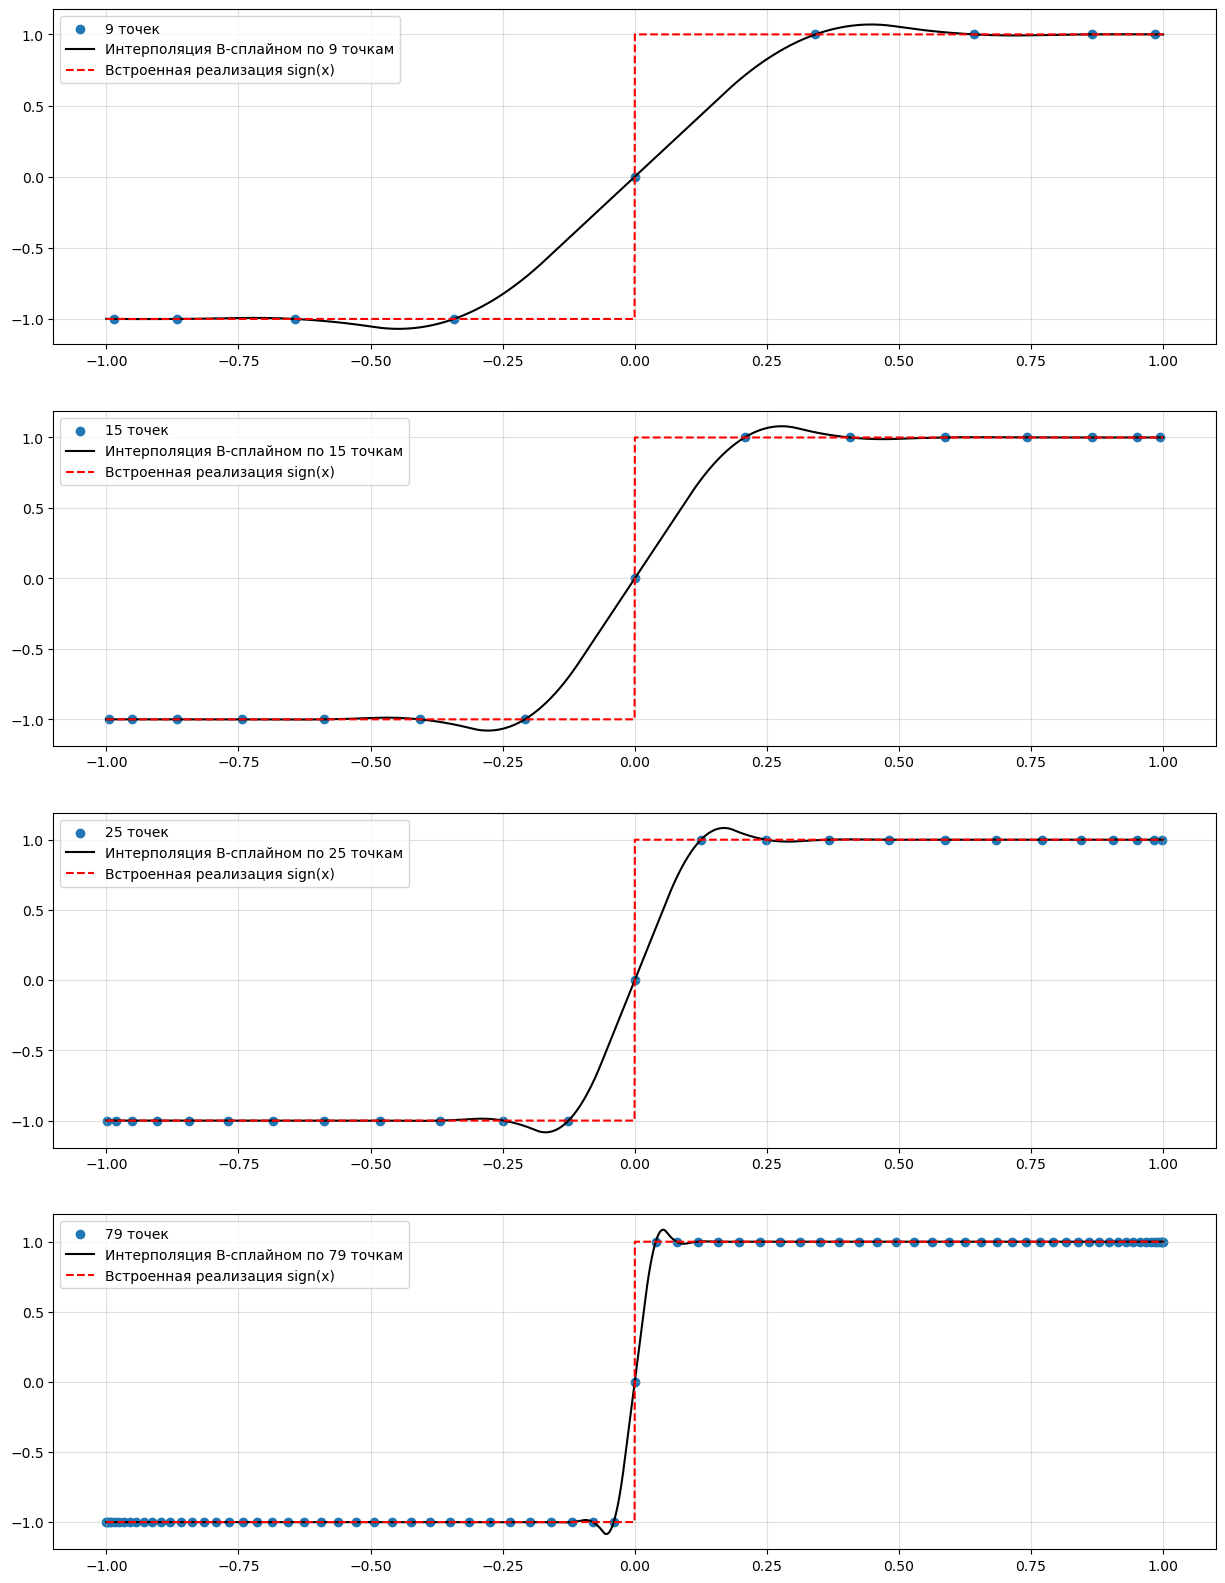

In [64]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    xgrid = np.linspace(-1, 1, 4000)
    gr = np.polynomial.chebyshev.chebpts1(num)
    spline = splrep(gr, np.sign(gr), k=2)
    axs[i].scatter(gr, np.sign(gr), label=str(num)+' точек')
    axs[i].plot(xgrid, BSpline(*spline)(xgrid), label = f'Интерполяция B-сплайном по {num} точкам', color='black')
    axs[i].plot(xgrid, np.sign(xgrid), label=r"Встроенная реализация sign(x)", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

**Погрешность** интерполяции B-сплайнами **sign(x)** на сетке из нулей полиномов Чебышёва 1 рода:

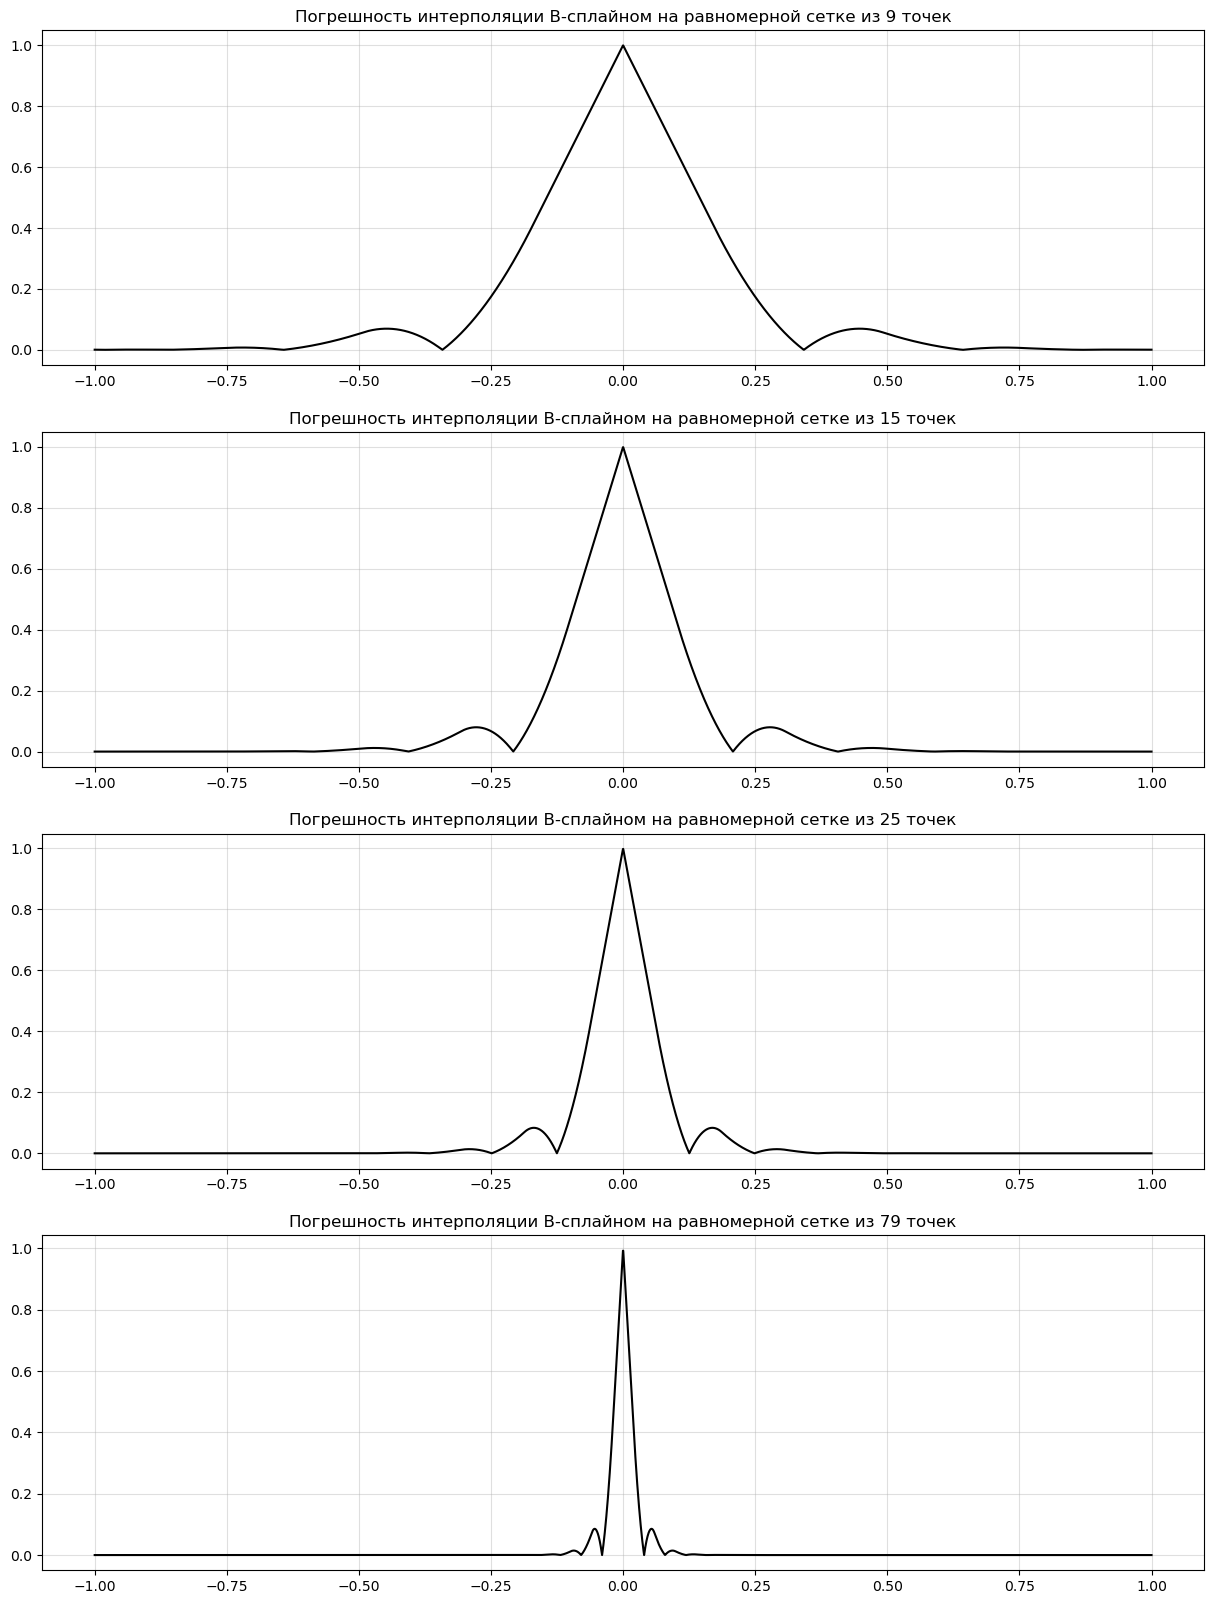

In [65]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.polynomial.chebyshev.chebpts1(num)
    spline = splrep(gr, np.sign(gr), k=2)
    axs[i].plot(xgrid, np.abs(BSpline(*spline)(xgrid) - np.sign(xgrid)), color='black')
    axs[i].grid(alpha=0.4)
    axs[i].set_title(label=f'Погрешность интерполяции B-сплайном на равномерной сетке из {num} точек')

Можно заметить, что в случае интерполяции B-сплайном 2 порядка погрешность при использовании сетки из нулей полиномож Чебышёва не сильно отличается от равномерной сетки,и в случае **sign(x)** максимум погрешности определяется скачком функции в нуле и не зависит от выбора сетки или способа интерполяции

### Построение производной

Далее посмотрим на графики производных данных функций, полученных с помощью дифференцирования построенных ранее сплайнов:

**Равномерная сетка**

**ch(x)**: Из курса математического анализа мы знаем, что должно получиться при дифференцировании сплайна, сравним график с теоретическим: $(\ch(x))^{'}=\sh(x)$

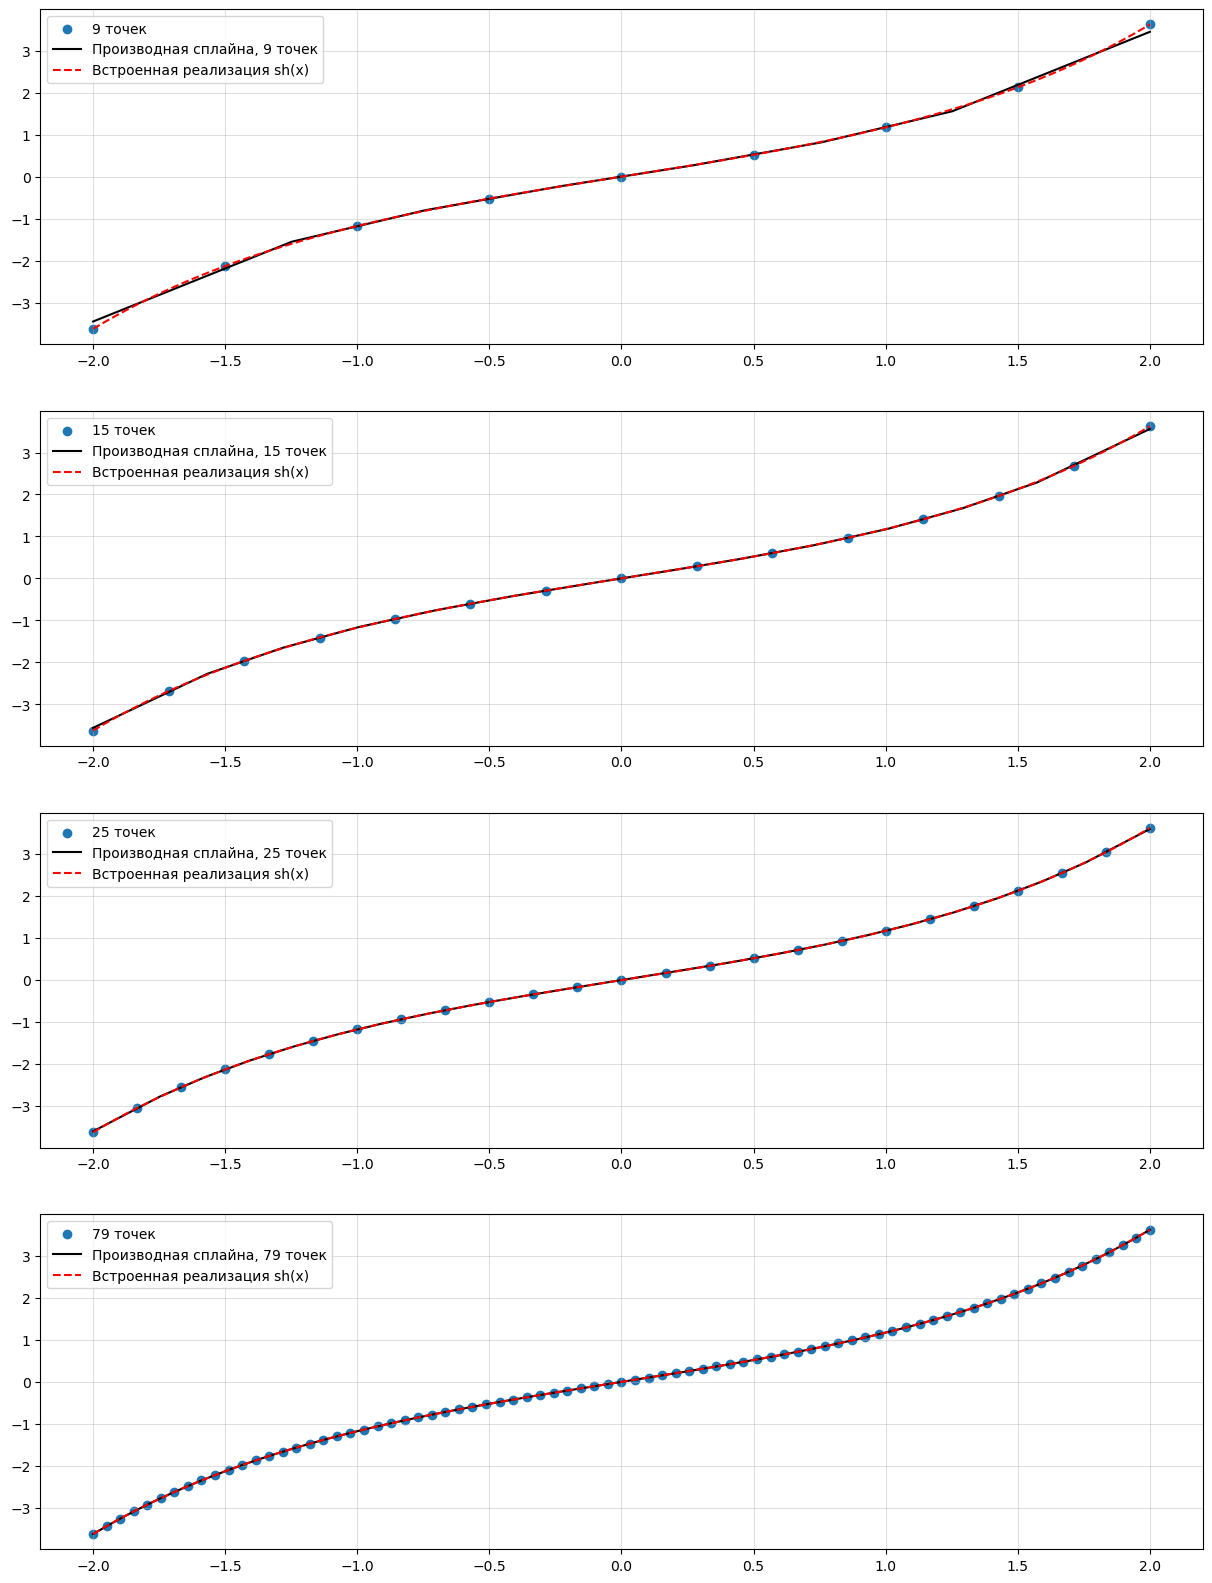

In [68]:
xgrid = np.linspace(-2, 2, 4000)

fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.linspace(-2, 2, num, dtype=np.float64)
    axs[i].scatter(gr, np.sinh(gr), label=str(num)+' точек')
    spline = splrep(gr, np. cosh(gr), k=2)
    axs[i].plot(xgrid, BSpline(*spline).derivative()(xgrid), label = f'Производная сплайна, {num} точек', color='black')
    #axs[i].plot(xgrid, make_interp_spline(gr, np.cosh(gr), k=2, bc_type=((1, np.sinh(-2))))(xgrid), label = f'Интерполяция сплайном по {num} точкам', color='black')
    axs[i].plot(xgrid, np.sinh(xgrid), label=r"Встроенная реализация sh(x)", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

Заметим, что здесь на графике с 9 точками уже видны заметные различия между встроенной реализацией $\sh(x)$ и производной сплайна. Поскольку исходный сплайн был порядка $m=2$, то при его дифференцировании получился кусочный полином 1 порядка, то есть ломная, соединяющие узлы $\sh(x_i)$ на нашей сетке

Далее попробуем построить аналогичный график для $\text{sign}(x)$, однако в этом есть проблема, поскольку в пространстве $D^{'}$ обобщённых функций, производной sign $(x)$ будет дельта-функция Дирака $\delta(x)$, равная $\infty$ в нуле. Для построения я удалю точку $x=0$ из истинной производной

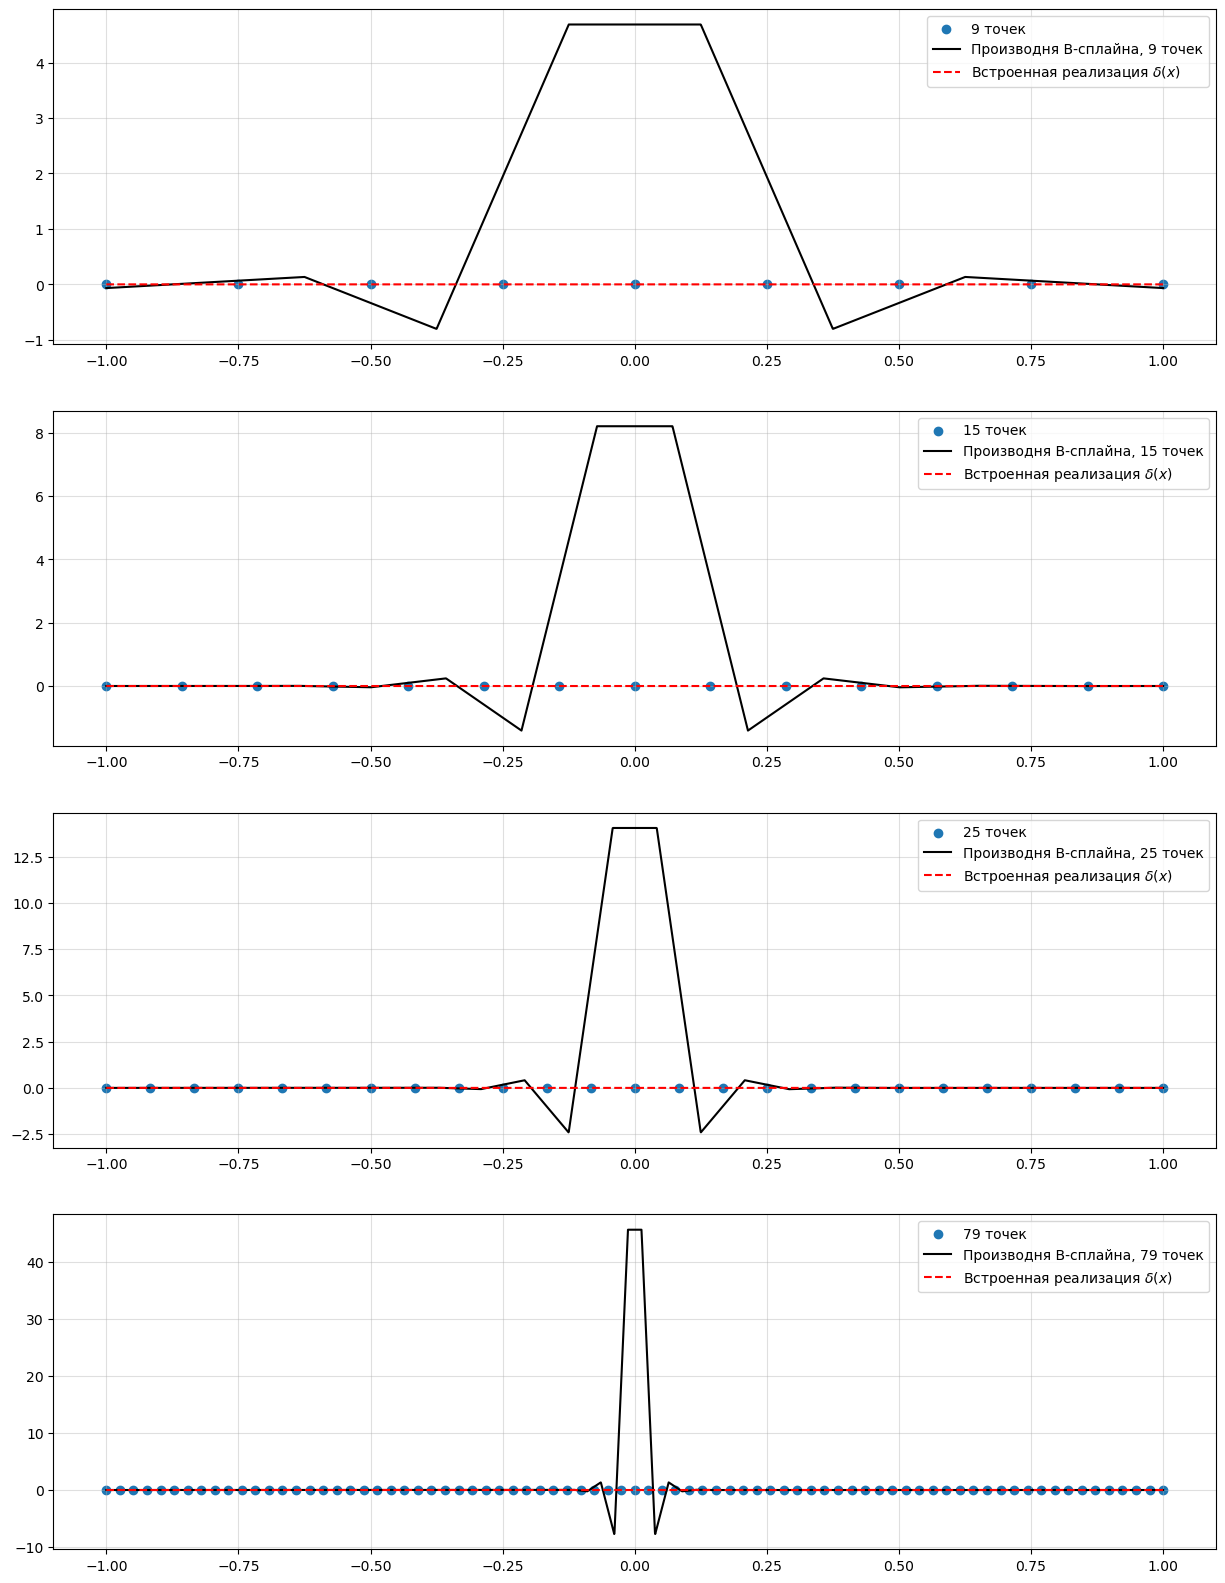

In [71]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    xgrid = np.linspace(-1, 1, 4000)
    gr = np.linspace(-1, 1, num, dtype=np.float64)
    spline = splrep(gr, np.sign(gr), k=2)
    axs[i].scatter(gr, np.zeros_like(gr), label=str(num)+' точек')
    axs[i].plot(xgrid, BSpline(*spline).derivative()(xgrid), label = f'Производня B-сплайна, {num} точек', color='black')
    axs[i].plot(xgrid, np.zeros_like(xgrid), label=r"Встроенная реализация $\delta(x)$", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

**Cетка из нулей полиномов Чебышёва**

Аналогично рассмотрим построение производной сплайнов функций на сетке из нулей полиномов Чебышёва 1 рода. 

**ch(x)**:

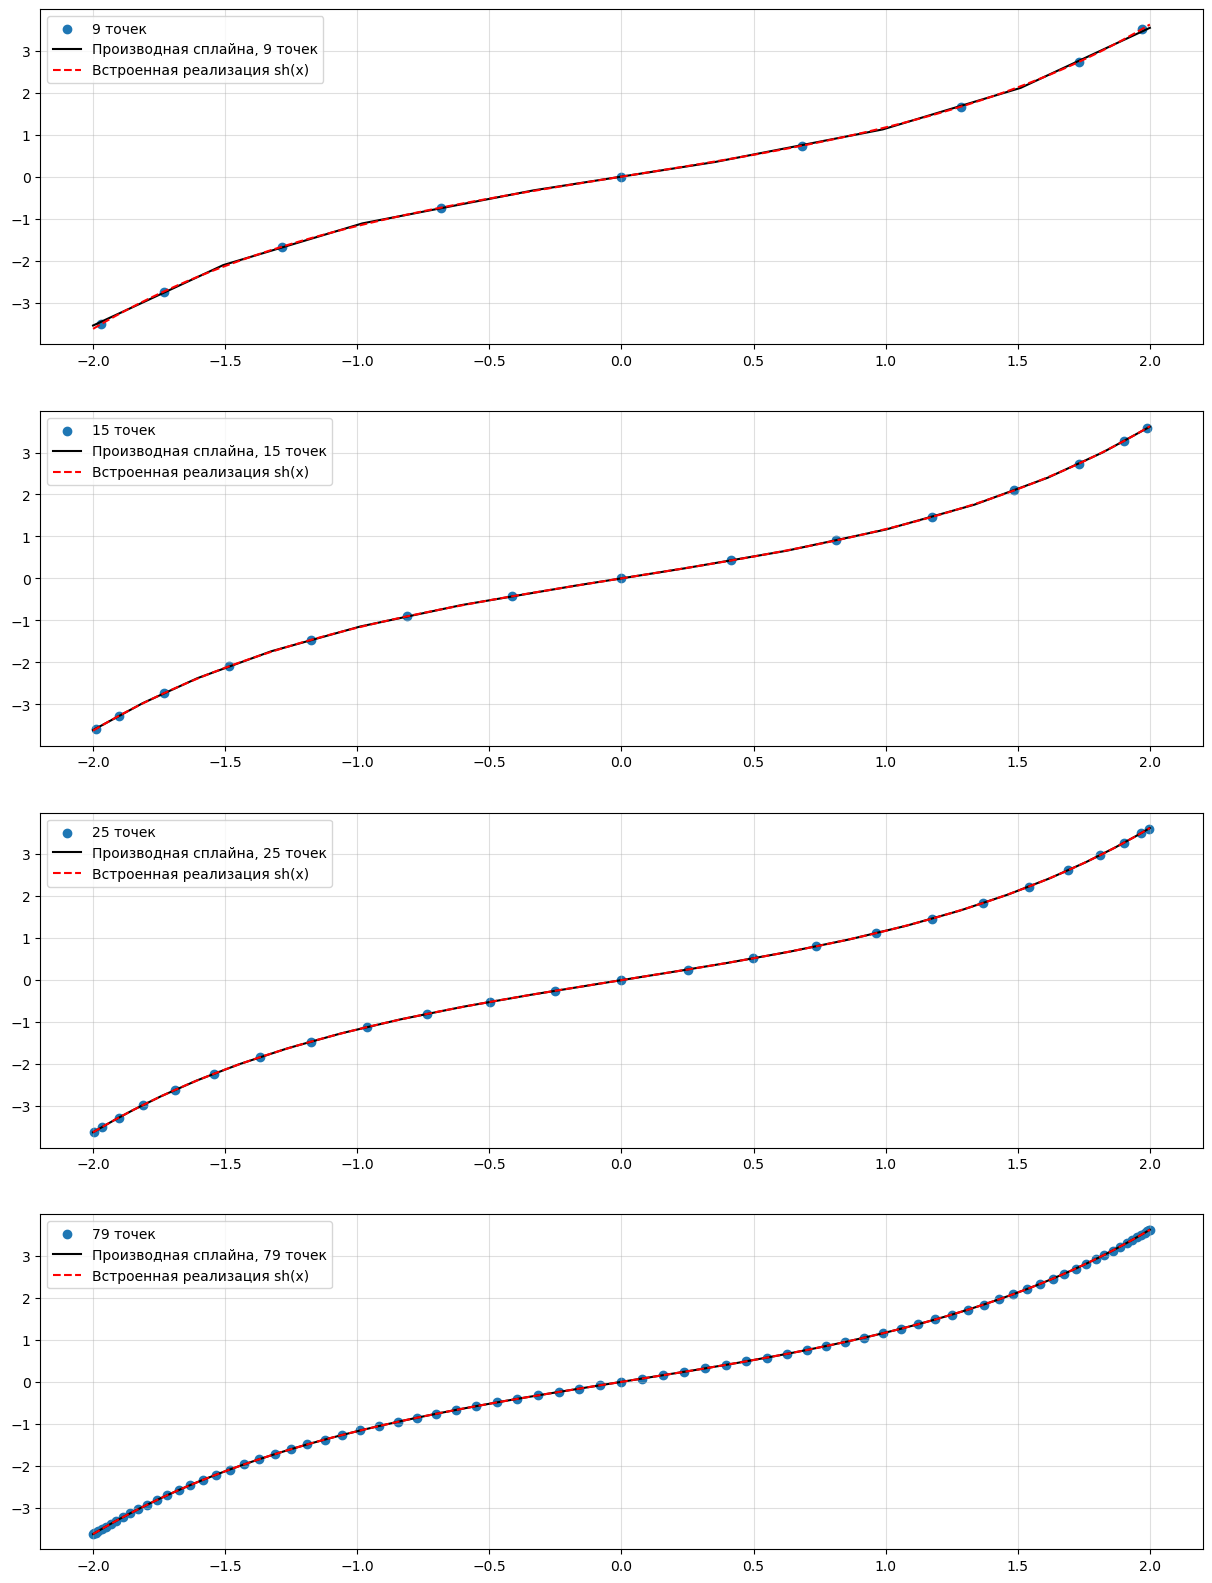

In [4]:
xgrid = np.linspace(-2, 2, 4000)

fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.polynomial.chebyshev.chebpts1(num)*2
    axs[i].scatter(gr, np.sinh(gr), label=str(num)+' точек')
    spline = splrep(gr, np. cosh(gr), k=2)
    axs[i].plot(xgrid, BSpline(*spline).derivative()(xgrid), label = f'Производная сплайна, {num} точек', color='black')
    axs[i].plot(xgrid, np.sinh(xgrid), label=r"Встроенная реализация sh(x)", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

Для **sign(x)**:

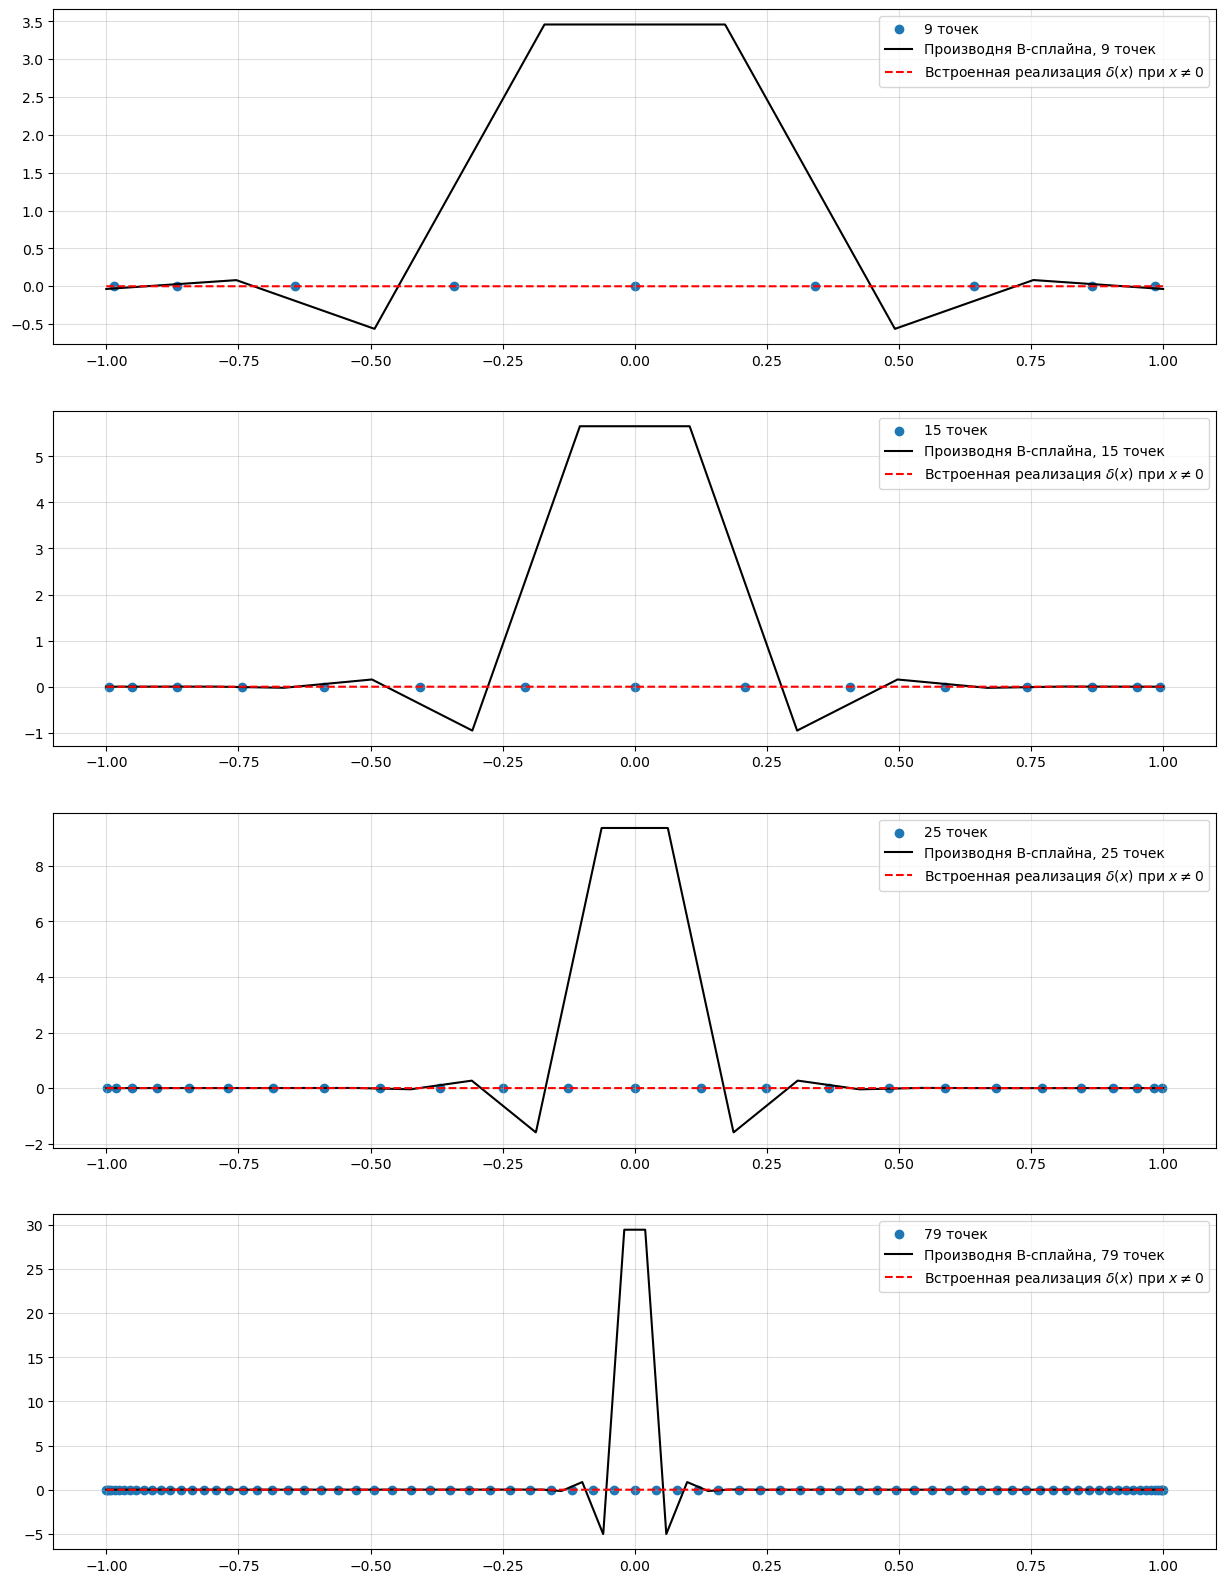

In [5]:
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    xgrid = np.linspace(-1, 1, 4000)
    gr = np.polynomial.chebyshev.chebpts1(num)
    spline = splrep(gr, np.sign(gr), k=2)
    axs[i].scatter(gr, np.zeros_like(gr), label=str(num)+' точек')
    axs[i].plot(xgrid, BSpline(*spline).derivative()(xgrid), label = f'Производня B-сплайна, {num} точек', color='black')
    axs[i].plot(xgrid, np.zeros_like(xgrid), label=r"Встроенная реализация $\delta(x)$ при $x\neq 0$", linestyle='--', color='red')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

В целом видно, что для Чебышёвской сетки результаты получились чуть лучше

**Оценка погрешностей производных:**

Для функции **sign(x)** оценка погрешности будет равняться $\infty$, поскольку функция является разрывной в нуле и, следовательно, не является диффиренцируемой в классическом смысле

Оценим погрешность для производной $\ch(x):$

Для оценки погрешности интерполяции производной сплайна $S^{'}(x)$ производной функции существует формула:
$$
\max\limits_{x\in [a, b]}|f'(x) - S'(x)| \leq \max\limits_{x\in [a, b]}|f^{(4)}(x)|h^3, ~~\text{где} ~~ h= \max \limits_i |x_i - x_{i-1}|
$$
С помощью неё получим теоретические значения погрешностей:

In [15]:
max_deriv = np.cosh(2)
nums = [9, 15, 25, 79]
teor_sigm = []
for num in nums:
    print(f'Погрешность при интерполяции производной по {num} точкам: {max_deriv*((4/num)**3)}')
    teor_sigm.append(max_deriv*((4/num)**3))

Погрешность при интерполяции производной по 9 точкам: 0.33028878495110064
Погрешность при интерполяции производной по 15 точкам: 0.07134237754943774
Погрешность при интерполяции производной по 25 точкам: 0.015409953550678557
Погрешность при интерполяции производной по 79 точкам: 0.0004883599963275774


Теперь сравним полученные значения с постороенными на пркатике ошибками интерполяции на равномерной сетке:

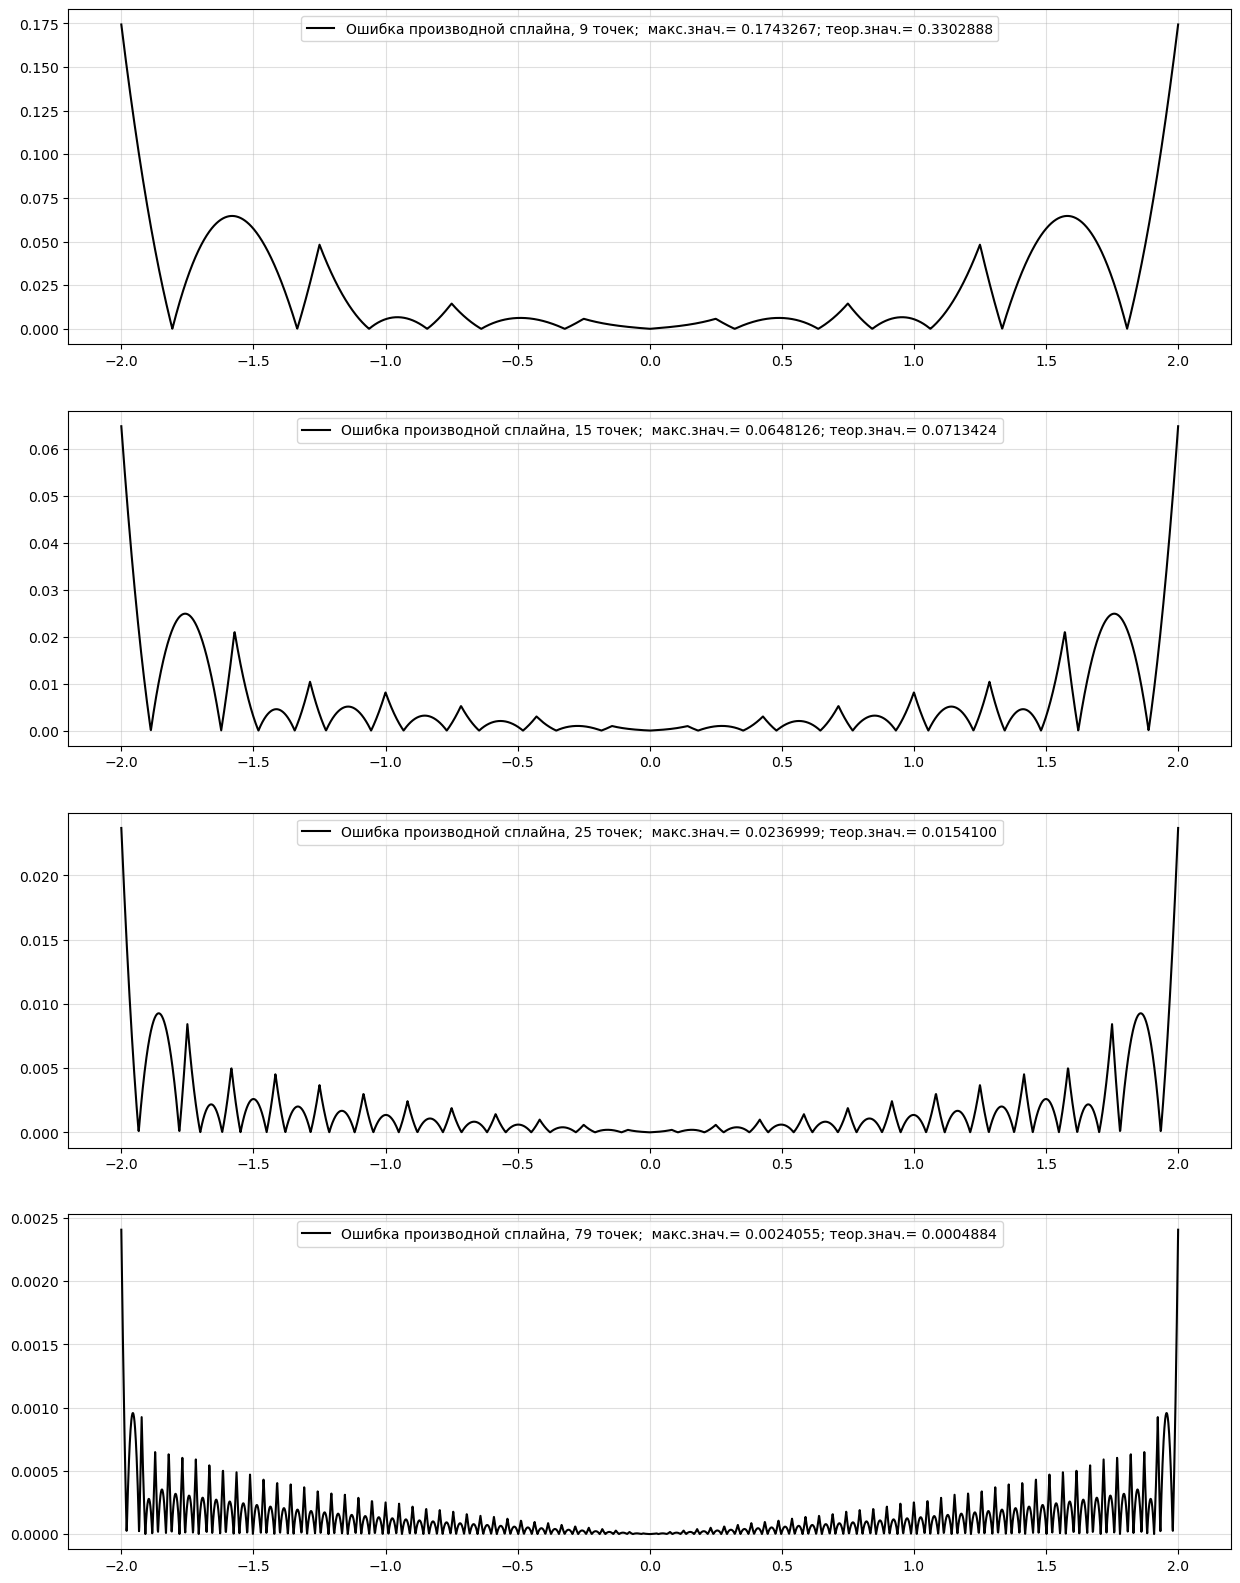

In [17]:
xgrid = np.linspace(-2, 2, 4000)

fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)

for i, num in enumerate(nums):
    gr = np.linspace(-2, 2, num, dtype=np.float64)
    spline = splrep(gr, np. cosh(gr), k=2)
    sigm = np.abs(BSpline(*spline).derivative()(xgrid) - np.sinh(xgrid))
    axs[i].plot(xgrid, sigm, label = f'Ошибка производной сплайна, {num} точек;  макс.знач.= {max(sigm):.7f}; теор.знач.= {teor_sigm[i]:.7f}', color='black')
    axs[i].grid(alpha=0.4)
    axs[i].legend()

Исходя из полученных результатов, основные проблемы наблюдаются на краях отрезка. При этом теоретическая погрешность достаточно хорошо совпадает с фактической, однако при малом или большом количестве узлов оказывается слегка завышенной

Посмотрим на порядок аппроксимации:
для этого удобнее всего будет прологарифмировать зависимость $\varepsilon = f(h) ~~\to ~~ \ln(\varepsilon)=m\ln(h) + const$

In [23]:
from scipy.optimize import curve_fit

C помощью данной библиотеки определим порядок аппрокисмации как угловой коэффициент в графике прямой прологорифмированной зависимости

Апостериорная оценка порядка: 1.9819827351357377


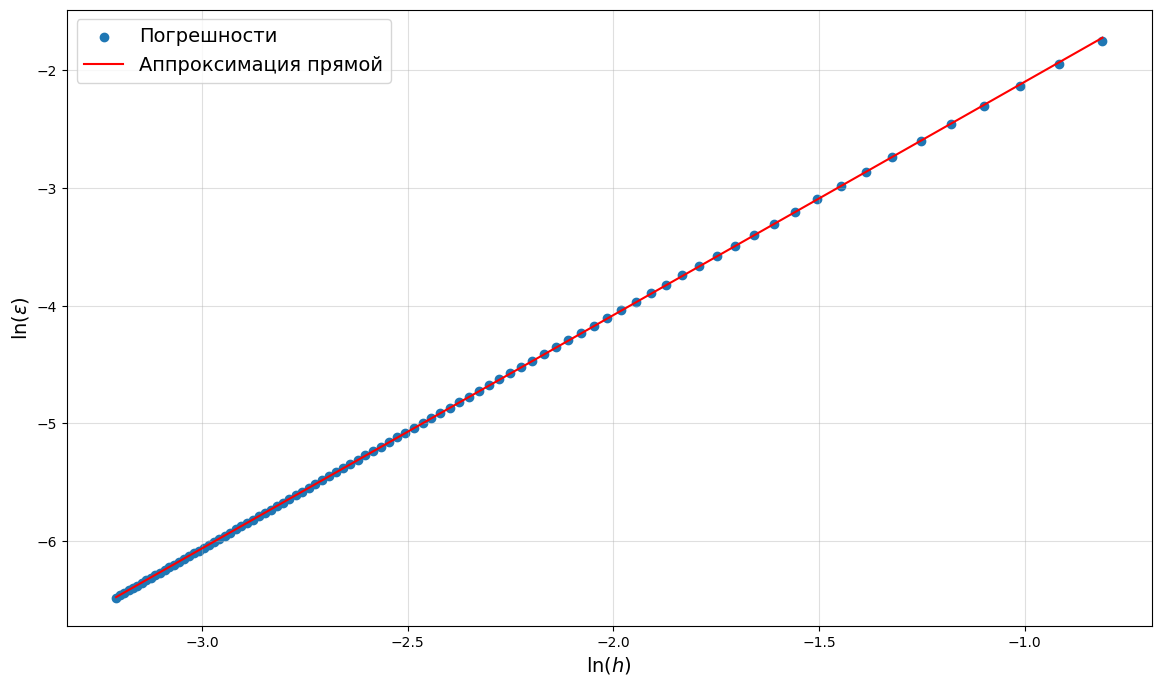

In [29]:
xgrid = np.linspace(-2, 2, 4000)

grid_sizes = np.arange(9, 100)
ers = []
for n in grid_sizes:
    gr = np.linspace(-2, 2, n)
    spline = splrep(gr, np.cosh(gr), k=2)
    sigm = np.abs(BSpline(*spline).derivative()(xgrid) - np.sinh(xgrid))
    sig_max = max(sigm)
    ers.append(sig_max)

def linear(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear, np.log(4/grid_sizes), np.log(ers))

plt.figure(figsize=(14,8))
plt.scatter(np.log(4/grid_sizes), np.log(ers), label='Погрешности')
plt.plot(np.log(4/grid_sizes), linear(np.log(4/grid_sizes), *popt), label = f'Аппроксимация прямой', color='red')
plt.grid(alpha=0.4)
plt.xlabel(r'$\ln(h)$', fontsize=14)
plt.ylabel(r'$\ln(\varepsilon)$', fontsize=14)
plt.legend(fontsize=14)
print('Апостериорная оценка порядка:', popt[0])

Таким образом практически полученный порядок аппроксимации $m_{pr}=1.98$ очень хорошо согласуется с теоретически ожидаемым значением, заданным в условии: $m_{th} =2$

**Преимущества и недостатки интерполяции B-сплайнами:**

* Преимущества:
    - Устойчивость к изменению в узлах: при изменении одного из узлов нет необходимости полностью переписывать базисные полиномы и заново строить интерполяционный полином, достаточно изменить лишь кусок сплайна. Это связано с финиитностью B-cпланов и их локальным характером, что безусловно является достоинством данной интерполяции
    - На большей части отрезка (исключая края) функция Лебега является константой, что делает нашу задачу хорошо обусловленной на большей части отрезка 
    - Достижение необходимой гладкости с помощью подбора порядка сплайна (Используется в задачах обработки сигналов и компьютерной графики)
    - Вычислительная сложность ниже, чем в задаче алгебраической интерполяции
* Недостатки:
    - Необходимость чёткого задания граничных условий 
    - Полученный сплайн имеет мало непрерывных производных (особенно ярко это проявляется в данной задаче, где по условию нужно использовать сплайн порядка 2 $\Rightarrow$ при его дифференцировании получается кусочный полином 1 порядка, то есть ломаная и с приближением производной уже возникают проблемы) 
    - Сложность в реализации
    - Метод прогонки при вычислении коэффициентов позволяет избежать значительных ошибок, связанных с округлением
    - Необходимость подбора оптимального значения порядка сплайна (как правило 3 или 5 порядок). При порядке 9 и выше задача интерполяции становится численно неустойчивой и плохо обусловленной

## Выводы по задаче:
В данной задаче были построены интерполяционные полиномы для функций $\ch(x)$ и sign(x) в разных базисах и на 2х разных сетках. По полученным результатм можно сделать ряд выводов:
1) При построении интерполяционного полинома Лагранжа на раномерной сетке при сгущении сетки погрешность меняется немонотонно (наименьший результат получен на сетке из 25 узлов), это связано с экспоненциальным ростом константы Лебега при сгущении сетки, что приводит к увеличению чувствительности к погрешности задания сеточной функции (значения в узлах)
2) В случае неравномерной сетки, состоящей из нулей полиномов Чебышёва 1 рода интерполяция получается лучше и погрешность снижается. Для данной системы полиномов константа Лебега растёт при сгущении сетки логарифмически и данная оценка является неулучшаемой, что делает данную сетку очень хорошим инструментом для интерполяции. Однако в случае разрывной функции в окрестности разрыва всё равно будут наблюдаться отклоенения, при сгущении сетки размер данной окрестности снижается
3) При построении интерполяционнного полинома необходимо очитывать машинную погрешность вычислений: при сгущении сетки мы будем получать разность достаточно близких чисел в знаменателях базисных полиномов Лагранжа, что приводит к увеличению вклада ошибки округлений.
4) Интерполяция B - сплайнами даёт хорошие результаты при интерполяции как непрерывных, так и разрывных функций. Локальность сплайнов позволяет получить хорошую обусловленность задачи интерполяции и на большей части отрезка погрешность не растёт при удалении от центра
5) Также производную полученного при интерполяции сплайна можно использовать при вычислении производной функции на том же отрезке, причём точность вычисления растёт при измельчении сетки и на центральной части отрезка погрешность вычисления не растёт при удалении от центра. Теоретически полученное значение при вычислении производной таким образом совпадает с практическим на краях,и оказывается завышенным на остальной части отрезка (см. последние графики) 

# Задача № 3

- вычислить значение интеграла:
$$
I = \int\limits_0^2 x\sin x dx
$$
- использовать методы Симпсона и прямоугольников с центральной точкой
- Реализовать численное интегрирование с точностью: $\varepsilon = 0.01$
- Посчитать порядки сходимости методов
- использовать правило Рунге и экстраполяцию Ричардсона

Для начала стоит отметить, что данный интеграл является достаточно "хорошим", он не имеет особенностей на указанном промежутке интегрирования, а также подинтегральная функция является непрерывно диффиренцируемой. Таким образом интеграл может быть довольно легко вычислен с помощью интегрирования по частям и формулы Ньютона-Лейбница:
$$
I = \int\limits_0^2 x\sin x dx = -x\cos x \bigm|_0^2 + \sin x \bigm|_0^2 = \sin(2) - 2\cos(2)\approx 1,742
$$

### Метод Симпсона

Данная квадратурная формула является одной из формул Ньютона-Котеса, полученных интегрированием интерполяционного полинома. Идея данного метода заключается в следующем: мы интерполируем подынтегральную функцию полиномом второго порядка и считаем интеграл от него. То есть:
$$
f(x) \approx P_2(x) \Longrightarrow \int\limits_a^bf(x)dx \approx  \int\limits_a^bP_2(x)dx = \frac h6\left(
    f(a) + 4f\left(\frac{a+b}2\right) + f(b)
\right)
$$
где $h=b-a$
Данная формула является элементарной, то есть рассматриваемое выражение справедливо для одного отрезка, полученного при разбиении исходного с мелкостью $h$.  На практике сетка, конечно, состоит из более чем 2х точек и конечное выражение включается в себя сумму написанных выше формул для каждого элементарного отрезка.

Погрешность данного метода можно оценить по формуле:
$$
\sigma \leq \frac{b-a}{2880}h^4\max\limits_{x\in [a, b]}|f^{(4)}(x)|
$$
где $h$ - шаг. Таким образом теоретический порядок сходимости данного метода - четвёртый.

Отсюда можно получить оптимальный шаг для решения задачи с заданной точностью. Найдём максимум 4 производной на отрезке $[0; 2]$:
$$
f^{(4)}(x) = x\sin x - 4 \cos x \Longrightarrow \max\limits_{x\in [0, 2]} |f^{(4)}(x)| = f^{(4)}(2)\approx3,48
$$
Откуда оптимальный шаг для заданной точности:
$$
h = \sqrt[4]{\frac{2880 \varepsilon}{f^{(4)}(2)(b-a)}}
$$

Посчитаем численно точное значение интграла:

In [4]:
I = np.sin(2) - 2*np.cos(2)
I

1.7415910999199666

Далее посчитаем оптимальный шаг $h_{opt}$:

In [5]:
f4max = 2*np.sin(2) - 4*np.cos(2)
h = np.power(2880e-2/(2*f4max), 1/4)
h

1.4259246441005995

Тогда количество точек в сетке:

In [6]:
2/h + 1

2.4025986634528627

Таким образом мы получим 2 элементарных отрезка, 3 точки в каждом, то есть в сумме 5 точек.

В библиотеке `scipy` есть готовая функция, которая реализует метод Симпсона: [scipy.integrate.simpson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html)

In [3]:
from scipy.integrate import simpson

In [12]:
func = lambda x: x*np.sin(x)
x = np.linspace(0, 2, 5)
I_simp = simpson(func(x), dx=1/2)
err_simpson = abs((I-I_simp))
print('Результат численного интегрирования: ', I_simp, ';   Погрешность численного интегрирования:', err_simpson)

Результат численного интегрирования:  1.7408929700166482 ;   Погрешность численного интегрирования: 0.0006981299033184118


Исходя из полученных результатов видно, что требуемая в условии задачи точность $\varepsilon=0,01$ достигнута

### Метод прямоугольников с центральной точкой

Основная идея данного метода, приблизить интеграл знакомой из математического анализа интегральная сумма Римана, однако в случае прямоугольников с центральной точкой на каждом отрезке разбиения $\Delta x_k$ значение функции берется в фиксированной точке - середине данного отрезка. Тогда полученная квадратурная формула для элементарного отрезка:
$$
f(x) \approx f\left (\frac{a+b}{2}\right ) \Longrightarrow \int\limits_a^bf(x)dx \approx  \int\limits_a^b f\left (\frac{a+b}{2}\right )dx = h f\left (\frac{a+b}{2}\right ), \text{  где } h=b-a
$$

На практике опять же мы имеем дело с разбиенем промежутка интегрирования на более чем один отрезок и иммет место составная квадратурная формула:
$$
I\approx \sum_{k=0}^{N-1}(x_{k+1}-x_k)f\left (\frac{x_{k+1}+x_k}{2}\right )
$$
Оценить погрешность численного интегрирования можно при помощи формулы:
$$
\sigma \leq \frac{b-a}{24}h^2\max\limits_{x\in [a, b]}|f^{''}(x)|
$$
где $h$ - шаг. Таким образом теоретический порядок сходимости данного метода - второй, в отличие от Метода Симпсона.

Отсюда можно получить оптимальный шаг для решения задачи с заданной точностью. Найдём максимум 2 производной подинтегральной функции на отрезке $[0; 2]$:
$$
f^{(2)}(x) = 2 \cos x - x\sin x  \Longrightarrow \max\limits_{x\in [0, 2]} |f^{(2)}(x)| = |f^{(2)}(2)|\approx2,65
$$
Откуда оптимальный шаг для заданной точности:
$$
h_{opt} = \sqrt{\frac{24 \varepsilon}{|f^{(2)}(2)|(b-a)}}
$$

Аналогично предыдущему методу посчитаем оптимальный шаг $h_{opt}$:

In [10]:
f2max = 2*(np.sin(2) - np.cos(2))
h2 = np.power(24e-2/(2*f2max), 1/2)
h2

0.2127624047445988

Тогда количество точек в сетке:

In [11]:
2/h2 + 1

10.400156961004514

То есть мы получили 11 точек после округления вверх и разбиение на 10 элементарных отрезков. Реализуем подсчёт интеграла с помощью метода прямоугольников с центральной точкой

In [50]:
def mid_rectangular(func, N):
    x =np.linspace(0, 2, N, dtype=np.float64)
    res=np.float64(0)
    for i in np.arange(N-1):
        res += func((x[i]+x[i+1])/2)*2/(N-1)
    return res

Посчитаем значение интеграла и ошибку интегрирования данным методом:

In [13]:
func = lambda x: x*np.sin(x)
I_rect = mid_rectangular(func, N=11)
err_rect = abs((I-I_rect))
print('Результат численного интегрирования: ', I_rect, ';   Погрешность численного интегрирования:', err_rect)

Результат численного интегрирования:  1.7414590668175203 ;   Погрешность численного интегрирования: 0.00013203310244636057


Исходя из полученных результатов видно, что требуемая в условии задачи точность $\varepsilon=0,01$ достигнута

### Оценка погрешностей по правилу Рунге

Попробуем аппроксимировать значение интеграла полиномом от размера шага. Пусть для вычисления приближённого значения интеграла $I$ применяется квадратурная формула $p$-го порядка аппроксимации $I^p$ и подынтегральная функция $p$ раз непрерывно диффиренцируема. Тогда существут константа $c$ такая, что:
$$
I = I^p(h) + ch^{p}
$$

Предположим, что значение константы меняется не сильно, при уменьшении шага $h$ вдвое. Тогда:
$$
I^p(h) + ch^p = I^p\left(\frac h2\right) + c\left(\frac h2\right)^p 
$$

Из этого выражения получим $c$:
$$
c = \frac{I^p(h) - I^p\left(\frac h2\right)}{h^p - \left(\frac h2\right)^p}
$$
Тогда погрешность исходного интеграла (для удобства заменим $h\to2h$):
$$
I - I^p(h) \approx \frac{I^p(h) - I^p(2h)}{2^{p}-1}
$$

Оценим погрешность при полученных ранее $h$ по правилу Рунге, по формуле, которая была написана выше и сравним с практическим значением:

In [14]:
err_simpson_theor = 2/2880*f4max*(h**4)
err_rect_theor = 2/24*f2max*(h2**2)
err_rect_rung = (mid_rectangular(func, N=11) - mid_rectangular(func, N=6))/(4-1)
x_s = np.linspace(0,2,3)
x=np.linspace(0,2,5)
err_simpson_rung = (simpson(y=func(x), dx=1/2) - simpson(y=func(x_s), dx=1))/(16-1)
print(f' Практическая погрешность:\n Симпсон: {err_simpson}, Прямоугольники: {err_rect} \n', '-'*70)
print(f' Теоретическая погрешность:\n Симпсон: {err_simpson_theor}, Прямоугольники: {err_rect_theor}\n', '-'*70)
print(f' Погрешность Рунге:\n Симпсон: {err_simpson_rung}, Прямоугольники: {err_rect_rung}\n', '-'*70)

 Практическая погрешность:
 Симпсон: 0.0006981299033184118, Прямоугольники: 0.00013203310244636057 
 ----------------------------------------------------------------------
 Теоретическая погрешность:
 Симпсон: 0.01, Прямоугольники: 0.009999999999999998
 ----------------------------------------------------------------------
 Погрешность Рунге:
 Симпсон: 0.0008488914925999087, Прямоугольники: 0.00014692993003665814
 ----------------------------------------------------------------------


Из полученных результатов видно, что практически полученная погрешность близка к полученной по правилу Рунге и значительно (на 1-2 порядка) меньше теоретической

### Апостериорная оценка порядков сходимости методов

В данной задаче мы будем оценивать порядок сходимости для каждого из методов. Для это возпользуемся тем же способом, что и в задаче № 2. Найдём зависимость $\varepsilon_{prak}=f(h)$ и прологарифмируем её. В результате полученная зависимость будет прямой вида
$$
\ln(\varepsilon_{prak})=p\ln(h) + const
$$
Откуда легко найти апостериорную оценку порядка $p $ с помощью МНК. Начнём с **метода Симпсона**:

Апостериорная оценка порядка: 4.014309292467844


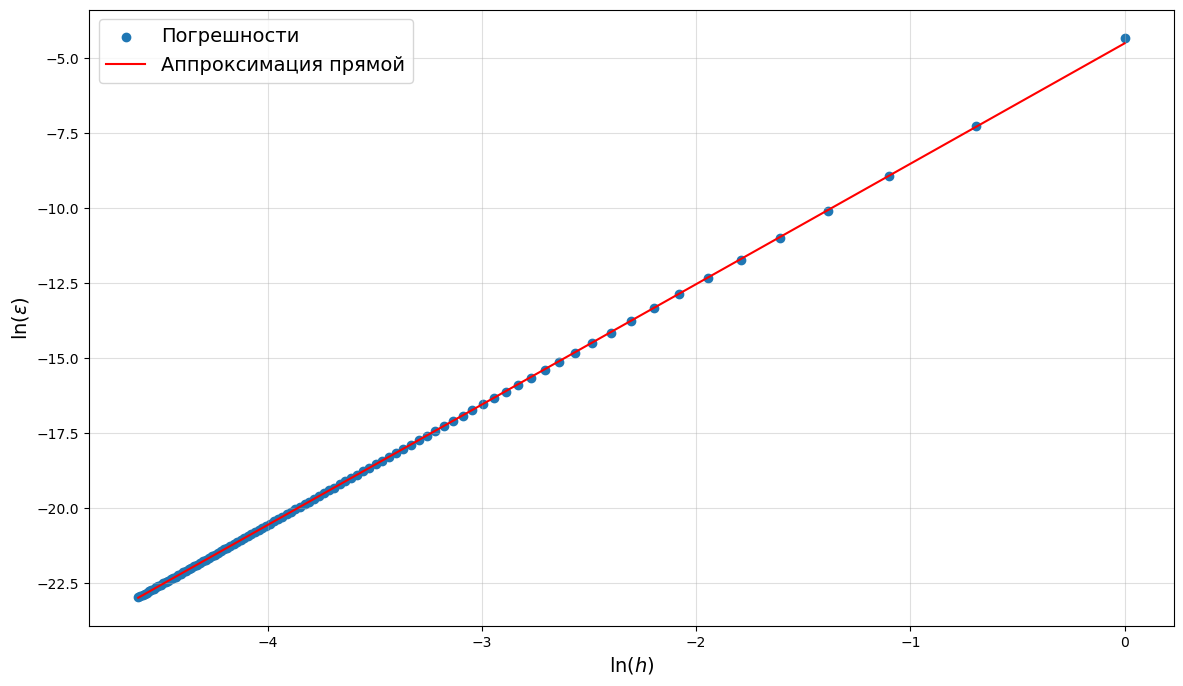

In [28]:
Ns = np.arange(0, 200, 2)+3
res_simpson = []
for n in Ns:
    x = np.linspace(0, 2, n)
    res_simpson.append(simpson(func(x), dx=x[1]))

res_simpson = np.array(res_simpson)
errors = abs(I - res_simpson)

def linear(x, a, b):
    return a*x + b

popt1, pcov1 = curve_fit(linear, np.log(2/(Ns-1)), np.log(errors))

plt.figure(figsize=(14,8))
plt.scatter(np.log(2/(Ns-1)), np.log(errors), label='Погрешности')
plt.plot(np.log(2/(Ns-1)), linear(np.log(2/(Ns-1)), *popt1), label = f'Аппроксимация прямой', color='red')
plt.grid(alpha=0.4)
plt.xlabel(r'$\ln(h)$', fontsize=14)
plt.ylabel(r'$\ln(\varepsilon)$', fontsize=14)
plt.legend(fontsize=14)
print('Апостериорная оценка порядка:', popt1[0])

Как мы видим апостериорная оценка порядка $p_{prak}\approx 4.014$, что очень близко к теоретическому значению $p=4$, значит всё реализовано верно и Формула для погрешности верна с хорошей точностью.

Проверим аналогичную оценку для **метода прямоугольников со средней точкой** (тут ожидаемый порядок $p=2$):

Апостериорная оценка порядка: 2.0253644040357757


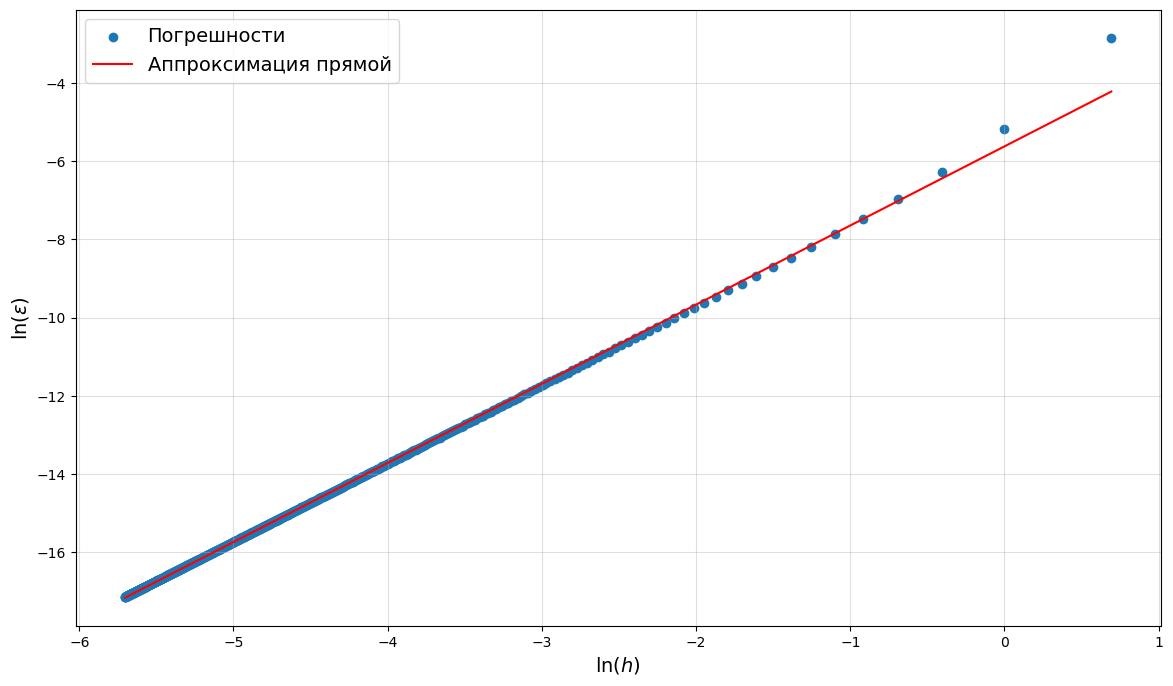

In [36]:
Ns = np.arange(600)+2
res_rect = np.vectorize(mid_rectangular)(func, N=Ns)

res_rect = np.array(res_rect)
errors = abs(I - res_rect)

popt2, pcov2 = curve_fit(linear, np.log(2/(Ns-1)), np.log(errors))

plt.figure(figsize=(14,8))
plt.scatter(np.log(2/(Ns-1)), np.log(errors), label='Погрешности')
plt.plot(np.log(2/(Ns-1)), linear(np.log(2/(Ns-1)), *popt2), label = f'Аппроксимация прямой', color='red')
plt.grid(alpha=0.4)
plt.xlabel(r'$\ln(h)$', fontsize=14)
plt.ylabel(r'$\ln(\varepsilon)$', fontsize=14)
plt.legend(fontsize=14)
print('Апостериорная оценка порядка:', popt2[0])

Для данного метода мы аналогично получили значение апостериорной оценки $p_{prak}\approx 2.025$ очень близкое к теоретическому, таким образом реализация нашего метода хорошо согласуется с полученной теоретически формулой

### Экстраполяция Ричардсона

Данный метод позволяет повысить порядок сходимости квадратурной формулы на 1, используя уточнённое значение интеграла, полученное при прибавлении к вычисленному ранее интегралу с помощью квадратурной формулы поргешности полученной по правилу Рунге:
$$
I^{p+1}  =  I^p(h)+\frac{I^p(h) - I^p(2h)}{2^{p}-1} + O(h^{p+1})
$$
Проверим справедливость данной формулы на практике.

Для начала получим уточнённые значения интегралов путём сложения с полученной по правилу Рунге погрешностью.

**Метод Симпсона** (порядок сходимости $p=4$):

In [37]:
x = np.linspace(0, 2, 5)
I1_simpson = simpson(func(x), dx=1/2)
x = np.linspace(0, 2, 3)
I2_simpson = simpson(func(x), dx=1)
simpson_upgrade = I1_simpson + (I1_simpson-I2_simpson)/(16-1)
print('Уточнённое значение интеграла: ', simpson_upgrade, ';   Погрешность уточнённого значения:', abs(simpson_upgrade-I))

Уточнённое значение интеграла:  1.7417418615092481 ;   Погрешность уточнённого значения: 0.00015076158928151173


**Метод прямоугольников со средней точкой:**

In [38]:
I1_rect = mid_rectangular(func, N=11)
I2_rect = mid_rectangular(func, N=6)
rect_upgrade = I1_rect + (I1_rect - I2_rect)/(4-1)
print('Уточнённое значение интеграла: ', rect_upgrade, ';   Погрешность уточнённого значения:', abs(rect_upgrade-I))

Уточнённое значение интеграла:  1.741605996747557 ;   Погрешность уточнённого значения: 1.4896827590371586e-05


Нетрудно заметить, что погрешность уменьшилась для метода Симпсона примерно в 5 раз, а для метода Прямоугольников - на порядок

Оценим апостериорно порядок сходимости. Начнём с **метода Сиспсона**:

Апостериорная оценка порядка после экстраполяции: 5.249070843739699


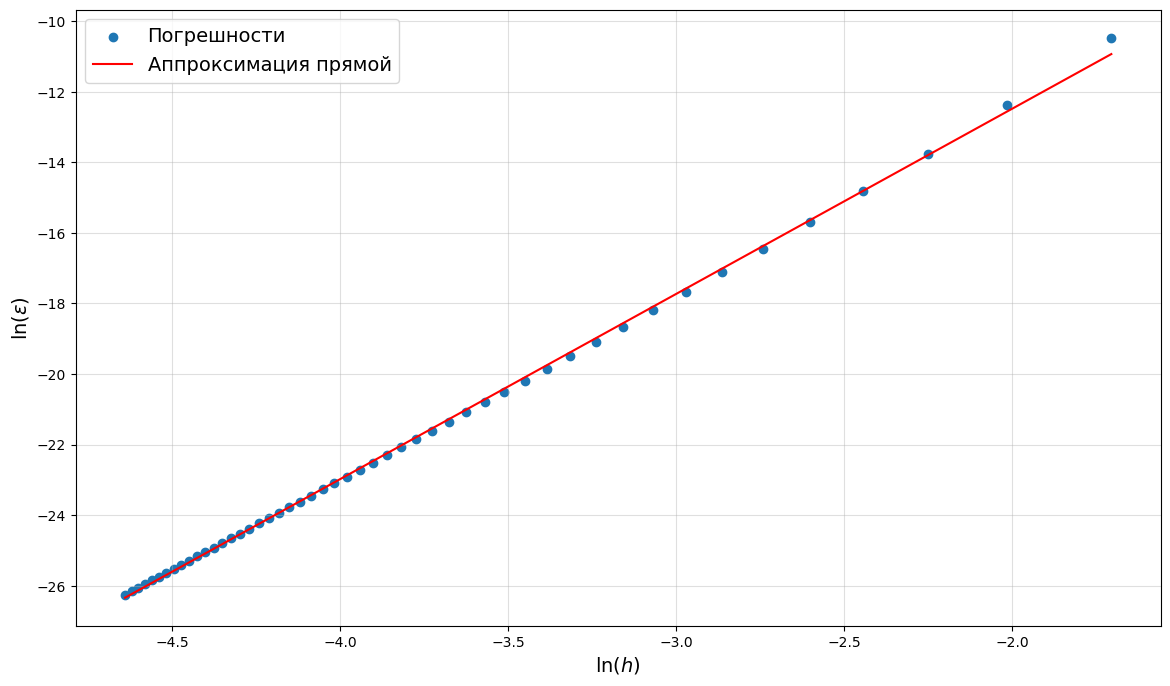

In [66]:
Ns = np.arange(1, 100, step=2)+4
res_simp_rich = []

for n in Ns:
    x = np.linspace(0, 2, n)
    I1 = simpson(func(x), dx=x[1])
    dx2 = x[1]
    n2 = np.rint(1/dx2+1).astype(int)
    x = np.linspace(0, 2, 2*n+1)
    I2 = simpson(func(x), dx=x[1])
    res_simp_rich.append(I2 + (I2 - I1)/15)


res_simp_rich = np.array(res_simp_rich)
err_simp_rich = abs(I - ints)
popt3, pcov3 = curve_fit(linear, np.log(2/(2*Ns+1)), np.log(err_simp_rich))

plt.figure(figsize=(14,8))
plt.scatter(np.log(2/(2*Ns+1)), np.log(err_simp_rich), label='Погрешности')
plt.plot(np.log(2/(2*Ns+1)), linear(np.log(2/(2*Ns+1)), *popt3), label = f'Аппроксимация прямой', color='red')
plt.grid(alpha=0.4)
plt.xlabel(r'$\ln(h)$', fontsize=14)
plt.ylabel(r'$\ln(\varepsilon)$', fontsize=14)
plt.legend(fontsize=14)
print('Апостериорная оценка порядка после экстраполяции:', popt3[0])

Как мы видим после экстраполяции Ричардсона порядок сходимости квадратурной формулы Симпсона вырос и стал $p_{prak}\approx5.24$. В теории ожидалось значение чуть ниже $p=5$, однако полученный результат всё равно позволяет сделать вывод о том, что экстраполяция Ричардсон аработает и позволяет повысить порядок точности.

Апостериорная оценка порядка после экстраполяции: 3.0434461957598566


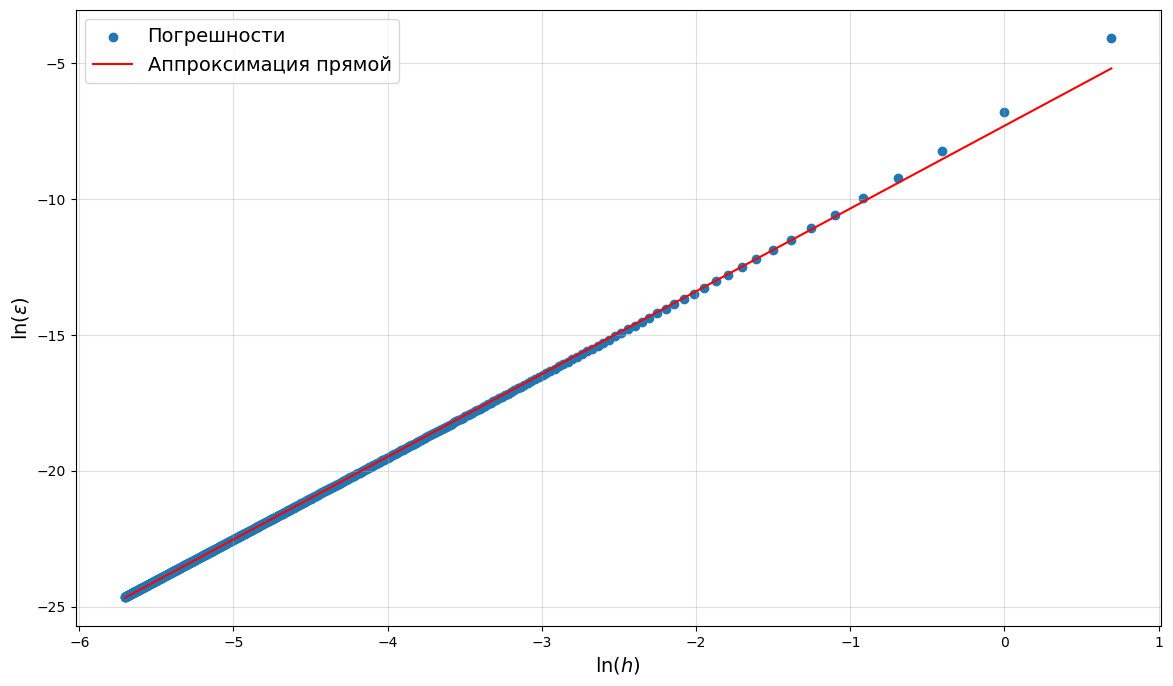

In [52]:
Ns = np.arange(600)+2
mid_rect_vect = np.vectorize(mid_rectangular)
I2 = mid_rect_vect(func, N=Ns)
I1 = mid_rect_vect(func, N=Ns*2)

res_rect = I1 + (I1-I2)/3
errors = abs(I - res_rect)

popt2, pcov2 = curve_fit(linear, np.log(2/(Ns-1)), np.log(errors))

plt.figure(figsize=(14,8))
plt.scatter(np.log(2/(Ns-1)), np.log(errors), label='Погрешности')
plt.plot(np.log(2/(Ns-1)), linear(np.log(2/(Ns-1)), *popt2), label = f'Аппроксимация прямой', color='red')
plt.grid(alpha=0.4)
plt.xlabel(r'$\ln(h)$', fontsize=14)
plt.ylabel(r'$\ln(\varepsilon)$', fontsize=14)
plt.legend(fontsize=14)
print('Апостериорная оценка порядка после экстраполяции:', popt2[0])

Аналогично предыдущему пункту после экстраполяции Ричардсона порядок сходимости вырос на 1, в этом случае он довольно точно совпал с теоретически ожидаемым значением. $p_{prak}\approx 3.04$ при ожидаемом значении 3

## Выводы
В данной задаче мы изучили 2 метода численного интегрирования: метод Симпсона и метод прямоугольников с центральной точкой. Посчитали с помощью данных методов с заданной точностью интеграл, указанный в условии и сравнили результат с точным значением (интеграл является собственным). Также мы оценили погрешности методов теоретически 2мя способами и практически. В результате практическая погрешность оказалась близка к погрешности, вычисленной по правилу Рунге. Также мы апостериорно оценили порядок сходимости для обоих методов он совпал с теоретическим. Далее мы проверили экстраполяцию Ричардсона -- полученные результаты хорошо согласуются с ожидаемыми теоретически. По итогу все полученные результаты оказались ожидаемо хорошими, что позволяет сделать вывод о высокой точности исследуемых методов численного интегрирования (по крайней мере для достаточно гладкой подынтегральной функции $x\sin(x)$)